# ThaCo1-FullPlast Figures

In [409]:
# Numerics
import os, sys, itertools
import numpy as np
#from scipy.stats import wilcoxon as WTest
from scipy.signal import spectrogram, welch
import importlib
import lib
import copy

# Plot
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, NullFormatter
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Arrow, Ellipse, FancyArrowPatch, Rectangle
from mpl_toolkits.mplot3d import axes3d

In [132]:
importlib.reload(lib)

from lib import (
    Histogram,
    Mask,
    mm_to_inch,
    gauss_kde,
    load_mnist_array,
    load_cifar_array
)

### General settings

In [133]:
# Figure sizes
# max dim can be (180mm x 170mm)
full_page_fig_width = 180 # mm
dpi = 500

# Font sizes
fontsize_labels = 8
fontsize_panel_letters = 10
fontsize_title = 8
fontsize_legend = 6
fontsize_ticks = 6

labelpad = 2

colors_stages = {
    'training': 'royalblue',
    'awake': 'firebrick',
    'test': 'firebrick', # same of awake, useful in some cases
    'nrem': 'forestgreen',
    'sleep': 'forestgreen' # same of nrem, useful in some cases
}

In [134]:
# Model Specs

n_areas = 1
n_class = 10
n_ranks_train = 3
n_ranks_test = 25
n_exc_ca = 20
t_nrem_therm, t_nrem = 20e3, 100e3 # ms
t_nrem_s = int(t_nrem/1000)
foveal_input = False
coding = 4
n_neur_cx = 600
n_neur_th = 324

all_configurations = {
    "MNIST_cxcx":
        {'conf_name': 'balanced_sleep_ccOn_ctOff_tcOff_10cycles_noise',
         'model_name': 'thaco1_10x3_cxcxplast',
         'label': 'cx-cx only',
         'color': 'deepskyblue',
         'linestyle': (0,(2.5,1))
        },
    "MNIST_full":
        {'conf_name': 'balanced_sleep_ccOn_ctOn_tcOn_10cycles_noise',
         'model_name': 'thaco1_10x3_fullplast',
         'label': 'full',
         'color': 'lightcoral',
         'linestyle': '-'
        },
    "CIFAR_cxcx":
        {'conf_name': 'cifar10_ccOn_ctOff_tcOff_32_48_64',
         'model_name': 'thaco1_10x3_cxcxplast',
         'label': 'cx-cx only',
         'color': 'deepskyblue',
         'linestyle': (0,(2.5,1))
        },
    "CIFAR_full":
        {'conf_name': 'cifar10_ccOn_ctOn_tcOn_32_48_64',
         'model_name': 'thaco1_10x3_fullplast',
         'label': 'full',
         'color': 'lightcoral',
         'linestyle': '-'
        }
}

MNIST_configurations = {
        "MNIST_cxcx":
        {'conf_name': 'balanced_sleep_ccOn_ctOff_tcOff_10cycles_noise',
         'model_name': 'thaco1_10x3_cxcxplast',
         'label': 'cx-cx only',
         'color': 'deepskyblue',
         'linestyle': (0,(2.5,1))
        },   
    "MNIST_full":
        {'conf_name': 'balanced_sleep_ccOn_ctOn_tcOn_10cycles_noise',
         'model_name': 'thaco1_10x3_fullplast',
         'label': 'full',
         'color': 'lightcoral',
         'linestyle': '-'
        }
}
CIFAR_configurations = {
    "CIFAR_cxcx":
        {'conf_name': 'cifar10_ccOn_ctOff_tcOff_32_48_64',
         'model_name': 'thaco1_10x3_cxcxplast',
         'label': 'cx-cx only',
         'color': 'deepskyblue',
         'linestyle': (0,(2.5,1))
        },
    "CIFAR_full":
        {'conf_name': 'cifar10_ccOn_ctOn_tcOn_32_48_64',
         'model_name': 'thaco1_10x3_fullplast',
         'label': 'full',
         'color': 'lightcoral',
         'linestyle': '-'
        }
}

save_label = 'NatureThaco1Revenge'
save_path, load_path = {}, {}

n_configurations = len(all_configurations.keys())

In [135]:
# Paths

net_params = {
    "n_areas": n_areas,
    "n_class": n_class,
    "n_ranks_train": n_ranks_train,
    "n_ranks_test": n_ranks_test,
    "n_exc_ca": n_exc_ca
}

root_path = "/path/to/root/dir"
save_path = os.path.join(root_path, "figures", save_label)
load_paths = {
    name: os.path.join(root_path, "data_for_figures", conf['conf_name']) for name, conf in all_configurations.items()
}

if not os.path.isdir(save_path):
    os.makedirs(save_path)

### Data loading

In [137]:
# MNIST
mnist_path = os.path.join(root_path, "Datasets", "MNIST")

mnist_train_digits, mnist_train_labels = load_mnist_array('Training', mnist_path + '/')
mnist_test_digits, mnist_test_labels = load_mnist_array('Test', mnist_path + '/')

print(np.shape(mnist_train_digits), np.shape(mnist_train_labels))
print(np.shape(mnist_test_digits), np.shape(mnist_test_labels))

Loading MNIST digits ... 

Loading MNIST digits ... 

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [218]:
# CIFAR
cifar_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
cifar_path = os.path.join(root_path, "Datasets", "CIFAR10")

cifar_train_images, cifar_train_labels = load_cifar_array('Training', cifar_path + '/')
cifar_test_images, cifar_test_labels = load_cifar_array('Test', cifar_path + '/')

print(np.shape(cifar_train_images), np.shape(cifar_train_labels))
print(np.shape(cifar_test_images), np.shape(cifar_test_labels))

Loading CIFAR10 images ... 

Loading CIFAR10 images ... 

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [140]:
# Accuracy
accuracy_dict = {conf: np.load(os.path.join(load_paths[conf], 'accuracy.npy'), allow_pickle=True).item() for conf in all_configurations}

# Spikes Count
spikes_count_dict = {conf: np.load(os.path.join(load_paths[conf], 'spikes_count.npy'), allow_pickle=True).item() for conf in all_configurations}

# Synaptic Categories
w_cx_cx_categories = {conf: np.load(os.path.join(load_paths[conf], 'w_cx_cx_categories.npy'), allow_pickle=True).item() for conf in all_configurations}
w_cx_th_categories = {conf: np.load(os.path.join(load_paths[conf], 'w_cx_th_categories.npy'), allow_pickle=True).item() for conf in all_configurations}
w_th_cx_categories = {conf: np.load(os.path.join(load_paths[conf], 'w_th_cx_categories.npy'), allow_pickle=True).item() for conf in all_configurations}

# Synaptic Matrices
w_cx_cx_matrix = {conf: np.load(os.path.join(load_paths[conf], 'w_cx_cx_matrix.npy'), allow_pickle=True).item() for conf in all_configurations}
w_cx_th_matrix = {conf: np.load(os.path.join(load_paths[conf], 'w_cx_th_matrix.npy'), allow_pickle=True).item() for conf in all_configurations}
w_th_cx_matrix = {conf: np.load(os.path.join(load_paths[conf], 'w_th_cx_matrix.npy'), allow_pickle=True).item() for conf in all_configurations}

# Incoming/Outgoing Synaptic Sums
w_cx_sum = {conf: np.load(os.path.join(load_paths[conf], 'w_cx_sum.npy'), allow_pickle=True).item() for conf in all_configurations}
w_th_sum = {conf: np.load(os.path.join(load_paths[conf], 'w_th_sum.npy'), allow_pickle=True).item() for conf in all_configurations}

# Cortical Synaptic Input/Output Sum
w_cx_sum_from_cx = {conf: w_cx_sum[conf]['input']['cx'] for conf in all_configurations}
w_cx_sum_from_th = {conf: w_cx_sum[conf]['input']['th'] for conf in all_configurations}
w_cx_sum_to_cx = {conf: w_cx_sum[conf]['output']['cx'] for conf in all_configurations}
w_cx_sum_to_th = {conf: w_cx_sum[conf]['output']['th'] for conf in all_configurations}

# Cortical Incoming Synaptic Activity
sa_cx_from_cx = {conf: w_cx_sum[conf]['synaptic_activity']['cx'] for conf in all_configurations}
sa_cx_from_th = {conf: w_cx_sum[conf]['synaptic_activity']['th'] for conf in all_configurations}

print('\nDone.')


Done.


### Data processing

In [141]:
# Data processing

n_stages_sleep = 20

n_trials = {conf: len(accuracy_dict[conf]['trials_list']) for conf in all_configurations}
#print('n_trials:', '\n', n_trials, '\n')
if len(list(set([n_trials[conf] for conf in all_configurations])))!=1:
    print('* Attention: number of trials is not the same across all the configurations!')
n_trials = n_trials['MNIST_full']
print(f'n_trials: {n_trials}', '\n')

accuracy_method = {conf: list(accuracy_dict[conf]['mean'].keys()) for conf in all_configurations}
#print('accuracy_method:', '\n', accuracy_method, '\n')
if len(list(set([ " ".join(str(x) for x in accuracy_method[conf]) for conf in all_configurations ])))!=1:
    print('* Attention: `accuracy_method` is not the same across all the configurations!')
accuracy_method = accuracy_method['MNIST_full']
print(f'accuracy_method: {accuracy_method}', '\n')

stages_id = {conf: list(accuracy_dict[conf]['mean'][accuracy_method[0]].keys())[:1+n_stages_sleep] for conf in all_configurations}
#print('stages_id:', '\n', stages_id, '\n')
if len(list(set([ " ".join(str(x) for x in stages_id[conf]) for conf in all_configurations ])))!=1:
    print('* Attention: the number and/or the order of stages is not the same across all the configurations!')
stages_id = stages_id['MNIST_full']
print(f'stages_id: {stages_id}', '\n')

stages = ['_'.join(stage_id.split('_')[1:]) for stage_id in stages_id]
print(f'stages: {stages}', '\n')

n_stages = len(stages)
print(f'n_stages: {n_stages}', '\n')
if n_stages!=(1+n_stages_sleep):
    print('* Attention: the total number of stages is not coherent with the expected number of sleep stages across all the configurations!')

stage_start = 0
print(f'stage_start: {stage_start}', '\n')

stages_sleep = stages_id[1:]
print(f'stages_sleep: {stages_sleep}', '\n')

# Fix for mnist indexing format
for conf in all_configurations.keys():
    if ('dataset_indices' in w_cx_cx_matrix[conf].keys()):
        for n in range(len(w_cx_cx_matrix[conf]['dataset_indices'])):
            for t in ['training','test']:
                if isinstance(w_cx_cx_matrix[conf]['dataset_indices'][n][t]['index mnist'],dict):
                    a = []
                    for d in range(10):
                        [a.append(_) for _ in w_cx_cx_matrix[conf]['dataset_indices'][n][t]['index mnist'][d]]
                    w_cx_cx_matrix[conf]['dataset_indices'][n][t]['index mnist'] = np.array(a)
                    

print('\nDone.')

n_trials: 100 

accuracy_method: ['neuron', 'group', 'class'] 

stages_id: ['00_awake_training', '01_nrem', '02_nrem', '03_nrem', '04_nrem', '05_nrem', '06_nrem', '07_nrem', '08_nrem', '09_nrem', '10_nrem', '11_nrem', '12_nrem', '13_nrem', '14_nrem', '15_nrem', '16_nrem', '17_nrem', '18_nrem', '19_nrem', '20_nrem'] 

stages: ['awake_training', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem', 'nrem'] 

n_stages: 21 

stage_start: 0 

stages_sleep: ['01_nrem', '02_nrem', '03_nrem', '04_nrem', '05_nrem', '06_nrem', '07_nrem', '08_nrem', '09_nrem', '10_nrem', '11_nrem', '12_nrem', '13_nrem', '14_nrem', '15_nrem', '16_nrem', '17_nrem', '18_nrem', '19_nrem', '20_nrem'] 


Done.


### Figure 1

Realized in PowerPoint.

### Figure 2

In [143]:
# Data processing for Figure 2

conf = 'MNIST_full'

# Cortical Firing Rates
activity_layers =  {
    freq: np.load(os.path.join(load_paths[conf], f'lfp_single_track_{freq}.npy'), allow_pickle=True).item() for freq in ['low', 'high']
}

# Here firing rate activity is sampled at low temporal resolution - used for time-course activity
dt_fr_low = activity_layers['low']['dt_ds'] / 1000
steps_low = int(1 / dt_fr_low)
fs_low = 1000
df_low = 0.5
nperseg_low = int(fs_low / df_low)
noverlap_low = 3 * nperseg_low // 4
print(f'nperseg_low = {nperseg_low}') # ms here
print(f'noverlap_low = {noverlap_low}') # ms here

# Here firing rate activity is sampled at high temporal resolution - used for spectrograms
dt_fr_high = activity_layers['high']['dt_ds'] / 1000
steps_high = int(1 / dt_fr_high)
fs_high = 1000
df_high = 20
nperseg_high = int(fs_high / df_high)
noverlap_high = 3 * nperseg_high // 4 # nperseg_high // 2
print(f'nperseg_high = {nperseg_high}')
print(f'noverlap_high = {noverlap_high}')

data_activity = {
    layer: {
        freq: activity_layers[freq]['data'][layer] for freq in ['low', 'high']
    } for layer in ['cx', 'th']
}

# Panel A - Rastergram

# Times are measured in s

total_train_time = 24  # 0.8 * 30
total_test_time = 150  # 0.6 * 250
total_nrem_time = 2000  # 0.6 * 250
pause_train_test = 8
pause_test_pre_nrem = 20
pause_test_nrem = 0
pause_nrem_test = 8

subset_train_time = 7.2  # 0.8 * 9
subset_test_time = 5.4  # 0.6 * 9
subset_nrem_time = 15

# Simulation times
t_start_train = 0
t_stop_train = t_start_train + total_train_time
t_start_test_pre = t_stop_train + pause_train_test
t_stop_test_pre = t_start_test_pre + total_test_time
t_start_nrem = t_stop_test_pre + pause_test_pre_nrem
t_stop_nrem = t_start_nrem + total_nrem_time
t_start_test_post = t_stop_nrem + pause_nrem_test
t_stop_test_post = t_start_test_post + total_test_time

print(f'training: [{t_start_train},{t_stop_train}]')
print(f'test_pre: [{t_start_test_pre},{t_stop_test_pre}]')
print(f'nrem: [{t_start_nrem},{t_stop_nrem}]')
print(f'test_post: [{t_start_test_post},{t_stop_test_post}]')

# Plot times
t0 = t_start_train
t1 = t0 + subset_train_time

t2 = t_start_test_pre
t3 = t2 + subset_test_time

t4 = t_start_nrem
t5 = t4 + subset_nrem_time

#t6 = 0.5*(t_start_nrem+t_stop_nrem-subset_nrem_time)
t6 = t_start_nrem + 303
t7 = t6 + subset_nrem_time

t8 = t_stop_nrem - subset_nrem_time - 0.1
t9 = t8 + subset_nrem_time

t10 = t_start_test_post
t11 = t10 + subset_test_time

n_neur_cx_subset = 180

data_raster = data_activity['cx']['low']['raster']
#data_raster_train = [Mask(timestamp/1000, t_start_train, t_stop_train) - t_start_train + t0 for timestamp in data_raster]
data_raster_train = [Mask(timestamp/1000, t0, t1) for timestamp in data_raster]
#data_raster_test_pre = [Mask(timestamp/1000, t_start_test_pre, t_stop_test_pre) - t_start_test_pre + t1 for timestamp in data_raster]
data_raster_test_pre = [Mask(timestamp/1000, t2, t3) for timestamp in data_raster]
#data_raster_nrem1 = [Mask(timestamp/1000, t_start_nrem, t1_nrem1) - t_start_nrem + t3 for timestamp in data_raster]
data_raster_nrem1 = [Mask(timestamp/1000, t4, t5) for timestamp in data_raster]
#data_raster_nrem2 = [Mask(timestamp/1000, t0_nrem2, t1_nrem2) - t0_nrem2 + t5 for timestamp in data_raster]
data_raster_nrem2 = [Mask(timestamp/1000, t6, t7) for timestamp in data_raster]
data_raster_nrem3 = [Mask(timestamp/1000, t8, t9) for timestamp in data_raster]
#data_raster_test_post = [Mask(timestamp/1000, t0_awake_post, t1_awake_post) - t0_awake_post + t7 for timestamp in data_raster]
data_raster_test_post = [Mask(timestamp/1000, t10, t11) for timestamp in data_raster]

# Panel B - Firing Rate

data_fr_low = data_activity['cx']['low']['fr'] / n_neur_cx_subset
data_fr_high = data_activity['cx']['high']['fr'] / n_neur_cx_subset

data_fr_train_low = data_fr_low[int(t0/dt_fr_low):int(t1/dt_fr_low)]
data_fr_test_pre_low = data_fr_low[int(t2/dt_fr_low):int(t3/dt_fr_low)]
data_fr_nrem1_low = data_fr_low[int(t4/dt_fr_low):int(t5/dt_fr_low)]
data_fr_nrem2_low = data_fr_low[int(t6/dt_fr_low):int(t7/dt_fr_low)]
data_fr_nrem3_low = data_fr_low[int(t8/dt_fr_low):int(t9/dt_fr_low)]
data_fr_test_post_low = data_fr_low[int(t10/dt_fr_low):int(t11/dt_fr_low)]

data_fr_train_high = data_fr_high[int(t0/dt_fr_high):int(t1/dt_fr_high)]
data_fr_test_pre_high = data_fr_high[int(t2/dt_fr_high):int(t3/dt_fr_high)]
data_fr_nrem1_high = data_fr_high[int(t4/dt_fr_high):int(t5/dt_fr_high)]
data_fr_nrem2_high = data_fr_high[int(t6/dt_fr_high):int(t7/dt_fr_high)]
data_fr_nrem3_high = data_fr_high[int(t8/dt_fr_high):int(t9/dt_fr_high)]
data_fr_test_post_high = data_fr_high[int(t10/dt_fr_high):int(t11/dt_fr_high)]

data_fr_composition_low = np.concatenate([data_fr_train_low, data_fr_test_pre_low, data_fr_nrem1_low, data_fr_nrem2_low, data_fr_nrem3_low, data_fr_test_post_low])
data_fr_composition_high = np.concatenate([data_fr_train_high, data_fr_test_pre_high, data_fr_nrem1_high, data_fr_nrem2_high, data_fr_nrem3_high, data_fr_test_post_high])
data_fr_composition_high = data_fr_composition_high + 0.1 * np.random.rand(len(data_fr_composition_high)) # random small background added for avoiding zero frequencies


# Panel C - Spectrogram

f_low, t_low, Sxx_low = spectrogram(data_fr_composition_high, fs=fs_low, window='hamming', nperseg=nperseg_low, noverlap=noverlap_low, scaling='density', detrend=False)
f_high, t_high, Sxx_high = spectrogram(data_fr_composition_high, fs=fs_high, window='hamming', nperseg=nperseg_high, noverlap=noverlap_high, scaling='density', detrend=False)
norm_spect = mcolors.LogNorm(vmin=1e-2, vmax=1e2)

t = t0
mask_train_low = (t_low > t) & (t_low < t+(t1-t0))
mask_train_high = (t_high > t) & (t_high < t+(t1-t0))
t += (t1-t0)
mask_test_pre_low = (t_low > t) & (t_low < t+(t3-t2))
mask_test_pre_high = (t_high > t) & (t_high < t+(t3-t2))
t += (t3-t2)
mask_nrem1_low = (t_low > t) & (t_low < t+(t5-t4))
mask_nrem1_high = (t_high > t) & (t_high < t+(t5-t4))
t += (t5-t4)
mask_nrem2_low = (t_low > t) & (t_low < t+(t7-t6))
mask_nrem2_high = (t_high > t) & (t_high < t+(t7-t6))
t += (t7-t6)
mask_nrem3_low = (t_low > t) & (t_low < t+(t9-t8))
mask_nrem3_high = (t_high > t) & (t_high < t+(t9-t8))
t += (t9-t8)
mask_test_post_low = (t_low > t) & (t_low < t+(t11-t10))
mask_test_post_high = (t_high > t) & (t_high < t+(t11-t10))

t_train_low, Sxx_train_low = t_low[mask_train_low], Sxx_low[:, mask_train_low]
t_test_pre_low, Sxx_test_pre_low = t_low[mask_test_pre_low], Sxx_low[:, mask_test_pre_low]
t_nrem1_low, Sxx_nrem1_low = t_low[mask_nrem1_low], Sxx_low[:, mask_nrem1_low]
t_nrem2_low, Sxx_nrem2_low = t_low[mask_nrem2_low], Sxx_low[:, mask_nrem2_low]
t_nrem3_low, Sxx_nrem3_low = t_low[mask_nrem3_low], Sxx_low[:, mask_nrem3_low]
t_test_post_low, Sxx_test_post_low = t_low[mask_test_post_low], Sxx_low[:, mask_test_post_low]

t_train_high, Sxx_train_high = t_high[mask_train_high], Sxx_high[:, mask_train_high]
t_test_pre_high, Sxx_test_pre_high = t_high[mask_test_pre_high], Sxx_high[:, mask_test_pre_high]
t_nrem1_high, Sxx_nrem1_high = t_high[mask_nrem1_high], Sxx_high[:, mask_nrem1_high]
t_nrem2_high, Sxx_nrem2_high = t_high[mask_nrem2_high], Sxx_high[:, mask_nrem2_high]
t_nrem3_high, Sxx_nrem3_high = t_high[mask_nrem3_high], Sxx_high[:, mask_nrem3_high]
t_test_post_high, Sxx_test_post_high = t_high[mask_test_post_high], Sxx_high[:, mask_test_post_high]


# Alternative for panel C

Spectrograms = {}
z = data_fr_train_high + 0.1 * np.random.rand(len(data_fr_train_high))
Spectrograms['train'] = {
    'low': spectrogram(z, fs=fs_low, window='hamming', nperseg=nperseg_low, noverlap=noverlap_low, scaling='density', detrend=False),
    'high': spectrogram(z, fs=fs_high, window='hamming', nperseg=nperseg_high, noverlap=noverlap_high, scaling='density', detrend=False)
}
z = data_fr_test_pre_high + 0.1 * np.random.rand(len(data_fr_test_pre_high))
Spectrograms['test_pre'] = {
    'low': spectrogram(z, fs=fs_low, window='hamming', nperseg=nperseg_low, noverlap=noverlap_low, scaling='density', detrend=False),
    'high': spectrogram(z, fs=fs_high, window='hamming', nperseg=nperseg_high, noverlap=noverlap_high, scaling='density', detrend=False)
}
z = data_fr_nrem1_high + 0.1 * np.random.rand(len(data_fr_nrem1_high))
Spectrograms['nrem_early'] = {
    'low': spectrogram(z, fs=fs_low, window='hamming', nperseg=nperseg_low, noverlap=noverlap_low, scaling='density', detrend=False),
    'high': spectrogram(z, fs=fs_high, window='hamming', nperseg=nperseg_high, noverlap=noverlap_high, scaling='density', detrend=False)
}
z = data_fr_nrem2_high + 0.1 * np.random.rand(len(data_fr_nrem2_high))
Spectrograms['nrem_mid'] = {
    'low': spectrogram(z, fs=fs_low, window='hamming', nperseg=nperseg_low, noverlap=noverlap_low, scaling='density', detrend=False),
    'high': spectrogram(z, fs=fs_high, window='hamming', nperseg=nperseg_high, noverlap=noverlap_high, scaling='density', detrend=False)
}
z = data_fr_nrem3_high + 0.1 * np.random.rand(len(data_fr_nrem3_high))
Spectrograms['nrem_late'] = {
    'low': spectrogram(z, fs=fs_low, window='hamming', nperseg=nperseg_low, noverlap=noverlap_low, scaling='density', detrend=False),
    'high': spectrogram(z, fs=fs_high, window='hamming', nperseg=nperseg_high, noverlap=noverlap_high, scaling='density', detrend=False)
}
z = data_fr_test_post_high + 0.1 * np.random.rand(len(data_fr_test_post_high))
Spectrograms['test_post'] = {
    'low': spectrogram(z, fs=fs_low, window='hamming', nperseg=nperseg_low, noverlap=noverlap_low, scaling='density', detrend=False),
    'high': spectrogram(z, fs=fs_high, window='hamming', nperseg=nperseg_high, noverlap=noverlap_high, scaling='density', detrend=False)
}
norm_spect = mcolors.LogNorm(vmin=1e-2, vmax=1e2)


# Panel D - Scatter plots & histograms

pre = stages_id[0]
post = stages_id[-1]
# nu_cx_awake = np.array([np.array(list(map(list, zip(*spikes_count_dict[conf]['data']['cx'][stage]['classification'])))).flatten() for stage in [pre,post]])
# nu_th_awake = np.array([np.array(list(map(list, zip(*spikes_count_dict[conf]['data']['th'][stage]['classification'])))).flatten() for stage in [pre,post]])
nu_cx_awake = np.zeros((n_trials,3,n_neur_cx)) # has shape (n_trials,3,n_neur_cx), where 2nd index is for [pre, post, (post-pre)/pre]
nu_th_awake = np.zeros((n_trials,3,n_neur_th)) # has shape (n_trials,3,n_neur_th), where 2nd index is for [pre, post, (post-pre)/pre]
for n in range(n_trials):
    nu_cx_awake[n,0,:] = spikes_count_dict[conf]['data']['cx'][pre]['classification'][n]
    nu_cx_awake[n,1,:] = spikes_count_dict[conf]['data']['cx'][post]['classification'][n]
    nu_cx_awake[n,2,:] = np.divide((nu_cx_awake[n,1,:]-nu_cx_awake[n,0,:]), nu_cx_awake[n,0,:], where=(nu_cx_awake[n,0,:]!=0))
    nu_cx_awake[n,2,:][np.broadcast_to((nu_cx_awake[n,0,:]==0), nu_cx_awake[n,2,:].shape)] = np.nan
    nu_th_awake[n,0,:] = spikes_count_dict[conf]['data']['th'][pre]['classification'][n]
    nu_th_awake[n,1,:] = spikes_count_dict[conf]['data']['th'][post]['classification'][n]
    nu_th_awake[n,2,:] = np.divide((nu_th_awake[n,1,:]-nu_th_awake[n,0,:]), nu_th_awake[n,0,:], where=(nu_th_awake[n,0,:]!=0))
    nu_th_awake[n,2,:][np.broadcast_to((nu_th_awake[n,0,:]==0), nu_th_awake[n,2,:].shape)] = np.nan

early = stages_id[1]
late = stages_id[-1]
# nu_cx_sleep = np.array([np.array(list(map(list, zip(*spikes_count_dict[conf]['data']['cx'][stage]['sleep'])))).flatten() for stage in [stages_id[conf][1], stages_id[conf][-1]]])
# nu_th_sleep = np.array([np.array(list(map(list, zip(*spikes_count_dict[conf]['data']['th'][stage]['sleep'])))).flatten() for stage in [stages_id[conf][1], stages_id[conf][-1]]])
nu_cx_sleep = np.zeros((n_trials,3,n_neur_cx)) # has shape (n_trials,3,n_neur_cx), where 2nd index is for [early, post, (post-early)/early]
nu_th_sleep = np.zeros((n_trials,3,n_neur_th)) # has shape (n_trials,3,n_neur_th), where 2nd index is for [early, post, (post-early)/early]
for n in range(n_trials):
    nu_cx_sleep[n,0,:] = spikes_count_dict[conf]['data']['cx'][early]['sleep'][n]
    nu_cx_sleep[n,1,:] = spikes_count_dict[conf]['data']['cx'][late]['sleep'][n]
    nu_cx_sleep[n,2,:] = np.divide((nu_cx_sleep[n,1,:]-nu_cx_sleep[n,0,:]), nu_cx_sleep[n,0,:], where=(nu_cx_sleep[n,0,:]!=0))
    nu_cx_sleep[n,2,:][np.broadcast_to((nu_cx_sleep[n,0,:]==0), nu_cx_sleep[n,2,:].shape)] = np.nan
    nu_th_sleep[n,0,:] = spikes_count_dict[conf]['data']['th'][early]['sleep'][n]
    nu_th_sleep[n,1,:] = spikes_count_dict[conf]['data']['th'][late]['sleep'][n]
    nu_th_sleep[n,2,:] = np.divide((nu_th_sleep[n,1,:]-nu_th_sleep[n,0,:]), nu_th_sleep[n,0,:], where=(nu_th_sleep[n,0,:]!=0))
    nu_th_sleep[n,2,:][np.broadcast_to((nu_th_sleep[n,0,:]==0), nu_th_sleep[n,2,:].shape)] = np.nan

neur_fr = {
    'cx': {'awake': {'data': nu_cx_awake,
                     'x_lims': (0, 40),
                     'y_lims': (-1.1, 1.1)},
           'sleep': {'data': nu_cx_sleep,
                     'x_lims': (0, 15),
                     'y_lims': (-1.1, 1.1)}
          },
    'th': {'awake': {'data': nu_th_awake,
                     'x_lims': (0, 175),
                     'y_lims': (-1.1, 1.1)},
           'sleep': {'data': nu_th_sleep,
                     'x_lims': (0, 100),
                     'y_lims': (-1.1, 1.1)}
          }
}

x_labels = {
    'cx': {'awake': r'$\langle r \rangle$ pre [Hz]',
           'sleep': r'$\langle r \rangle$ early [Hz]'},
    'th': {'awake': r'$\langle r \rangle$ pre [Hz]',
           'sleep': r'$\langle r \rangle$ early [Hz]'}
}
y_labels = {
    'cx': {'awake': '(post - pre) / pre',
           'sleep':'(late - early) / early'},
    'th': {'awake': '(post - pre) / pre',
           'sleep':'(late - early) / early'}
}

nbins = 100
sigma_kde_factor = 1.5 # sigma_kde_factor = sigma_kde / hist_bin_width

# Loop

for layer in ['cx','th']:
    for state in ['awake','sleep']:
        
        when = 'pre' if state=='awake' else 'early'
        
        # Data scatter
        data = neur_fr[layer][state]['data']
        # data has shape (n_trials,3,n_neur_cx/th), where 2nd index is for [pre, post, (post-pre)/pre]
        xlow, xhigh = neur_fr[layer][state]['x_lims']
        ylow, yhigh = neur_fr[layer][state]['y_lims']
        neur_fr[layer][state]['trial_hists'] = {}
        neur_fr[layer][state]['mean_hist'] = {}
        neur_fr[layer][state]['median_hist'] = {}
        
        # Hist pre
        hist_fr = np.zeros((3,nbins))
        smoothed_hists = np.zeros((n_trials,nbins))
        for n in range(n_trials):
            xx, yy = Histogram(data[n,0,:], nbins=nbins, xmin=xlow, xmax=xhigh, norm=True, KDE=False)
            sigma_kde = sigma_kde_factor * (xx[1]-xx[0])
            smoothed_hists[n,:] = gauss_kde(yy, sigma_kde)
        neur_fr[layer][state]['trial_hists'][when] = smoothed_hists
        hist_fr = (xx, np.nanmean(smoothed_hists, axis=0), np.nanstd(smoothed_hists, axis=0))
        neur_fr[layer][state]['mean_hist'][when] = hist_fr
        hist_fr = (xx, np.nanmedian(smoothed_hists, axis=0), np.nanpercentile(smoothed_hists, 25, axis=0), np.nanpercentile(smoothed_hists, 75, axis=0))
        neur_fr[layer][state]['median_hist'][when] = hist_fr
        
        # Hist ratio
        hist_fr = np.zeros((3,nbins))
        smoothed_hists = np.zeros((n_trials,nbins))
        for n in range(n_trials):
            xx, yy = Histogram(data[n,2,:], nbins=nbins, xmin=ylow, xmax=yhigh, norm=True, KDE=False)
            sigma_kde = sigma_kde_factor * (xx[1]-xx[0])
            smoothed_hists[n,:] = gauss_kde(yy, sigma_kde)
        neur_fr[layer][state]['trial_hists']['ratio'] = smoothed_hists
        hist_fr = (xx, np.nanmean(smoothed_hists, axis=0), np.nanstd(smoothed_hists, axis=0))
        neur_fr[layer][state]['mean_hist']['ratio'] = hist_fr
        hist_fr = (xx, np.nanmedian(smoothed_hists, axis=0), np.nanpercentile(smoothed_hists, 25, axis=0), np.nanpercentile(smoothed_hists, 75, axis=0))
        neur_fr[layer][state]['median_hist']['ratio'] = hist_fr

print('\nDone.')

nperseg_low = 2000
noverlap_low = 1500
nperseg_high = 50
noverlap_high = 37
training: [0,24]
test_pre: [32,182]
nrem: [202,2202]
test_post: [2210,2360]

Done.


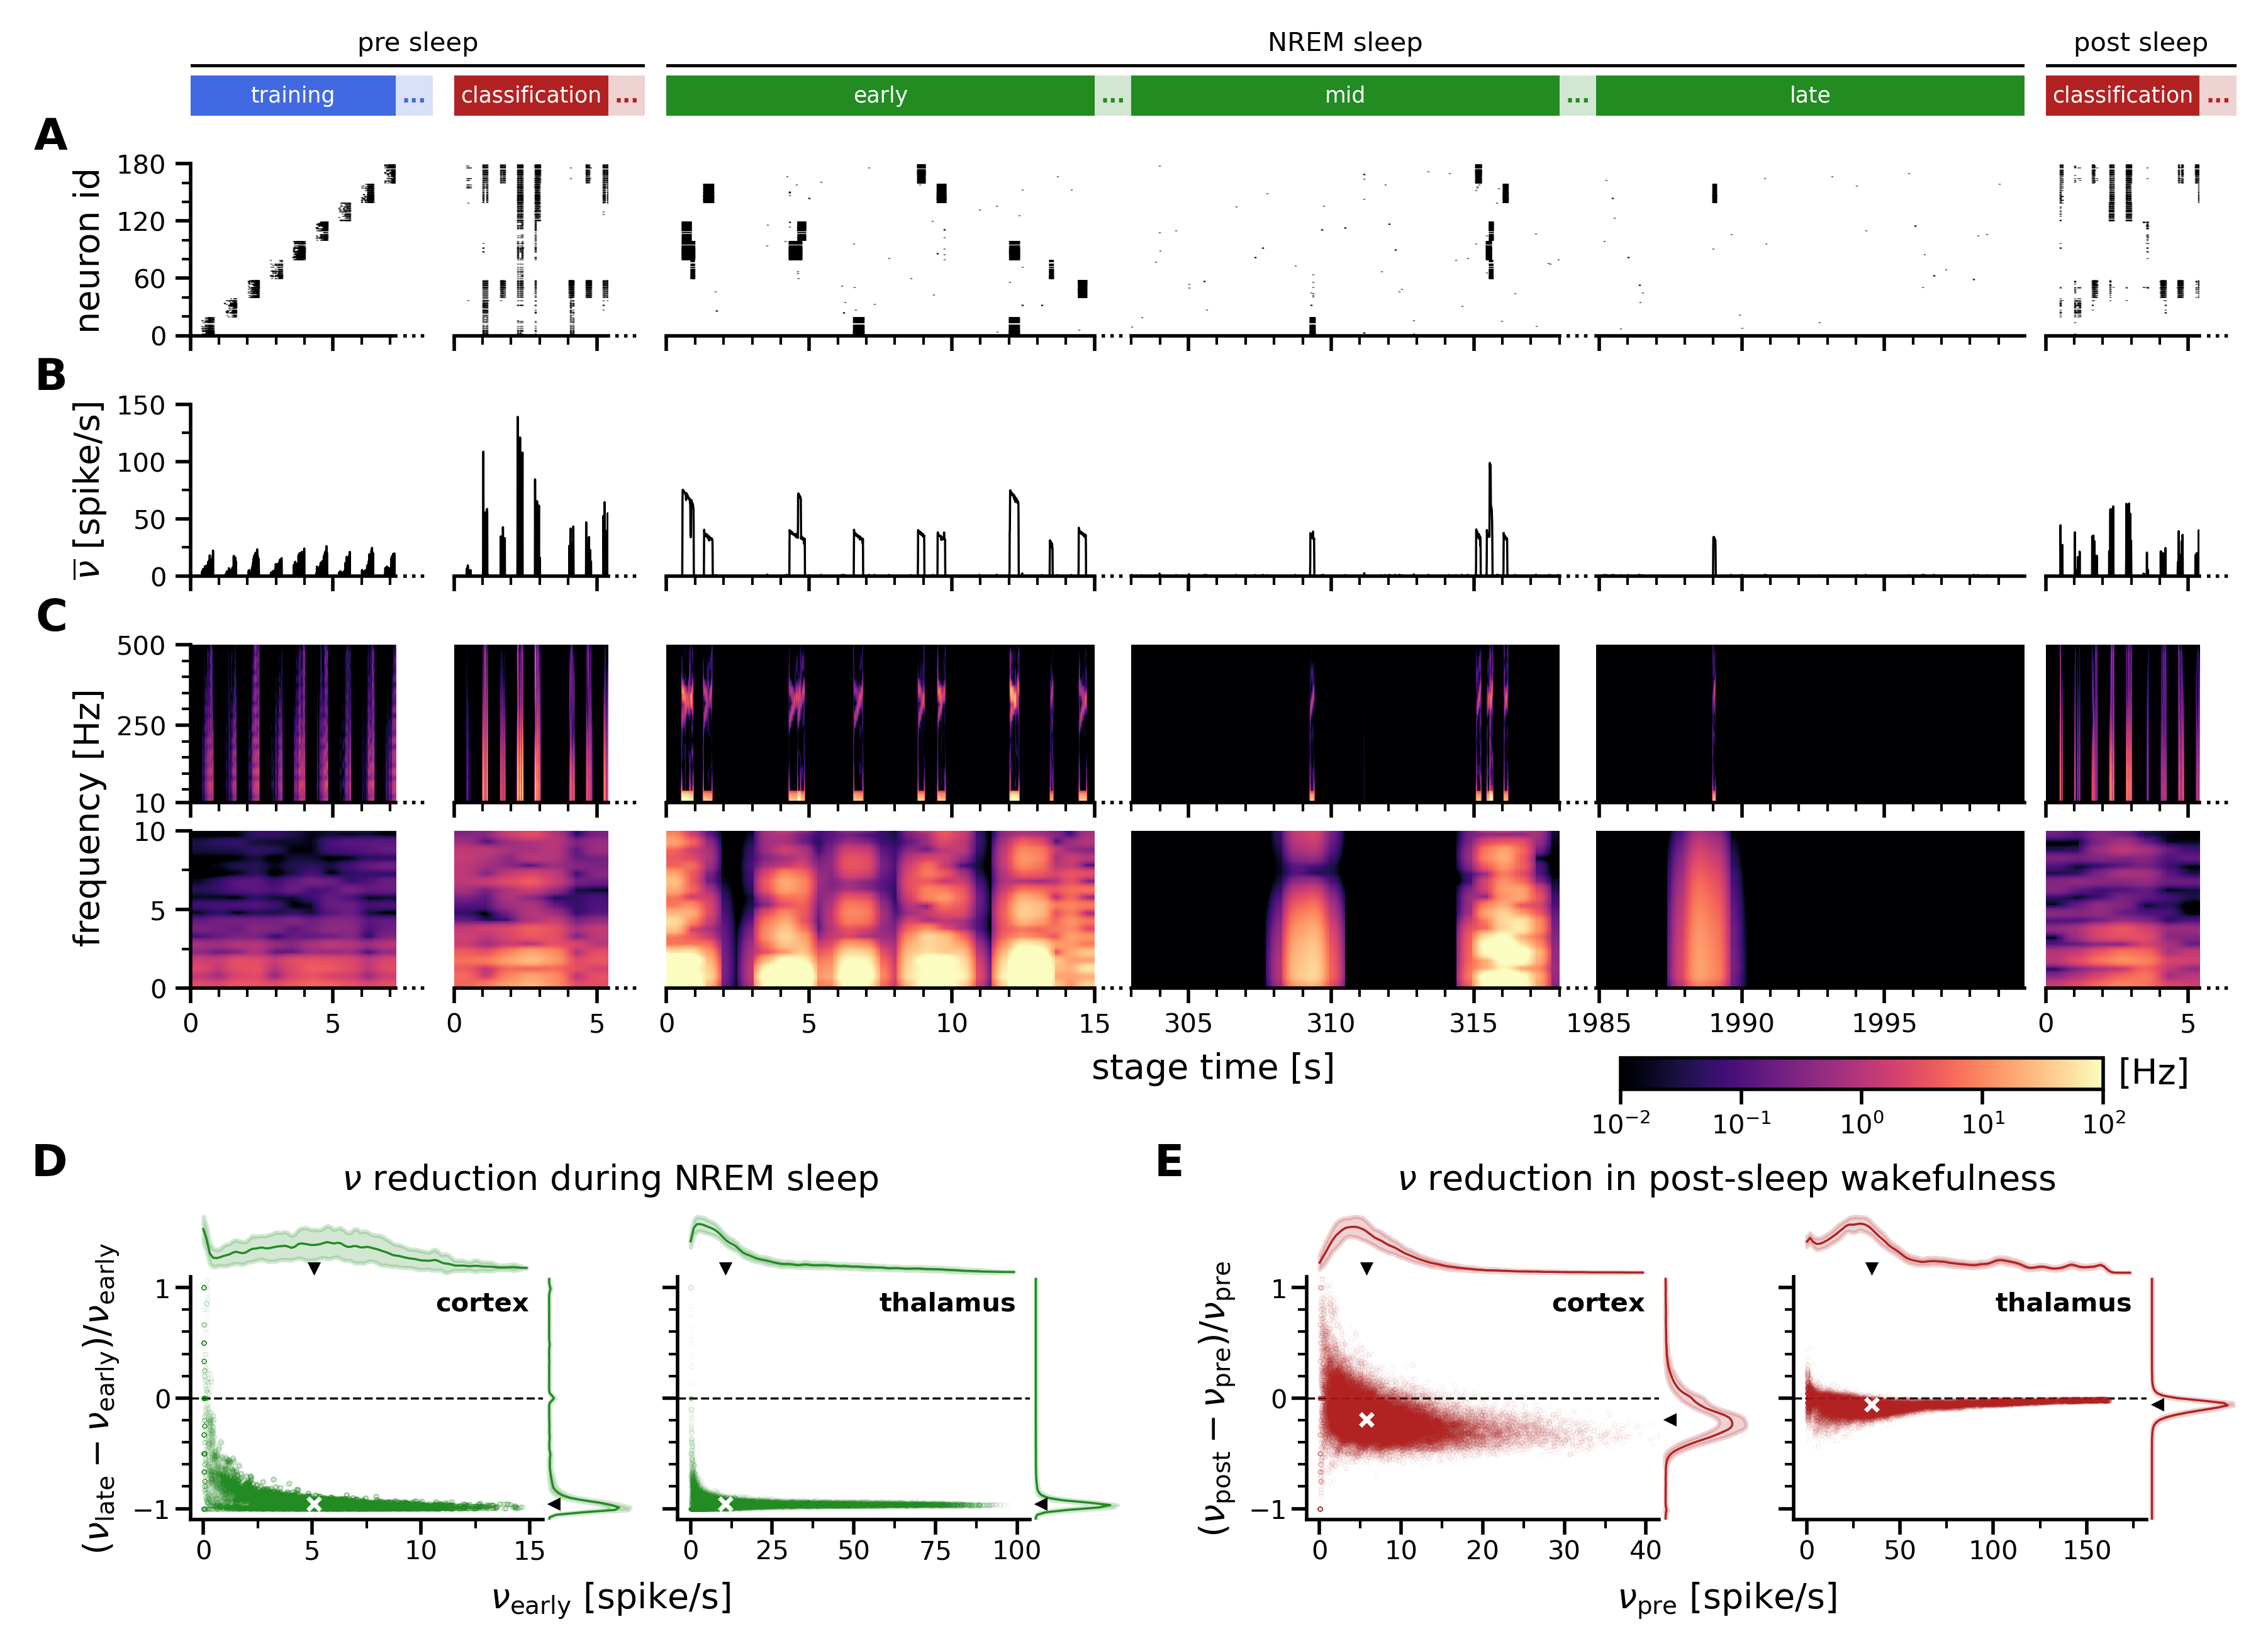

In [147]:
# Figure 2

fig_w = mm_to_inch(full_page_fig_width) 
fig_h = mm_to_inch(0.72*full_page_fig_width)
fig_path = os.path.join(save_path, 'fig2.png')

fig = plt.figure(figsize=(fig_w, fig_h), dpi=dpi)

br = 0.18*subset_train_time
#wr = [subset_train_time, br, subset_test_time, br, subset_nrem_time, br, subset_nrem_time, br, subset_nrem_time, subset_test_time, br]
wr = [subset_train_time+br, subset_test_time+br, 3*subset_nrem_time+2*br, subset_test_time+br]

stage_break = 0.006*subset_train_time
wspace_intra = 0 # .002*subset_train_time

# Main plot split into first block (sleep dynamics) and second row (scatter plots)
gs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig, left=0.072, right=0.990, bottom=0.065, top=0.910,
                       height_ratios=[2.7,1], hspace=0.40, wspace=0)

# First block (sleep dynamics) split into 3 rows (rastergram, firing rate, spectrogram)
subgs_0 = gs[0,:].subgridspec(nrows=3, ncols=1, height_ratios=[1,1,2], hspace=0.30, wspace=0)
#subgs_0 = gs[0,:].subgridspec(nrows=3, ncols=4, wspace=0.3, hspace=0.2, width_ratios=wr)

# Rastergram and Firing rate panels split into 4 columns (training, test, NREM, test)
subgs_00 = subgs_0[0,:].subgridspec(nrows=1, ncols=4, wspace=stage_break, width_ratios=wr)
subgs_01 = subgs_0[1,:].subgridspec(nrows=1, ncols=4, wspace=stage_break, width_ratios=wr)

# Spectrogram firstly split into 2 rows (low and high frequencies), then into 4 columns (training, test, NREM, test)
subgs_02 = subgs_0[2,:].subgridspec(nrows=2, ncols=1, hspace=0.18)
subgs_02u = subgs_02[0,:].subgridspec(nrows=1, ncols=4, wspace=stage_break, width_ratios=wr)
subgs_02d = subgs_02[1,:].subgridspec(nrows=1, ncols=4, wspace=stage_break, width_ratios=wr)

# Training split into 2 columns (training + dots)
subgs_000 = subgs_00[0].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_train_time, br])
subgs_010 = subgs_01[0].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_train_time, br])
subgs_02u0 = subgs_02u[0].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_train_time, br])
subgs_02d0 = subgs_02d[0].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_train_time, br])

# Test-pre split into 2 columns (test + dots)
subgs_001 = subgs_00[1].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_test_time, br])
subgs_011 = subgs_01[1].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_test_time, br])
subgs_02u1 = subgs_02u[1].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_test_time, br])
subgs_02d1 = subgs_02d[1].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_test_time, br])

# NREM split into 5 columns (early + dots + mid + dots + late)
subgs_002 = subgs_00[2].subgridspec(nrows=1, ncols=5, wspace=wspace_intra, width_ratios=[subset_nrem_time, br, subset_nrem_time, br, subset_nrem_time])
subgs_012 = subgs_01[2].subgridspec(nrows=1, ncols=5, wspace=wspace_intra, width_ratios=[subset_nrem_time, br, subset_nrem_time, br, subset_nrem_time])
subgs_02u2 = subgs_02u[2].subgridspec(nrows=1, ncols=5, wspace=wspace_intra, width_ratios=[subset_nrem_time, br, subset_nrem_time, br, subset_nrem_time])
subgs_02d2 = subgs_02d[2].subgridspec(nrows=1, ncols=5, wspace=wspace_intra, width_ratios=[subset_nrem_time, br, subset_nrem_time, br, subset_nrem_time])

# Test-post split into 2 columns (test + dots)
subgs_003 = subgs_00[3].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_test_time, br])
subgs_013 = subgs_01[3].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_test_time, br])
subgs_02u3 = subgs_02u[3].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_test_time, br])
subgs_02d3 = subgs_02d[3].subgridspec(nrows=1, ncols=2, wspace=wspace_intra, width_ratios=[subset_test_time, br])

# Scatter plot row split into 2 columns (one for NREM and one for awake)
subgs_1 = gs[1,:].subgridspec(nrows=1, ncols=2, wspace=0.20)

# Scatter plot row split again in 2 (for cortex and thalamus), for 4 columns in total
subgs_10 = subgs_1[0,0].subgridspec(nrows=1, ncols=2, wspace=0.10)
subgs_11 = subgs_1[0,1].subgridspec(nrows=1, ncols=2, wspace=0.10)

# Each scatter plot split into 2x2 subplots, for scatter plot itself and the pdf of the 2 marginals
subgs_100 = subgs_10[0,0].subgridspec(nrows=2, ncols=2, wspace=0.01, hspace=0.01, height_ratios=[0.25,1], width_ratios=[1,0.25])
subgs_101 = subgs_10[0,1].subgridspec(nrows=2, ncols=2, wspace=0.01, hspace=0.01, height_ratios=[0.25,1], width_ratios=[1,0.25])
subgs_110 = subgs_11[0,0].subgridspec(nrows=2, ncols=2, wspace=0.01, hspace=0.01, height_ratios=[0.25,1], width_ratios=[1,0.25])
subgs_111 = subgs_11[0,1].subgridspec(nrows=2, ncols=2, wspace=0.01, hspace=0.01, height_ratios=[0.25,1], width_ratios=[1,0.25])

# Assigning subplots to axes

# Rastergram panels
ax_00 = fig.add_subplot(subgs_000[0])
ax_01 = fig.add_subplot(subgs_000[1])
ax_02 = fig.add_subplot(subgs_001[0])
ax_03 = fig.add_subplot(subgs_001[1])
ax_04 = fig.add_subplot(subgs_002[0])
ax_05 = fig.add_subplot(subgs_002[1])
ax_06 = fig.add_subplot(subgs_002[2])
ax_07 = fig.add_subplot(subgs_002[3])
ax_08 = fig.add_subplot(subgs_002[4])
ax_09 = fig.add_subplot(subgs_003[0])
ax_010 = fig.add_subplot(subgs_003[1])

# Firing rate panels
ax_10 = fig.add_subplot(subgs_010[0])
ax_11 = fig.add_subplot(subgs_010[1])
ax_12 = fig.add_subplot(subgs_011[0])
ax_13 = fig.add_subplot(subgs_011[1])
ax_14 = fig.add_subplot(subgs_012[0])
ax_15 = fig.add_subplot(subgs_012[1])
ax_16 = fig.add_subplot(subgs_012[2])
ax_17 = fig.add_subplot(subgs_012[3])
ax_18 = fig.add_subplot(subgs_012[4])
ax_19 = fig.add_subplot(subgs_013[0])
ax_110 = fig.add_subplot(subgs_013[1])

# Spectrogram panels - high frequency
ax_20_u = fig.add_subplot(subgs_02u0[0])
ax_21_u = fig.add_subplot(subgs_02u0[1])
ax_22_u = fig.add_subplot(subgs_02u1[0])
ax_23_u = fig.add_subplot(subgs_02u1[1])
ax_24_u = fig.add_subplot(subgs_02u2[0])
ax_25_u = fig.add_subplot(subgs_02u2[1])
ax_26_u = fig.add_subplot(subgs_02u2[2])
ax_27_u = fig.add_subplot(subgs_02u2[3])
ax_28_u = fig.add_subplot(subgs_02u2[4])
ax_29_u = fig.add_subplot(subgs_02u3[0])
ax_210_u = fig.add_subplot(subgs_02u3[1])

# Spectrogram panels - low frequency
ax_20_d = fig.add_subplot(subgs_02d0[0])
ax_21_d = fig.add_subplot(subgs_02d0[1])
ax_22_d = fig.add_subplot(subgs_02d1[0])
ax_23_d = fig.add_subplot(subgs_02d1[1])
ax_24_d = fig.add_subplot(subgs_02d2[0])
ax_25_d = fig.add_subplot(subgs_02d2[1])
ax_26_d = fig.add_subplot(subgs_02d2[2])
ax_27_d = fig.add_subplot(subgs_02d2[3])
ax_28_d = fig.add_subplot(subgs_02d2[4])
ax_29_d = fig.add_subplot(subgs_02d3[0])
ax_210_d = fig.add_subplot(subgs_02d3[1])

# Scatter plots & Histograms - Cortex
ax_30_u = fig.add_subplot(subgs_100[0, 0])
ax_30_d = fig.add_subplot(subgs_100[1, 0])
ax_30_r = fig.add_subplot(subgs_100[1, 1])
ax_31_u = fig.add_subplot(subgs_101[0, 0])
ax_31_d = fig.add_subplot(subgs_101[1, 0])
ax_31_r = fig.add_subplot(subgs_101[1, 1])

# Scatter plots & Histograms - Thalamus
ax_32_u = fig.add_subplot(subgs_110[0, 0])
ax_32_d = fig.add_subplot(subgs_110[1, 0])
ax_32_r = fig.add_subplot(subgs_110[1, 1])
ax_33_u = fig.add_subplot(subgs_111[0, 0])
ax_33_d = fig.add_subplot(subgs_111[1, 0])
ax_33_r = fig.add_subplot(subgs_111[1, 1])

axes4 = [ax_00, ax_01, ax_02, ax_03, ax_04, ax_05, ax_06, ax_07, ax_08, ax_09, ax_010,
         ax_10, ax_11, ax_12, ax_13, ax_14, ax_15, ax_16, ax_17, ax_18, ax_19, ax_110,
         ax_20_u, ax_21_u, ax_22_u, ax_23_u, ax_24_u, ax_25_u, ax_26_u, ax_27_u, ax_28_u, ax_29_u, ax_210_u,
         ax_20_d, ax_21_d, ax_22_d, ax_23_d, ax_24_d, ax_25_d, ax_26_d, ax_27_d, ax_28_d, ax_29_d, ax_210_d,
         ax_30_u, ax_30_d, ax_30_r,
         ax_31_u, ax_31_d, ax_31_r,
         ax_32_u, ax_32_d, ax_32_r,
         ax_33_u, ax_33_d, ax_33_r
        ]

for ax in axes4:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    #ax.spines['bottom'].set_zorder(10)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=fontsize_ticks, pad=2)
    ax.minorticks_on()
for ax in [ax_00, ax_10, ax_20_u, ax_20_d, ax_30_d, ax_31_d, ax_32_d, ax_33_d]:
    ax.spines['left'].set_visible(True)
for ax in [ax_30_u, ax_30_r, ax_31_u, ax_31_r, ax_32_u, ax_32_r, ax_33_u, ax_33_r]:
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
for ax in [ax_01, ax_03, ax_05, ax_07, ax_010,
           ax_11, ax_13, ax_15, ax_17, ax_110,
           ax_21_u, ax_23_u, ax_25_u, ax_27_u, ax_210_u,
           ax_21_d, ax_23_d, ax_25_d, ax_27_d, ax_210_d]:
    ax.set_facecolor('none')
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

x_offset_vertical_ylabels = -0.045 # Measured in [0,1] range with respect to the left x position of the corresponding axis

# Top decorations

x_offset = 0
y_offset = 0.0300
rect_height = 0.025

for a,ax in enumerate([ax_00, ax_02, ax_04, ax_06, ax_08, ax_09]):
    stage = ['training', 'test', 'nrem', 'nrem', 'nrem', 'test'][a]
    label = ['training', 'classification', 'early', 'mid', 'late', 'classification'][a]
    x_anchor = ax.get_position().x0 + x_offset
    y_anchor = ax.get_position().y1 + y_offset
    rect_width = ax.get_position().x1 - ax.get_position().x0 - 2*x_offset
    fig.add_artist(Rectangle((x_anchor, y_anchor), rect_width, rect_height, facecolor=colors_stages[stage], edgecolor='None', alpha=1.0))
    x_anchor = 0.50 * (ax.get_position().x1 + ax.get_position().x0)
    y_anchor = ax.get_position().y1 + y_offset + 0.5*rect_height
    fig.text(x_anchor, y_anchor, label, ha="center", va="center", fontsize=fontsize_legend-1, color="white")

for a,ax in enumerate([ax_01, ax_03, ax_05, ax_07, ax_010]):
    stage = ['training', 'test', 'nrem', 'nrem', 'test'][a]
    x_anchor = ax.get_position().x0 + x_offset
    y_anchor = ax.get_position().y1 + y_offset
    rect_width = ax.get_position().x1 - ax.get_position().x0 - 2*x_offset
    fig.add_artist(Rectangle((x_anchor, y_anchor), rect_width, rect_height, facecolor=colors_stages[stage], edgecolor='None', alpha=0.2, linewidth=0))
    x_anchor = 0.50 * (ax.get_position().x1 + ax.get_position().x0)
    y_anchor = ax.get_position().y1 + y_offset + 0.5*rect_height
    fig.text(x_anchor, y_anchor, "...", ha="center", va="center", fontsize=fontsize_legend-1, color=colors_stages[stage], fontweight='bold')

y_offset += rect_height + 0.005

for a,(axl,axr) in enumerate([(ax_00,ax_03), (ax_04,ax_08), (ax_09,ax_010)]):
    label = ["pre sleep", "NREM sleep", "post sleep"][a]
    x_anchor = axl.get_position().x0 + x_offset
    y_anchor = axl.get_position().y1 + y_offset
    rect_width = axr.get_position().x1 - axl.get_position().x0 - 2*x_offset
    #fig.add_artist(Rectangle((x_anchor, y_anchor), rect_width, rect_height, facecolor='None', edgecolor='black', alpha=1.0, linewidth=0.5))
    fig.add_artist(Rectangle((x_anchor, y_anchor), rect_width, 0.08*rect_height, facecolor='black', edgecolor='None', linewidth=0))
    x_anchor = 0.50 * (axr.get_position().x1 + axl.get_position().x0)
    y_anchor = axl.get_position().y1 + y_offset + 0.6*rect_height
    fig.text(x_anchor, y_anchor, label, ha="center", va="center", fontsize=fontsize_legend, color="black")



# Common to panels A, B and C; B gets a rescaling

x_maj_loc = 5
x_min_loc = 1
for ax in [ax_00, ax_02, ax_04, ax_06, ax_08, ax_09,
           ax_10, ax_12, ax_14, ax_16, ax_18, ax_19,
           ax_20_u, ax_22_u, ax_24_u, ax_26_u, ax_28_u, ax_29_u]:
    ax.tick_params(axis='x', labelbottom=False)
    ax.xaxis.set_major_locator(MultipleLocator(x_maj_loc))
    ax.xaxis.set_minor_locator(MultipleLocator(x_min_loc))
for ax in [ax_20_d, ax_22_d, ax_24_d, ax_26_d, ax_28_d, ax_29_d]:
    ax.tick_params(axis='x', labelbottom=True)
    ax.xaxis.set_major_locator(MultipleLocator(x_maj_loc))
    ax.xaxis.set_minor_locator(MultipleLocator(x_min_loc))



# Panel A - Rastergram

for ax in [ax_00, ax_02, ax_04, ax_06, ax_08, ax_09]:
    ax.set_ylim([0, 180])
    if ax==ax_00:
        ax.yaxis.set_major_locator(MultipleLocator(60))
        ax.yaxis.set_minor_locator(MultipleLocator(20))
        fig.text(ax_00.get_position().x0 + x_offset_vertical_ylabels, 0.50 * (ax_00.get_position().y1 + ax_00.get_position().y0), "neuron id",
                 rotation=90, ha='center', va='center', fontsize=fontsize_labels)
    else:
        ax.set_yticks([])
        ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# training
ax = ax_00
y = [_-t0 for _ in data_raster_train[0:n_neur_cx_subset]]
ax.eventplot(y, linelengths=0.8, linewidths=0.5, color='Black')
ax.set_xlim(0, t1-t0)

# test - pre
ax = ax_02
y = [_-t2 for _ in data_raster_test_pre[0:n_neur_cx_subset]]
ax.eventplot(y, linelengths=0.8, linewidths=0.5, color='Black')
ax.set_xlim(0, t3-t2)

# nrem early
ax = ax_04
y = [_-t4 for _ in data_raster_nrem1[0:n_neur_cx_subset]]
ax.eventplot(y, linelengths=0.8, linewidths=0.5, color='Black')
ax.set_xlim(0, t5-t4)

# nrem mid
ax = ax_06
y = [_-t4 for _ in data_raster_nrem2[0:n_neur_cx_subset]]
ax.eventplot(y, linelengths=0.8, linewidths=0.5, color='Black')
ax.set_xlim(t6-t4, t7-t4)

# nrem late
ax = ax_08
y = [_-t4 for _ in data_raster_nrem3[0:n_neur_cx_subset]]
ax.eventplot(y, linelengths=0.8, linewidths=0.5, color='Black')
ax.set_xlim(t8-t4, t9-t4)

# test - post
ax = ax_09
y = [_-t10 for _ in data_raster_test_post[0:n_neur_cx_subset]]
ax.eventplot(y, linelengths=0.8, linewidths=0.5, color='Black')
ax.set_xlim(0, t11-t10)



# Panel B - Firing Rate

for ax in [ax_10, ax_12, ax_14, ax_16, ax_18, ax_19]:
    ax.set_ylim([0, 150])
    if ax==ax_10:
        fig.text(ax_10.get_position().x0 + x_offset_vertical_ylabels, 0.50 * (ax_10.get_position().y1 + ax_10.get_position().y0),
#                 r'$\langle r \rangle$ [spike/s]', rotation=90, ha='center', va='center', fontsize=fontsize_labels)
                 r'$\overline{\nu}$ [spike/s]', rotation=90, ha='center', va='center', fontsize=fontsize_labels)
        ax.yaxis.set_major_locator(MultipleLocator(50))
        ax.yaxis.set_minor_locator(MultipleLocator(25))
    else:
        ax.set_yticks([])
        ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# training
ax = ax_10
ax.plot(np.linspace(0,t1-t0,len(data_fr_train_low)), data_fr_train_low, ls='-', color='Black', linewidth=0.5)
ax.set_xlim(0, t1-t0)

# test - pre
ax = ax_12
ax.plot(np.linspace(0,t3-t2,len(data_fr_test_pre_low)), data_fr_test_pre_low, ls='-', color='Black', linewidth=0.5)
ax.set_xlim(0, t3-t2)

# nrem early
ax = ax_14
ax.plot(np.linspace(0,t5-t4,len(data_fr_nrem1_low)), data_fr_nrem1_low, ls='-', color='Black', linewidth=0.5)
ax.set_xlim(0, t5-t4)

# nrem mid
ax = ax_16
ax.plot(np.linspace(t6-t4,t7-t4,len(data_fr_nrem2_low)), data_fr_nrem2_low, ls='-', color='Black', linewidth=0.5)
ax.set_xlim(t6-t4, t7-t4)

# nrem late
ax = ax_18
ax.plot(np.linspace(t8-t4,t9-t4,len(data_fr_nrem3_low)), data_fr_nrem3_low, ls='-', color='Black', linewidth=0.5)
ax.set_xlim(t8-t4, t9-t4)

# test - post
ax = ax_19
ax.plot(np.linspace(0,t11-t10,len(data_fr_test_post_low)), data_fr_test_post_low, ls='-', color='Black', linewidth=0.5)
ax.set_xlim(0, t11-t10)



# Panel C - Spectrogram

for ax in [ax_20_u, ax_22_u, ax_24_u, ax_26_u, ax_28_u, ax_29_u]:
    ax.set_ylim([10, 500])
    if ax==ax_20_u:
        ax.yaxis.set_major_locator(MultipleLocator(250))
        ax.yaxis.set_minor_locator(MultipleLocator(50))
        ax.set_yticks([10, 250, 500])
    else:
        ax.set_yticks([])
        ax.tick_params(axis='y', which='minor', length=0)

for ax in [ax_20_d, ax_22_d, ax_24_d, ax_26_d, ax_28_d, ax_29_d]:
    ax.set_ylim([0, 10])
    if ax==ax_20_d:
        ax.yaxis.set_major_locator(MultipleLocator(5))
        ax.yaxis.set_minor_locator(MultipleLocator(2.5))
    else:
        ax.set_yticks([])
        ax.tick_params(axis='y', which='minor', length=0)

fig.text(ax_20_d.get_position().x0 + x_offset_vertical_ylabels, 0.50 * (ax_20_u.get_position().y1 + ax_20_d.get_position().y0),
         "frequency [Hz]", rotation=90, ha='center', va='center', fontsize=fontsize_labels)

fig.text(0.50 * (ax_20_d.get_position().x0 + ax_210_d.get_position().x1), ax_20_d.get_position().y0 - 0.050,
         "stage time [s]", ha='center', va='center', fontsize=fontsize_labels)

# training
ax = ax_20_u
ax.set_xlim(0, t1-t0)
#ax.imshow(Sxx_train_high, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t1-t0, f_high[0], f_high[-1]], origin='lower')
ax.imshow(Spectrograms['train']['high'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t1-t0, f_high[0], f_high[-1]], origin='lower')
ax = ax_20_d
ax.set_xlim(0, t1-t0)
#ax.imshow(Sxx_train_low, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t1-t0, f_low[0], f_low[-1]], origin='lower')
ax.imshow(Spectrograms['train']['low'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t1-t0, f_low[0], f_low[-1]], origin='lower')

# test - pre
ax = ax_22_u
ax.set_xlim(0, t3-t2)
#ax.imshow(Sxx_test_pre_high, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t3-t2, f_high[0], f_high[-1]], origin='lower')
ax.imshow(Spectrograms['test_pre']['high'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t3-t2, f_high[0], f_high[-1]], origin='lower')
ax = ax_22_d
ax.set_xlim(0, t3-t2)
#ax.imshow(Sxx_test_pre_low, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t3-t2, f_low[0], f_low[-1]], origin='lower')
ax.imshow(Spectrograms['test_pre']['low'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t3-t2, f_low[0], f_low[-1]], origin='lower')

# nrem early
ax = ax_24_u
ax.set_xlim(0, t5-t4)
#ax.imshow(Sxx_nrem1_high, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t5-t4, f_high[0], f_high[-1]], origin='lower')
ax.imshow(Spectrograms['nrem_early']['high'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t5-t4, f_high[0], f_high[-1]], origin='lower')
ax = ax_24_d
ax.set_xlim(0, t5-t4)
#ax.imshow(Sxx_nrem1_low, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t5-t4, f_low[0], f_low[-1]], origin='lower')
ax.imshow(Spectrograms['nrem_early']['low'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t5-t4, f_low[0], f_low[-1]], origin='lower')

# nrem mid
ax = ax_26_u
ax.set_xlim(t6-t4, t7-t4)
#ax.imshow(Sxx_nrem2_high, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[t6-t4, t7-t4, f_high[0], f_high[-1]], origin='lower')
ax.imshow(Spectrograms['nrem_mid']['high'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[t6-t4, t7-t4, f_high[0], f_high[-1]], origin='lower')
ax = ax_26_d
ax.set_xlim(t6-t4, t7-t4)
#ax.imshow(Sxx_nrem2_low, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[t6-t4, t7-t4, f_low[0], f_low[-1]], origin='lower')
ax.imshow(Spectrograms['nrem_mid']['low'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[t6-t4, t7-t4, f_low[0], f_low[-1]], origin='lower')

# nrem late
ax = ax_28_u
ax.set_xlim(t8-t4, t9-t4)
#ax_28_u.imshow(Sxx_nrem3_high, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[t8-t4, t9-t4, f_high[0], f_high[-1]], origin='lower')
ax_28_u.imshow(Spectrograms['nrem_late']['high'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[t8-t4, t9-t4, f_high[0], f_high[-1]], origin='lower')
ax = ax_28_d
ax.set_xlim(t8-t4, t9-t4)
#ax_28_d.imshow(Sxx_nrem3_low, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[t8-t4, t9-t4, f_low[0], f_low[-1]], origin='lower')
ax_28_d.imshow(Spectrograms['nrem_late']['low'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[t8-t4, t9-t4, f_low[0], f_low[-1]], origin='lower')

# test - post
ax = ax_29_u
ax.set_xlim(0, t11-t10)
#ax.imshow(Sxx_test_post_high, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t11-t10, f_high[0], f_high[-1]], origin='lower')
ax.imshow(Spectrograms['test_post']['high'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t11-t10, f_high[0], f_high[-1]], origin='lower')
ax = ax_29_d
ax.set_xlim(0, t11-t10)
#im_spect = ax.imshow(Sxx_test_post_low, norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t11-t10, f_low[0], f_low[-1]], origin='lower')
im_spect = ax.imshow(Spectrograms['test_post']['low'][2], norm=norm_spect, cmap='magma', aspect='auto', interpolation='hamming', extent=[0, t11-t10, f_low[0], f_low[-1]], origin='lower')

"""
for ax in [ax_20_d, ax_22_d, ax_29_d]:
    ax.tick_params('x', pad=1)
for ax in [ax_24_d, ax_28_d]:
    ax.tick_params('x', pad=8)
    #ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=30, rotation_mode='anchor', ha='right', va='top')
"""

# colorbar
if False:
    x_anchor = ax_210_d.get_position().x1 + 0.005
    y_anchor = ax_210_d.get_position().y0
    cb_width = 0.01
    cb_height = ax_210_u.get_position().y1 -  ax_210_d.get_position().y0
    ax_cb = fig.add_axes([x_anchor, y_anchor, cb_width, cb_height])
    cb = plt.colorbar(im_spect, cax=ax_cb, orientation='vertical')
    cb.ax.tick_params(labelsize=fontsize_ticks, pad=2)
    cb.ax.tick_params(axis='y', which='minor', length=0)
    cb.ax.text(0.50, 1.02, '[Hz]', ha="center", va="bottom", transform=ax_cb.transAxes, fontsize=fontsize_ticks)

cb_width = 0.80 * (ax_29_d.get_position().x1 - ax_28_d.get_position().x0)
cb_height = 0.20 * (ax_28_d.get_position().y1 - ax_28_d.get_position().y0)
x_anchor = ax_29_d.get_position().x1 - 1.2 * cb_width
y_anchor = ax_28_d.get_position().y0 - 3.2 * cb_height
ax_cb = fig.add_axes([x_anchor, y_anchor, cb_width, cb_height])
cb = plt.colorbar(im_spect, cax=ax_cb, orientation='horizontal')
cb.ax.tick_params(labelsize=fontsize_ticks, pad=2)
cb.ax.tick_params(axis='x', which='minor', length=0)
cb.ax.text(1.03, 0.50, '[Hz]', ha="left", va="center", transform=ax_cb.transAxes, fontsize=fontsize_labels)



# Broken-axes symbols for panels A-C

broken_height = 0.014
broken_length = 0.005
broken_spacing = 0.003
broken_width = 0.75
broken_color = 'black'
for ax in [ax_01, ax_03, ax_05, ax_07, ax_010,
           ax_11, ax_13, ax_15, ax_17, ax_110,
           ax_21_u, ax_23_u, ax_25_u, ax_27_u, ax_210_u,
           ax_21_d, ax_23_d, ax_25_d, ax_27_d, ax_210_d]:
    ax.plot([0.2,0.8], [0,0], color='black', linestyle=(0,(1,1.5)), linewidth=0.8, clip_on=False)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)



# Panel D - Scatter plots & histograms

error_bar = 'std' # can be 'std' or 'iqr'

layers = ['cx', 'th', 'cx', 'th']
states = ['sleep', 'sleep', 'awake', 'awake']
whens = ['early', 'early', 'pre', 'pre']
for a, ax in enumerate([ax_30_d, ax_31_d, ax_32_d, ax_33_d]):
    layer = layers[a]
    state = states[a]
    ax.axhline(0, ls='--', linewidth=0.5, color='black', zorder=-1)
    ax.tick_params("both", labelsize=fontsize_ticks, pad=1, rotation=0)
    #ax.set_xticklabels(, ha="right", va="top", rotation_mode="anchor")
    #ax.set_xlabel(x_labels[layer][state], fontsize=fontsize_legend, labelpad=2)
    #ax.set_ylabel(y_labels[layer][state], fontsize=fontsize_legend, labelpad=2)
    xlow, xhigh = neur_fr[layer][state]['x_lims']
    ylow, yhigh = neur_fr[layer][state]['y_lims']
    ax.set_xlim(xlow-0.04*(xhigh-xlow), xhigh+0.04*(xhigh-xlow))
    ax.set_ylim(ylow, yhigh)
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.2))
for ax in [ax_31_d, ax_33_d]:
    ax.tick_params(axis='y', labelleft=False)
for a, ax in enumerate([ax_30_u, ax_31_u, ax_32_u, ax_33_u]):
    layer = layers[a]
    state = states[a]
    when = whens[a]
    xlow, xhigh = neur_fr[layer][state]['x_lims']
    ax.set_xlim(xlow-0.04*(xhigh-xlow), xhigh+0.04*(xhigh-xlow))
    if error_bar=='std':
        xx, yy, ss = neur_fr[layer][state]['mean_hist'][when]
        ylow, yhigh = np.min(yy-ss), np.max(yy+ss)
    elif error_bar=='iqr':
        xx, yy, yy_d, yy_u = neur_fr[layer][state]['median_hist'][when]
        ylow, yhigh = np.min(yy_d), np.max(yy_u)
    ax.set_ylim(ylow-0.04*(yhigh-ylow), yhigh+0.04*(yhigh-ylow))
for a, ax in enumerate([ax_30_r, ax_31_r, ax_32_r, ax_33_r]):
    layer = layers[a]
    state = states[a]
    if error_bar=='std':
        xx, yy, ss = neur_fr[layer][state]['mean_hist']['ratio']
        xlow, xhigh = np.min(yy-ss), np.max(yy+ss)
    elif error_bar=='iqr':
        xx, yy, yy_d, yy_u = neur_fr[layer][state]['median_hist']['ratio']
        xlow, xhigh = np.min(yy_d), np.max(yy_u)
    ax.set_xlim(xlow-0.04*(xhigh-xlow), xhigh+0.04*(xhigh-xlow))
    ylow, yhigh = neur_fr[layer][state]['y_lims']
    ax.set_ylim(ylow, yhigh)

fig.text(0.5 * (ax_30_d.get_position().x0 + ax_31_d.get_position().x1),
         ax_30_u.get_position().y1 + 0.010,
         r'$\nu$ reduction during NREM sleep', ha="center", va="bottom",
         fontsize=fontsize_labels, color='black')

fig.text(0.5 * (ax_32_d.get_position().x0 + ax_33_d.get_position().x1),
         ax_32_u.get_position().y1 + 0.010,
         r'$\nu$ reduction in post-sleep wakefulness', ha="center", va="bottom",
         fontsize=fontsize_labels, color='black')

fig.text(0.50 * (ax_31_d.get_position().x1 + ax_30_d.get_position().x0), ax_30_d.get_position().y0 - 0.050,
         r'$\nu_{\mathrm{early}}$ [spike/s]', rotation=0, ha='center', va='center', fontsize=fontsize_labels)
fig.text(ax_30_d.get_position().x0 - 0.040, 0.50 * (ax_30_d.get_position().y1 + ax_30_d.get_position().y0),
         r'$(\nu_{\mathrm{late}} - \nu_{\mathrm{early}}) / \nu_{\mathrm{early}}$',
         rotation=90, ha='center', va='center', fontsize=fontsize_labels)
fig.text(0.50 * (ax_33_d.get_position().x1 + ax_32_d.get_position().x0), ax_32_d.get_position().y0 - 0.050,
         r'$\nu_{\mathrm{pre}}$ [spike/s]', rotation=0, ha='center', va='center', fontsize=fontsize_labels)
fig.text(ax_32_d.get_position().x0 - 0.040, 0.50 * (ax_32_d.get_position().y1 + ax_32_d.get_position().y0),
         r'$(\nu_{\mathrm{post}} - \nu_{\mathrm{pre}}) / \nu_{\mathrm{pre}}$',
         rotation=90, ha='center', va='center', fontsize=fontsize_labels)

x_anchor = 0.96
y_anchor = 0.94

# Cortex awake

layer = 'cx'
state = 'awake'

ax_d = ax_32_d
ax_u = ax_32_u
ax_r = ax_32_r

data_x = neur_fr[layer][state]['data'][:,0,:].flatten()
data_y = neur_fr[layer][state]['data'][:,1,:].flatten()
data_diff = np.divide(data_y, data_x, where=data_x != 0) - 1
data_diff[np.broadcast_to((data_x == 0), data_diff.shape)] = np.nan
ax_d.scatter(data_x, data_diff, color=colors_stages[state], s=0.01, alpha=0.1)
ax_d.xaxis.set_major_locator(MultipleLocator(10))
ax_d.xaxis.set_minor_locator(MultipleLocator(5))
med_x = np.nanmedian(data_x)
med_y = np.nanmedian(data_diff)
ax_d.text(x_anchor, y_anchor, 'cortex', ha="right", va="top",
          fontsize=fontsize_legend, fontweight='bold', transform=ax_d.transAxes, color='black')
          # bbox=dict(boxstyle='round', facecolor='mediumorchid', edgecolor='mediumorchid', alpha=0.1)

if error_bar=='std':
    data_x, data_y, data_s = neur_fr[layer][state]['mean_hist']['pre']
    data_y_d = data_y-data_s
    data_y_u = data_y+data_s
elif error_bar=='iqr':
    data_x, data_y, data_y_d, data_y_u = neur_fr[layer][state]['median_hist']['pre']
ax_u.plot(data_x, data_y, ls='-', linewidth=0.5, color=colors_stages[state])
ax_u.fill_between(data_x, data_y_d, data_y_u, color=colors_stages[state], alpha=0.2)
ylow, yhigh = np.min(data_y_d), np.max(data_y_u)
ylow -= 0.04*(yhigh-ylow)
yhigh += 0.04*(yhigh-ylow)

if error_bar=='std':
    data_x, data_y, data_s = neur_fr[layer][state]['mean_hist']['ratio']
    data_y_d = data_y-data_s
    data_y_u = data_y+data_s
elif error_bar=='iqr':
    data_x, data_y, data_y_d, data_y_u = neur_fr[layer][state]['median_hist']['ratio']
ax_r.plot(data_y, data_x, ls='-', linewidth=0.5, color=colors_stages[state])
ax_r.fill_betweenx(data_x, data_y_d, data_y_u, color=colors_stages[state], alpha=0.2)
xlow, xhigh = np.min(data_y_d), np.max(data_y_u)
xlow -= 0.04*(xhigh-xlow)
xhigh += 0.04*(xhigh-xlow)

ax_d.plot(med_x, med_y, marker='x', color='white', markersize=3)
ax_u.plot(med_x, ylow+0.13*(yhigh-ylow), marker='v', color='Black', markersize=1.5)
ax_r.plot(xlow+0.11*(xhigh-xlow), med_y, marker='<', color='Black', markersize=1.5)

# Cortex sleep

layer = 'cx'
state = 'sleep'

ax_d = ax_30_d
ax_u = ax_30_u
ax_r = ax_30_r

data_x = neur_fr[layer][state]['data'][:,0,:].flatten()
data_y = neur_fr[layer][state]['data'][:,1,:].flatten()
data_diff = np.divide(data_y, data_x, where=data_x != 0) - 1
data_diff[np.broadcast_to((data_x == 0), data_diff.shape)] = np.nan
ax_d.scatter(data_x, data_diff, color=colors_stages[state], s=0.01, alpha=0.1)
ax_d.xaxis.set_major_locator(MultipleLocator(5))
ax_d.xaxis.set_minor_locator(MultipleLocator(2.5))
med_x = np.nanmedian(data_x)
med_y = np.nanmedian(data_diff)
ax_d.text(x_anchor, y_anchor, 'cortex', ha="right", va="top",
          fontsize=fontsize_legend, fontweight='bold', transform=ax_d.transAxes, color='black')
          # bbox=dict(boxstyle='round', facecolor='mediumorchid', edgecolor='mediumorchid', alpha=0.1)

if error_bar=='std':
    data_x, data_y, data_s = neur_fr[layer][state]['mean_hist']['early']
    data_y_d = data_y-data_s
    data_y_u = data_y+data_s
elif error_bar=='iqr':
    data_x, data_y, data_y_d, data_y_u = neur_fr[layer][state]['median_hist']['early']
ax_u.plot(data_x, data_y, ls='-', linewidth=0.5, color=colors_stages[state])
ax_u.fill_between(data_x, data_y_d, data_y_u, color=colors_stages[state], alpha=0.2)
ylow, yhigh = np.min(data_y_d), np.max(data_y_u)
ylow -= 0.04*(yhigh-ylow)
yhigh += 0.04*(yhigh-ylow)

if error_bar=='std':
    data_x, data_y, data_s = neur_fr[layer][state]['mean_hist']['ratio']
    data_y_d = data_y-data_s
    data_y_u = data_y+data_s
elif error_bar=='iqr':
    data_x, data_y, data_y_d, data_y_u = neur_fr[layer][state]['median_hist']['ratio']
ax_r.plot(data_y, data_x, ls='-', linewidth=0.5, color=colors_stages[state])
ax_r.fill_betweenx(data_x, data_y_d, data_y_u, color=colors_stages[state], alpha=0.2)
xlow, xhigh = np.min(data_y_d), np.max(data_y_u)
xlow -= 0.04*(xhigh-xlow)
xhigh += 0.04*(xhigh-xlow)

ax_d.plot(med_x, med_y, marker='x', color='white', markersize=3)
ax_u.plot(med_x, ylow+0.13*(yhigh-ylow), marker='v', color='Black', markersize=1.5)
ax_r.plot(xlow+0.11*(xhigh-xlow), med_y, marker='<', color='Black', markersize=1.5)

# Thalamus awake

layer = 'th'
state = 'awake'

ax_d = ax_33_d
ax_u = ax_33_u
ax_r = ax_33_r

data_x = neur_fr[layer][state]['data'][:,0,:].flatten()
data_y = neur_fr[layer][state]['data'][:,1,:].flatten()
data_diff = np.divide(data_y, data_x, where=data_x != 0) - 1
data_diff[np.broadcast_to((data_x == 0), data_diff.shape)] = np.nan
ax_d.scatter(data_x, data_diff, color=colors_stages[state], s=0.01, alpha=0.1)
ax_d.xaxis.set_major_locator(MultipleLocator(50))
ax_d.xaxis.set_minor_locator(MultipleLocator(25))
med_x = np.nanmedian(data_x)
med_y = np.nanmedian(data_diff)
ax_d.text(x_anchor, y_anchor, 'thalamus', ha="right", va="top",
          fontsize=fontsize_legend, fontweight='bold', transform=ax_d.transAxes, color='black')
          # bbox=dict(boxstyle='round', facecolor='mediumorchid', edgecolor='mediumorchid', alpha=0.1)

if error_bar=='std':
    data_x, data_y, data_s = neur_fr[layer][state]['mean_hist']['pre']
    data_y_d = data_y-data_s
    data_y_u = data_y+data_s
elif error_bar=='iqr':
    data_x, data_y, data_y_d, data_y_u = neur_fr[layer][state]['median_hist']['pre']
ax_u.plot(data_x, data_y, ls='-', linewidth=0.5, color=colors_stages[state])
ax_u.fill_between(data_x, data_y_d, data_y_u, color=colors_stages[state], alpha=0.2)
ylow, yhigh = np.min(data_y_d), np.max(data_y_u)
ylow -= 0.04*(yhigh-ylow)
yhigh += 0.04*(yhigh-ylow)

if error_bar=='std':
    data_x, data_y, data_s = neur_fr[layer][state]['mean_hist']['ratio']
    data_y_d = data_y-data_s
    data_y_u = data_y+data_s
elif error_bar=='iqr':
    data_x, data_y, data_y_d, data_y_u = neur_fr[layer][state]['median_hist']['ratio']
ax_r.plot(data_y, data_x, ls='-', linewidth=0.5, color=colors_stages[state])
ax_r.fill_betweenx(data_x, data_y_d, data_y_u, color=colors_stages[state], alpha=0.2)
xlow, xhigh = np.min(data_y_d), np.max(data_y_u)
xlow -= 0.04*(xhigh-xlow)
xhigh += 0.04*(xhigh-xlow)

ax_d.plot(med_x, med_y, marker='x', color='white', markersize=3)
ax_u.plot(med_x, ylow+0.13*(yhigh-ylow), marker='v', color='Black', markersize=1.5)
ax_r.plot(xlow+0.11*(xhigh-xlow), med_y, marker='<', color='Black', markersize=1.5)

# Thalamus - Sleep

layer = 'th'
state = 'sleep'

ax_d = ax_31_d
ax_u = ax_31_u
ax_r = ax_31_r

data_x = neur_fr[layer][state]['data'][:,0,:].flatten()
data_y = neur_fr[layer][state]['data'][:,1,:].flatten()
data_diff = np.divide(data_y, data_x, where=data_x != 0) - 1
data_diff[np.broadcast_to((data_x == 0), data_diff.shape)] = np.nan
ax_d.scatter(data_x, data_diff, color=colors_stages[state], s=0.01, alpha=0.1)
ax_d.xaxis.set_major_locator(MultipleLocator(25))
ax_d.xaxis.set_minor_locator(MultipleLocator(12.5))
med_x = np.nanmedian(data_x)
med_y = np.nanmedian(data_diff)
ax_d.text(x_anchor, y_anchor, 'thalamus', ha="right", va="top",
          fontsize=fontsize_legend, fontweight='bold', transform=ax_d.transAxes, color='black')
          # bbox=dict(boxstyle='round', facecolor='mediumorchid', edgecolor='mediumorchid', alpha=0.1)

if error_bar=='std':
    data_x, data_y, data_s = neur_fr[layer][state]['mean_hist']['early']
    data_y_d = data_y-data_s
    data_y_u = data_y+data_s
elif error_bar=='iqr':
    data_x, data_y, data_y_d, data_y_u = neur_fr[layer][state]['median_hist']['early']
ax_u.plot(data_x, data_y, ls='-', linewidth=0.5, color=colors_stages[state])
ax_u.fill_between(data_x, data_y_d, data_y_u, color=colors_stages[state], alpha=0.2)
ylow, yhigh = np.min(data_y_d), np.max(data_y_u)
ylow -= 0.04*(yhigh-ylow)
yhigh += 0.04*(yhigh-ylow)

if error_bar=='std':
    data_x, data_y, data_s = neur_fr[layer][state]['mean_hist']['ratio']
    data_y_d = data_y-data_s
    data_y_u = data_y+data_s
elif error_bar=='iqr':
    data_x, data_y, data_y_d, data_y_u = neur_fr[layer][state]['median_hist']['ratio']
ax_r.plot(data_y, data_x, ls='-', linewidth=0.5, color=colors_stages[state])
ax_r.fill_betweenx(data_x, data_y_d, data_y_u, color=colors_stages[state], alpha=0.2)
xlow, xhigh = np.min(data_y_d), np.max(data_y_u)
xlow -= 0.04*(xhigh-xlow)
xhigh += 0.04*(xhigh-xlow)

ax_d.plot(med_x, med_y, marker='x', color='white', markersize=3)
ax_u.plot(med_x, ylow+0.13*(yhigh-ylow), marker='v', color='Black', markersize=1.5)
ax_r.plot(xlow+0.11*(xhigh-xlow), med_y, marker='<', color='Black', markersize=1.5)



# Panel letters
x_label_offset = -0.055
y_label_offset = +0.030
fig.text(ax_00.get_position().x0 + x_label_offset, ax_00.get_position().y1 + y_label_offset, 'A',
         fontsize=fontsize_panel_letters, fontweight='bold', va='top', ha='right')
fig.text(ax_10.get_position().x0 + x_label_offset, ax_10.get_position().y1 + y_label_offset, 'B',
         fontsize=fontsize_panel_letters, fontweight='bold', va='top', ha='right')
fig.text(ax_20_u.get_position().x0 + x_label_offset, ax_20_u.get_position().y1 + y_label_offset, 'C',
         fontsize=fontsize_panel_letters, fontweight='bold', va='top', ha='right')
fig.text(ax_30_u.get_position().x0 + x_label_offset, ax_30_u.get_position().y1 + 1.50*y_label_offset, 'D',
         fontsize=fontsize_panel_letters, fontweight='bold', va='top', ha='right')
fig.text(ax_32_u.get_position().x0 + x_label_offset, ax_32_u.get_position().y1 + 1.50*y_label_offset, 'E',
         fontsize=fontsize_panel_letters, fontweight='bold', va='top', ha='right')


fig.savefig(fig_path, facecolor='white', dpi=dpi)
plt.show()

### Figure 3
Summary of cognitive and energetic performance (accuracy, power, firing rate, and outgoing synapses) in the full-plasticity vs cortical-plasticity-only configurations.

In [149]:
# Data processing for Figure 3

metrics = ['accuracy', 'firing_rate', 'incoming_synapses_from_cx', 'incoming_synapses_from_th',
           'outgoing_synapses_to_cx', 'outgoing_synapses_to_th', 'synaptic_activity_from_cx',
           'synaptic_activity_from_th', 'power']

# Here neuron-averages are performed and data are arranged into shape (n_trials, n_stages)
trials_data = {conf: {m: {} for m in metrics} for conf in all_configurations}

for conf_id, conf in enumerate(all_configurations.keys()):
    
    print(' - conf:', conf)
    
    # Accuracy
    trials_data[conf]['accuracy']['cx'] = np.transpose(np.array([accuracy_dict[conf]['data']['neuron'][stage] for stage in stages_id]))
    print('accuracy_cx:', np.shape(trials_data[conf]['accuracy']['cx']))
    
    # Firing rate
    for layer in ['cx','th']:
        trials_data[conf]['firing_rate'][layer] = np.array([np.transpose(list(map(list, zip(*spikes_count_dict[conf]['data'][layer][stage]['classification'])))) for stage in stages_id])
        trials_data[conf]['firing_rate'][layer] = np.transpose(np.mean(trials_data[conf]['firing_rate'][layer], axis=2))
        print(f'firing_rate_{layer}:', np.shape(trials_data[conf]['firing_rate'][layer]))

    # Cortical incoming synaptic weights
    trials_data[conf]['incoming_synapses_from_cx']['cx'] = np.array([list(map(list, zip(*(w_cx_sum_from_cx[conf][stage])))) for stage in stages_id])
    trials_data[conf]['incoming_synapses_from_th']['cx'] = np.array([list(map(list, zip(*(w_cx_sum_from_th[conf][stage])))) for stage in stages_id])
    for layer in ['cx','th']:
        trials_data[conf]['incoming_synapses_from_'+layer]['cx'] = np.transpose(np.mean(trials_data[conf]['incoming_synapses_from_'+layer]['cx'], axis=1))
        print(f'incoming_synapses_from_{layer}:', np.shape(trials_data[conf]['incoming_synapses_from_'+layer]['cx']))
    
    # Cortical outgoing synaptic weights
    trials_data[conf]['outgoing_synapses_to_cx']['cx'] = np.array([list(map(list, zip(*(w_cx_sum_to_cx[conf][stage])))) for stage in stages_id])
    trials_data[conf]['outgoing_synapses_to_th']['cx'] = np.array([list(map(list, zip(*(w_cx_sum_to_th[conf][stage])))) for stage in stages_id])
    for layer in ['cx','th']:
        trials_data[conf]['outgoing_synapses_to_'+layer]['cx'] = np.transpose(np.mean(trials_data[conf]['outgoing_synapses_to_'+layer]['cx'], axis=1))
        print(f'outgoing_synapses_to_{layer}:', np.shape(trials_data[conf]['outgoing_synapses_to_'+layer]['cx']))
    
    # Synaptic activity
    trials_data[conf]['synaptic_activity_from_cx']['cx'] = np.array([list(map(list, zip(*(sa_cx_from_cx[conf][stage])))) for stage in stages_id])
    trials_data[conf]['synaptic_activity_from_th']['cx'] = np.array([list(map(list, zip(*(sa_cx_from_th[conf][stage])))) for stage in stages_id])
    for layer in ['cx','th']:
        trials_data[conf]['synaptic_activity_from_'+layer]['cx'] = np.transpose(np.mean(trials_data[conf]['synaptic_activity_from_'+layer]['cx'], axis=1))
        print(f'synaptic_activity_from_{layer}:', np.shape(trials_data[conf]['synaptic_activity_from_'+layer]['cx']))

    # Power
    # p comes from biology, per neuron, estimated at fr = 4 Hz
    p = 1.896e-10
    ref_fr = 4
    z0_cx = trials_data[conf]['incoming_synapses_from_cx']['cx'][:,0] * 1e-9 # nS -> S
    z0_th = trials_data[conf]['incoming_synapses_from_th']['cx'][:,0] * 1e-9 # nS -> S
    fr_cx = trials_data[conf]['firing_rate']['cx'][:,0]
    fr_th = trials_data[conf]['firing_rate']['th'][:,0]
    sa_cx = trials_data[conf]['synaptic_activity_from_cx']['cx'][:,0] * 1e-9 # nS -> S
    sa_th = trials_data[conf]['synaptic_activity_from_th']['cx'][:,0] * 1e-9 # nS -> S
    print(f'fr_cx[0] = {np.mean(fr_cx)}')
    print(f'fr_cx[-1] = {np.mean(trials_data[conf]["firing_rate"]["cx"][:,-1])}')
    print(f'fr_th = {np.mean(fr_th)}')
    print(f'zeta = {np.mean(z0_cx+z0_th)}')
    b0 = 0.04*p
    b1 = 0.36*p / np.mean(z0_cx+z0_th)
    b2 = 0.16*p / ref_fr
    b3 = 0.44*p / (np.mean(z0_cx+z0_th)*ref_fr)
    b3p = 0.44*p / (np.mean(sa_cx+sa_th))
    print('    b0 = %.3E, b1 = %.3E, b2 = %.3E, b3 = %.3E, b3p = %.3E' % (b0,b1,b2,b3,b3p))
    print('    p_biol = %.3E' % (b0 + b1*np.mean(z0_cx+z0_th) + b2*ref_fr + b3*np.mean(z0_cx+z0_th)*ref_fr))
    
    print('    p_thaco = %.3E' % (b0 + b1*np.mean(z0_cx+z0_th) + b2*np.mean(fr_cx) + b3*np.mean(sa_cx+sa_th)))
    trials_data[conf]['power']['cx'] = b0 + b1*(trials_data[conf]['incoming_synapses_from_cx']['cx']+trials_data[conf]['incoming_synapses_from_th']['cx'])*1e-9 \
                                          + b2*trials_data[conf]['firing_rate']['cx'] \
                                          + b3*(trials_data[conf]['synaptic_activity_from_cx']['cx']+trials_data[conf]['synaptic_activity_from_th']['cx'])*1e-9
    print('power:', np.shape(trials_data[conf]['power']['cx']))
    
    print()

# Here relative changes during sleep are computed
trials_changes = {conf: {m: {} for m in metrics} for conf in all_configurations}

for conf_id, conf in enumerate(all_configurations.keys()):
    for m, metric in enumerate(metrics):
        for layer in ['cx','th']:
            if layer in trials_data[conf][metric].keys():
                trials_changes[conf][metric][layer] = np.array([(v-v[0])/v[0] for v in trials_data[conf][metric][layer]])

# Here trial stats are computed
for conf_id, conf in enumerate(all_configurations.keys()):
    for m, metric in enumerate(metrics):
        trials_data[conf][metric+'_mean'] = {layer: np.mean(trials_data[conf][metric][layer], axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_data[conf][metric+'_median'] = {layer: np.median(trials_data[conf][metric][layer], axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_data[conf][metric+'_std'] = {layer: np.std(trials_data[conf][metric][layer], axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_data[conf][metric+'_sem'] = {layer: trials_data[conf][metric+'_std'][layer] / np.sqrt(n_trials-1) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_data[conf][metric+'_q1'] = {layer: np.percentile(trials_data[conf][metric][layer], 25, axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_data[conf][metric+'_q3'] = {layer: np.percentile(trials_data[conf][metric][layer], 75, axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_changes[conf][metric+'_mean'] = {layer: np.mean(trials_changes[conf][metric][layer], axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_changes[conf][metric+'_median'] = {layer: np.median(trials_changes[conf][metric][layer], axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_changes[conf][metric+'_std'] = {layer: np.std(trials_changes[conf][metric][layer], axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_changes[conf][metric+'_sem'] = {layer: trials_changes[conf][metric+'_std'][layer] / np.sqrt(n_trials-1) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_changes[conf][metric+'_q1'] = {layer: np.percentile(trials_changes[conf][metric][layer], 25, axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}
        trials_changes[conf][metric+'_q3'] = {layer: np.percentile(trials_changes[conf][metric][layer], 75, axis=0) for layer in ['cx','th'] if layer in trials_data[conf][metric].keys()}

print('Done.')

 - conf: MNIST_cxcx
accuracy_cx: (100, 21)
firing_rate_cx: (100, 21)
firing_rate_th: (100, 21)
incoming_synapses_from_cx: (100, 21)
incoming_synapses_from_th: (100, 21)
outgoing_synapses_to_cx: (100, 21)
outgoing_synapses_to_th: (100, 21)
synaptic_activity_from_cx: (100, 21)
synaptic_activity_from_th: (100, 21)
fr_cx[0] = 6.855960333333334
fr_cx[-1] = 6.781220666666667
fr_th = 48.56617530864198
zeta = 2.04968678030328e-06
    b0 = 7.584E-12, b1 = 3.330E-05, b2 = 7.584E-12, b3 = 1.018E-05, b3p = 2.119E-06
    p_biol = 1.896E-10
    p_thaco = 5.284E-10
power: (100, 21)

 - conf: MNIST_full
accuracy_cx: (100, 21)
firing_rate_cx: (100, 21)
firing_rate_th: (100, 21)
incoming_synapses_from_cx: (100, 21)
incoming_synapses_from_th: (100, 21)
outgoing_synapses_to_cx: (100, 21)
outgoing_synapses_to_th: (100, 21)
synaptic_activity_from_cx: (100, 21)
synaptic_activity_from_th: (100, 21)
fr_cx[0] = 6.863026333333332
fr_cx[-1] = 5.342977666666666
fr_th = 48.579262962962964
zeta = 2.0509868494898137e

In [161]:
def power_proxy(conf, fr, z):
    # fr is the cortical firing rate
    # z is the total zeta
    p = 1.896e-10
    ref_fr = 4
    z0_cx = np.mean(trials_data[conf]['incoming_synapses_from_cx']['cx'][:,0]) * 1e-9 # nS -> S
    z0_th = np.mean(trials_data[conf]['incoming_synapses_from_th']['cx'][:,0]) * 1e-9 # nS -> S
    fr_cx = np.mean(trials_data[conf]['firing_rate']['cx'][:,0])
    fr_th = np.mean(trials_data[conf]['firing_rate']['th'][:,0])
    sa_cx = np.mean(trials_data[conf]['synaptic_activity_from_cx']['cx'][:,0]) * 1e-9 # nS -> S
    sa_th = np.mean(trials_data[conf]['synaptic_activity_from_th']['cx'][:,0]) * 1e-9 # nS -> S
    print(f'conf: {conf}')
    print(f'z0_cx: {z0_cx}')
    print(f'z0_th: {z0_th}')
    print(f'z0: {z0_cx+z0_th}')
    print(f'fr_cx: {fr_cx}')
    print(f'fr_th: {fr_th}')
    print(f'sa_cx: {sa_cx}')
    print(f'sa_th: {sa_th}')
    print(f'sa: {sa_cx+sa_th}')
    b0 = 0.04*p
    b1 = 0.36*p / (z0_cx+z0_th)
    b2 = 0.16*p / ref_fr
    b3 = 0.44*p / ((z0_cx+z0_th)*ref_fr)
    print(f'b0=%.2g, b1=%.2g, b2=%.2g, b3=%.2g' % (b0,b1,b2,b3))
    # check curvature with the Hessian
    return b0 + b1*z + b2*fr + b3*(z*fr)

In [162]:
power_proxy(conf='MNIST_full', fr=6.8, z=2.05e-6)

conf: MNIST_full
z0_cx: 1.5976102619156289e-06
z0_th: 4.533765875741849e-07
z0: 2.0509868494898137e-06
fr_cx: 6.863026333333332
fr_th: 48.579262962962964
sa_cx: 1.2139208767187569e-05
sa_th: 2.7258921903933265e-05
sa: 3.939813067112083e-05
b0=7.6e-12, b1=3.3e-05, b2=7.6e-12, b3=1e-05


2.69130919789294e-10

config = MNIST_cxcx
config = MNIST_full


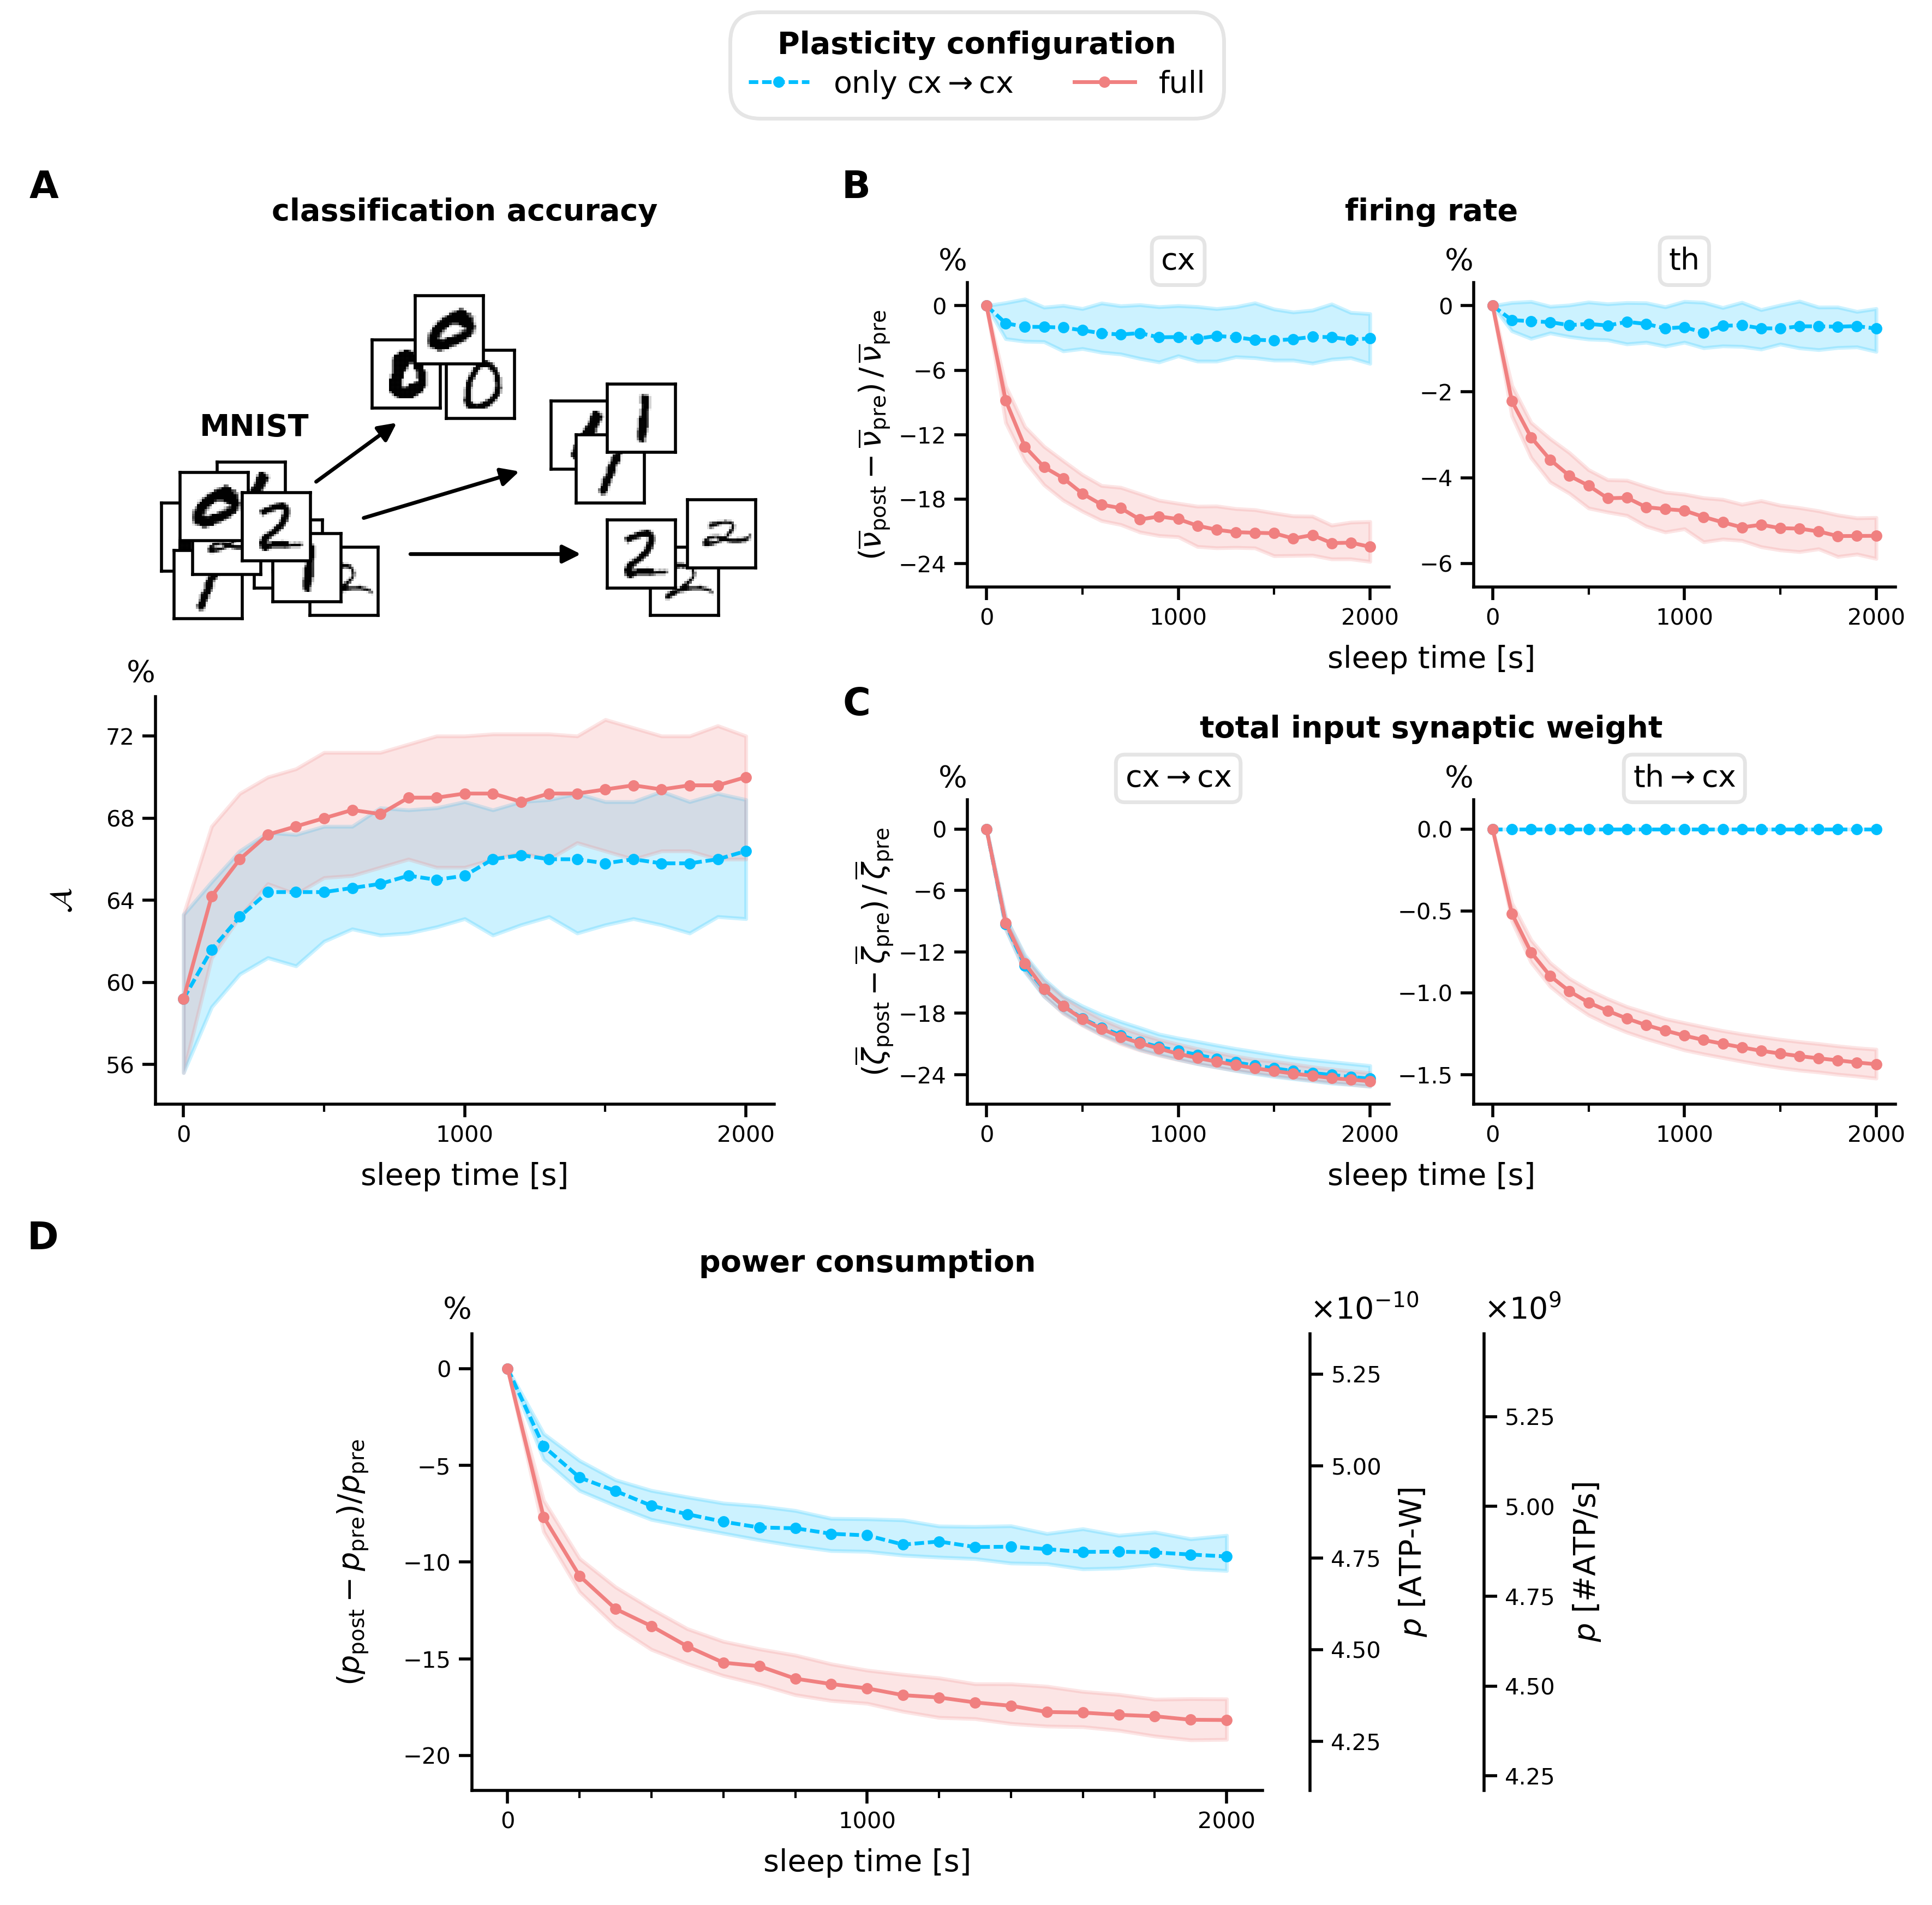

In [168]:
# Figure 3

draft = False
dataset = 'MNIST' # can be ['MNIST', 'CIFAR']
error_bar = 'iqr' # can be ['sem', 'std', 'iqr']

if dataset=='MNIST':
    configs = MNIST_configurations
elif dataset=='CIFAR':
    configs = CIFAR_configurations

fig_w = mm_to_inch(full_page_fig_width) 
fig_h = mm_to_inch(1.00*full_page_fig_width)
fig_path = os.path.join(save_path, f'fig3_{dataset}_{error_bar}.png')

fig = plt.figure(figsize=(fig_w, fig_h), dpi=dpi)

# gs = gridspec.GridSpec(2, 3, figure=fig, left=0.08, right=0.97, bottom=0.08, top=0.89, hspace=hspace2, wspace=wspace2)
# ax_00 = fig.add_subplot(gs[0, 0])
# ax_10 = fig.add_subplot(gs[1, 0])
# ax_01 = fig.add_subplot(gs[0, 1])
# ax_11 = fig.add_subplot(gs[1, 1])
# ax_02 = fig.add_subplot(gs[0, 2])
# ax_12 = fig.add_subplot(gs[1, 2])
# axes2 = [ax_00, ax_10, ax_01, ax_11, ax_02, ax_12]

# Main plot split into first block (accuracy, firing rate, ingoing synapses) and second block (power consumption)
gs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig, left=0.075, right=0.975, bottom=0.070, top=0.850,
                       height_ratios=[1.80,1], hspace=0.36)

# First block (accuracy, firing rate, ingoing synapses) split into 2 cols (accuracy, other curves)
subgs_0 = gs[0].subgridspec(nrows=1, ncols=2, width_ratios=[1,1.5], hspace=0, wspace=0.25)

# Second block (power consumption) split into 3 cols (space, curves, space)
subgs_1 = gs[1].subgridspec(nrows=1, ncols=3, width_ratios=[0.20,0.50,0.40], wspace=0)

# 'Accuracy' block split into 2 rows (mnist sketch, accuracy curves)
subgs_00 = subgs_0[0].subgridspec(nrows=2, ncols=1, height_ratios=[1,1.2], hspace=0.20)

# 'Other curves' block split into 2 rows (firing rate, ingoing synapses)
subgs_01 = subgs_0[1].subgridspec(nrows=2, ncols=1, hspace=0.70)

# 'Firing rate' and 'Ingoing synapses' blocks split into 2 cols (cortex, thalamus)
subgs_010 = subgs_01[0].subgridspec(nrows=1, ncols=2, wspace=0.20)
subgs_011 = subgs_01[1].subgridspec(nrows=1, ncols=2, wspace=0.20)

# Accuracy panels
ax_00 = fig.add_subplot(subgs_00[0])
ax_10 = fig.add_subplot(subgs_00[1])

# Firing rate panels
ax_01 = fig.add_subplot(subgs_010[0])
ax_02 = fig.add_subplot(subgs_010[1])

# Ingoing synapses panels
ax_11 = fig.add_subplot(subgs_011[0])
ax_12 = fig.add_subplot(subgs_011[1])

# Power consumption
ax_20 = fig.add_subplot(subgs_1[0])
ax_21 = fig.add_subplot(subgs_1[1])
ax_22 = fig.add_subplot(subgs_1[2])

axes2 = [ax_10, ax_01, ax_11, ax_02, ax_12, ax_21]

x = np.arange(0, n_stages, dtype=int)
xticks = x[::5] # Sampling every 5 nrem stages
xlabels = xticks * t_nrem_s # Moving from stage id to time in s

for ax in axes2:
    ax.spines['top'].set_visible(False) # has to become False
    ax.spines['right'].set_visible(False) # has to become False
    ax.tick_params(axis='both', labelsize=fontsize_ticks, pad=2)
    ax.set_xlim([xticks[0]-1,xticks[-1]+1])
    ax.set_xticks(xticks, xlabels)
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.xaxis.set_major_locator(MultipleLocator(10))

for ax in [ax_00, ax_01, ax_02]:
    ax.tick_params(axis='x', labelbottom=True)
    #ax.text(0.5, -0.13, 'sleep time [s]', ha="center", va="top", transform=ax.transAxes, fontsize=fontsize_labels)
for ax in [ax_10, ax_11, ax_12]:
    ax.tick_params(axis='x', labelbottom=True)

val = 100
curve_lw = 1
ms = 4

# Accuracy sketch
ax = ax_00
ax.set_xlim([0,1])
ax.set_ylim([0,1])
if draft:
    ax.tick_params(axis='both', which='both', bottom=True, labelbottom=True, left=True, labelleft=True, labelsize=fontsize_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.grid(True)
else:
    ax.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False, labelsize=fontsize_ticks)
    for _ in ['top','bottom','left','right']:
        ax.spines[_].set_visible(False)
W = ax.get_position().x1-ax.get_position().x0
H = ax.get_position().y1-ax.get_position().y0
if dataset=='MNIST':
    zeros = mnist_train_digits[np.where(mnist_train_labels==0)[0][0:3]]
    ones = mnist_train_digits[np.where(mnist_train_labels==1)[0][0:3]]
    twos = mnist_train_digits[np.where(mnist_train_labels==2)[0][0:3]]
elif dataset=='CIFAR':
    zeros = cifar_train_images[np.where(cifar_train_labels==0)[0][0:3]]
    ones = cifar_train_images[np.where(cifar_train_labels==1)[0][0:3]]
    twos = cifar_train_images[np.where(cifar_train_labels==2)[0][0:3]]
for i in range(9):
    #ha = (0.05 + np.random.rand()*0.30)*H/W
    #va = 0.05 + np.random.rand()*0.30
    ha = [0.01, 0.10, 0.25, 0.16, 0.03, 0.06, 0.04, 0.19, 0.14][i]
    va = [0.15, 0.27, 0.02, 0.10, 0.01, 0.14, 0.24, 0.06, 0.18][i]
    axins = inset_axes(ax, width=0.25, height=0.25, loc='lower left', bbox_to_anchor=(ha, va), bbox_transform=ax.transAxes, borderpad=0)
    #axins.imshow(mnist_digits[i%3][int(i/3)], origin="upper", cmap='Greys')
    axins.imshow([zeros,ones,twos][i%3][int(i/3)], origin="upper", cmap='Greys')
    axins.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
for i in range(3):
    #ha = 0.50 + np.random.rand()*0.10*H/W
    #va = 0.50 + np.random.rand()*0.20
    ha = [0.35, 0.47, 0.42][i]
    va = [0.63, 0.60, 0.76][i]
    axins = inset_axes(ax, width=0.25, height=0.25, loc='lower left', bbox_to_anchor=(ha, va), bbox_transform=ax.transAxes, borderpad=0)
    #axins.imshow(mnist_digits[0][i], origin="upper", cmap='Greys')
    axins.imshow(zeros[i], origin="upper", cmap='Greys')
    axins.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    #ha = 0.70 + np.random.rand()*0.10*H/W
    #va = 0.25 + np.random.rand()*0.20
    ha = [0.64, 0.68, 0.73][i]
    va = [0.45, 0.35, 0.50][i]
    axins = inset_axes(ax, width=0.25, height=0.25, loc='lower left', bbox_to_anchor=(ha, va), bbox_transform=ax.transAxes, borderpad=0)
    #axins.imshow(mnist_digits[1][i], origin="upper", cmap='Greys')
    axins.imshow(ones[i], origin="upper", cmap='Greys')
    axins.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    #ha = 0.90 + np.random.rand()*0.10*H/W
    #va = 0.00 + np.random.rand()*0.20
    ha = [0.80, 0.86, 0.73][i]
    va = [0.02, 0.16, 0.10][i]
    axins = inset_axes(ax, width=0.25, height=0.25, loc='lower left', bbox_to_anchor=(ha, va), bbox_transform=ax.transAxes, borderpad=0)
    #axins.imshow(mnist_digits[2][i], origin="upper", cmap='Greys')
    axins.imshow(twos[i], origin="upper", cmap='Greys')
    axins.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
ax.annotate('', xy=(0.400, 0.600), xytext=(0.250, 0.400), arrowprops=dict(arrowstyle='-|>', facecolor='black'))
ax.annotate('', xy=(0.600, 0.450), xytext=(0.325, 0.300), arrowprops=dict(arrowstyle='-|>', facecolor='black'))
ax.annotate('', xy=(0.700, 0.200), xytext=(0.400, 0.200), arrowprops=dict(arrowstyle='-|>', facecolor='black'))
ax.text(0.16, 0.53, dataset, ha="center", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels, fontweight='bold')

# Accuracy curves
ax = ax_10
for conf_id, conf in enumerate(configs.keys()):
    print(f'config = {conf}')
    metric = 'accuracy'
    if error_bar in ['std', 'sem']:
        y = trials_data[conf][metric+'_mean']['cx']
        y_d = y - trials_data[conf][metric+'_'+error_bar]['cx']
        y_u = y + trials_data[conf][metric+'_'+error_bar]['cx']
        if dataset=='MNIST':
            yticks = [58,70]
            ax.yaxis.set_major_locator(MultipleLocator(2))
        elif dataset=='CIFAR':
            yticks = [60,66]
            ax.yaxis.set_major_locator(MultipleLocator(2))
    elif error_bar in ['iqr']:
        y = trials_data[conf][metric+'_median']['cx']
        y_d = trials_data[conf][metric+'_q1']['cx']
        y_u = trials_data[conf][metric+'_q3']['cx']
        ax.yaxis.set_major_locator(MultipleLocator(4))
        if dataset=='MNIST':
            yticks = [56,72]
            ax.yaxis.set_major_locator(MultipleLocator(4))
        elif dataset=='CIFAR':
            yticks = [58,70]
            ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.plot(x, y, ls=all_configurations[conf]['linestyle'], color=all_configurations[conf]['color'], linewidth=curve_lw, marker='.', markersize=ms, label=f"{all_configurations[conf]['label']}")
    ax.fill_between(x, y_d, y_u, color=all_configurations[conf]['color'], alpha=0.2)
ax.text(-0.15, 0.50, r'$\mathcal{A}$',
        rotation=90, ha="center", va="center", transform=ax.transAxes, fontsize=fontsize_labels)
ax.text(0.00, 1.02, '%',
        ha="right", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels)
ax.set_xticks(xticks, xlabels)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.set_ylim(yticks[0]-y_w*(yticks[-1]-yticks[0]), yticks[-1]+y_w*(yticks[-1]-yticks[0]))
hh, ll = ax.get_legend_handles_labels()
ll[0] = r'only cx$\to$cx'
leg = fig.legend(
    handles=hh,
    labels=ll,
    title="Plasticity configuration",
    facecolor="None",
    edgecolor="black",
    framealpha=0.1,
    fontsize=fontsize_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.99),
    borderpad=0.1,
    labelspacing=0.3,
    handlelength=2.0,
    ncols=2,
    columnspacing=2,  # default value: 2
    title_fontproperties = {'weight':'bold', 'size': fontsize_labels}
)
leg.get_frame().set_boxstyle('Round', pad=0.5, rounding_size=1)

# Cortical Firing rate
ax = ax_01
for conf_id, conf in enumerate(configs.keys()):
    metric = 'firing_rate'
    if error_bar in ['std', 'sem']:
        y = trials_changes[conf][metric+'_mean']['cx']
        y_d = y - trials_changes[conf][metric+'_'+error_bar]['cx']
        y_u = y + trials_changes[conf][metric+'_'+error_bar]['cx']
    elif error_bar in ['iqr']:
        y = trials_changes[conf][metric+'_median']['cx']
        y_d = trials_changes[conf][metric+'_q1']['cx']
        y_u = trials_changes[conf][metric+'_q3']['cx']
    ax.plot(x, val*y, ls=all_configurations[conf]['linestyle'], color=all_configurations[conf]['color'], linewidth=curve_lw, marker='.', markersize=ms)
    ax.fill_between(x, val*y_d, val*y_u, color=all_configurations[conf]['color'], alpha=0.2)
if dataset=='MNIST':
    yticks = [-24, -18, -12, -6, 0]
    y_w = 0.090
elif dataset=='CIFAR':
    yticks = [-20, -15, -10, -5, 0]
    y_w = 0.110
ax.set_ylim(yticks[0]-y_w*(yticks[-1]-yticks[0]), yticks[-1]+y_w*(yticks[-1]-yticks[0]))
ax.set_yticks(yticks)
ax.text(-0.22, 0.50,
        r'$(\overline{\nu}_{\mathrm{post}} - \overline{\nu}_{\mathrm{pre}}) \, / \, \overline{\nu}_{\mathrm{pre}}$',
        rotation=90, ha="center", va="center", transform=ax.transAxes, fontsize=fontsize_labels)
ax.text(0.00, 1.02, '%',
        ha="right", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels)

# Thalamic Firing rate
ax = ax_02
for conf_id, conf in enumerate(configs.keys()):
    metric = 'firing_rate'
    if error_bar in ['std', 'sem']:
        y = val*trials_changes[conf][metric+'_mean']['th']
        y_d = y - val*trials_changes[conf][metric+'_'+error_bar]['th']
        y_u = y + val*trials_changes[conf][metric+'_'+error_bar]['th']
    elif error_bar in ['iqr']:
        y = val*trials_changes[conf][metric+'_median']['th']
        y_d = val*trials_changes[conf][metric+'_q1']['th']
        y_u = val*trials_changes[conf][metric+'_q3']['th']
    ax.plot(x, y, ls=all_configurations[conf]['linestyle'], color=all_configurations[conf]['color'], linewidth=curve_lw, marker='.', markersize=ms)
    ax.fill_between(x, y_d, y_u, color=all_configurations[conf]['color'], alpha=0.2)
ax.set_ylim(-6.5, 0.5)
if dataset=='MNIST':
    yticks = [-6, -4, -2, 0]
    y_w = 0.090
elif dataset=='CIFAR':
    yticks = [-4, -3, -2, -1, 0]
    y_w = 0.170
ax.set_yticks(yticks)
ax.set_ylim(yticks[0]-y_w*(yticks[-1]-yticks[0]), yticks[-1]+y_w*(yticks[-1]-yticks[0]))
ax.text(0.00, 1.02, '%',
        ha="right", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels)

# Cortical Incoming Synapses
ax = ax_11
for conf_id, conf in enumerate(configs.keys()):
    metric = 'incoming_synapses_from_cx'
    if error_bar in ['std', 'sem']:
        y = trials_changes[conf][metric+'_mean']['cx']
        y_d = y - trials_changes[conf][metric+'_'+error_bar]['cx']
        y_u = y + trials_changes[conf][metric+'_'+error_bar]['cx']
    elif error_bar in ['iqr']:
        y = trials_changes[conf][metric+'_median']['cx']
        y_d = trials_changes[conf][metric+'_q1']['cx']
        y_u = trials_changes[conf][metric+'_q3']['cx']
    ax.plot(x, val*y, ls=all_configurations[conf]['linestyle'], color=all_configurations[conf]['color'], linewidth=curve_lw, marker='.', markersize=ms)
    ax.fill_between(x, val*y_d, val*y_u, color=all_configurations[conf]['color'], alpha=0.2)
if dataset=='MNIST':
    yticks = [-24, -18, -12, -6, 0]
    y_w = 0.120
elif dataset=='CIFAR':
    yticks = [-24, -18, -12, -6, 0]
    y_w = 0.150
ax.set_yticks(yticks)
ax.set_ylim(yticks[0]-y_w*(yticks[-1]-yticks[0]), yticks[-1]+y_w*(yticks[-1]-yticks[0]))
ax.text(-0.22, 0.50,
        r'$(\overline{\zeta}_{\mathrm{post}} - \overline{\zeta}_{\mathrm{pre}}) \, / \, \overline{\zeta}_{\mathrm{pre}}$',
        rotation=90, ha="center", va="center", transform=ax.transAxes, fontsize=fontsize_labels)
ax.text(0.00, 1.02, '%',
        ha="right", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels)

# Thalamic Incoming Synapses
ax = ax_12
for conf_id, conf in enumerate(configs.keys()):
    metric = 'incoming_synapses_from_th'
    if error_bar in ['std', 'sem']:
        y = trials_changes[conf][metric+'_mean']['cx']
        y_d = y - trials_changes[conf][metric+'_'+error_bar]['cx']
        y_u = y + trials_changes[conf][metric+'_'+error_bar]['cx']
    elif error_bar in ['iqr']:
        y = trials_changes[conf][metric+'_median']['cx']
        y_d = trials_changes[conf][metric+'_q1']['cx']
        y_u = trials_changes[conf][metric+'_q3']['cx']
    ax.plot(x, val*y, ls=all_configurations[conf]['linestyle'], color=all_configurations[conf]['color'], linewidth=curve_lw, marker='.', markersize=ms)
    ax.fill_between(x, val*y_d, val*y_u, color=all_configurations[conf]['color'], alpha=0.2)
if dataset=='MNIST':
    yticks = [-1.5, -1.0, -0.5, 0]
    y_w = 0.120
elif dataset=='CIFAR':
    yticks = [-1.5, -1.0, -0.5, 0]
    y_w = 0.170
ax.set_yticks(yticks)
ax.set_ylim(yticks[0]-y_w*(yticks[-1]-yticks[0]), yticks[-1]+y_w*(yticks[-1]-yticks[0]))
ax.text(0.00, 1.02, '%',
        ha="right", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels)

# Power Consumption Curves
for ax in [ax_20,ax_22]:
    ax.patch.set_alpha(0)
    ax.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False, labelsize=fontsize_ticks)
    for _ in ['top','bottom','left','right']:
        ax.spines[_].set_visible(False)
ax = ax_21
for conf_id, conf in enumerate(configs.keys()):
    metric = 'power'
    if error_bar in ['std', 'sem']:
        y = trials_changes[conf][metric+'_mean']['cx']
        y_d = y - trials_changes[conf][metric+'_'+error_bar]['cx']
        y_u = y + trials_changes[conf][metric+'_'+error_bar]['cx']
    elif error_bar in ['iqr']:
        y = trials_changes[conf][metric+'_median']['cx']
        y_d = trials_changes[conf][metric+'_q1']['cx']
        y_u = trials_changes[conf][metric+'_q3']['cx']
    ax.plot(x, val*y, ls=all_configurations[conf]['linestyle'], color=all_configurations[conf]['color'], linewidth=curve_lw, marker='.', markersize=ms)
    ax.fill_between(x, val*y_d, val*y_u, color=all_configurations[conf]['color'], alpha=0.2)
ax.xaxis.set_minor_locator(MultipleLocator(2))
if dataset=='MNIST':
    yticks = [-20, -15, -10, -5, 0]
    y_w = 0.090
elif dataset=='CIFAR':
    yticks = [-16, -12, -8, -4, 0]
    y_w = 0.120
ax.set_yticks(yticks)
ax.set_ylim(yticks[0]-y_w*(yticks[-1]-yticks[0]), yticks[-1]+y_w*(yticks[-1]-yticks[0]))
ax.text(-0.15, 0.50, r'$(p_{\mathrm{post}} - p_{\mathrm{pre}}) / p_{\mathrm{pre}}$', # multialignment='left'
        rotation=90, ha="center", va="center", transform=ax.transAxes, fontsize=fontsize_labels)
ax.text(0.00, 1.02, '%',
        ha="right", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels)

def absoluteW_to_relative(x):
    x0 = trials_data[dataset+'_full']['power_median']['cx'][0]
    y = 100*(x-x0)/x0
    return y
def relative_to_absoluteW(x):
    x0 = trials_data[dataset+'_full']['power_median']['cx'][0]
    x0 *= 1e10 # exponent is handled separately
    y = x/100*x0+x0
    return y
ax_y2 = ax.secondary_yaxis(1.06, functions=(relative_to_absoluteW, absoluteW_to_relative))
ax_y2.tick_params(labelsize=fontsize_ticks, pad=2)
if dataset=='MNIST':
    ax_y2.set_yticks(np.arange(3,6,0.25))
elif dataset=='CIFAR':
    ax_y2.set_yticks(np.arange(3,6,0.20))
ax.text(1.19, 0.50, r'$p$ [ATP-W]',
        rotation=90, ha="center", va="center", transform=ax.transAxes, fontsize=fontsize_labels)
ax.text(1.06, 1.02, r'$\times 10^{-10}$',
        ha="left", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels)

def absoluteATP_to_relative(x):
    x0 = trials_data[dataset+'_full']['power_median']['cx'][0]
    y = 100*((x*9.78e-20)-x0)/x0
    return y
def relative_to_absoluteATP(x):
    x0 = trials_data[dataset+'_full']['power_median']['cx'][0]
    y = (x/100*x0+x0)/(9.78e-20)
    y *= 1e-9 # exponent is handled separately
    return y
ax_y3 = ax.secondary_yaxis(1.28, functions=(relative_to_absoluteATP, absoluteATP_to_relative))
ax_y3.tick_params(labelsize=fontsize_ticks, pad=2)
if dataset=='MNIST':
    ax_y3.set_yticks(np.arange(3,6,0.25))
elif dataset=='CIFAR':
    ax_y3.set_yticks(np.arange(3,6,0.20))
ax.text(1.41, 0.50, r'$p$ [#ATP/s]',
        rotation=90, ha="center", va="center", transform=ax.transAxes, fontsize=fontsize_labels)
ax.text(1.28, 1.02, r'$\times 10^{9}$',
        ha="left", va="bottom", transform=ax.transAxes, fontsize=fontsize_labels)

# Panel letters
x_label_offset = 0.050
y_label_offset = 0.040
fig.text(ax_00.get_position().x0 - x_label_offset, ax_00.get_position().y1 + y_label_offset, 'A',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(ax_01.get_position().x0 - x_label_offset, ax_01.get_position().y1 + y_label_offset, 'B',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(ax_11.get_position().x0 - x_label_offset, ax_11.get_position().y1 + y_label_offset, 'C',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(ax_00.get_position().x0 - x_label_offset, ax_21.get_position().y1 + y_label_offset, 'D',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')

# Further labels
y_label_offset = 0.029
fig.text(0.5 * (ax_00.get_position().x0 + ax_00.get_position().x1), ax_00.get_position().y1 + y_label_offset,
         "classification accuracy", ha='center', va='bottom', fontsize=fontsize_title, fontweight='bold')
fig.text(0.5 * (ax_01.get_position().x0 + ax_02.get_position().x1), ax_02.get_position().y1 + y_label_offset,
         "firing rate", ha='center', va='bottom', fontsize=fontsize_title, fontweight='bold')
fig.text(0.5 * (ax_11.get_position().x0 + ax_12.get_position().x1), ax_12.get_position().y1 + y_label_offset,
         "total input synaptic weight", ha='center', va='bottom', fontsize=fontsize_title, fontweight='bold')
fig.text(0.5 * (ax_21.get_position().x0 + ax_21.get_position().x1), ax_21.get_position().y1 + y_label_offset,
         "power consumption", ha='center', va='bottom', fontsize=fontsize_title, fontweight='bold')
fig.text(0.50, 1.07, 'cx',
         ha="center", va="center", transform=ax_01.transAxes, fontsize=fontsize_labels,
         bbox=dict(boxstyle='round', facecolor='None', edgecolor='black', alpha=0.1))
fig.text(0.50, 1.07, 'th',
         ha="center", va="center", transform=ax_02.transAxes, fontsize=fontsize_labels,
         bbox=dict(boxstyle='round', facecolor='None', edgecolor='black', alpha=0.1))
fig.text(0.50, 1.07, r'cx$\to$cx',
         ha="center", va="center", transform=ax_11.transAxes, fontsize=fontsize_labels,
         bbox=dict(boxstyle='round', facecolor='None', edgecolor='black', alpha=0.1))
fig.text(0.50, 1.07, r'th$\to$cx',
         ha="center", va="center", transform=ax_12.transAxes, fontsize=fontsize_labels,
         bbox=dict(boxstyle='round', facecolor='None', edgecolor='black', alpha=0.1))
fig.text(0.5 * (ax_10.get_position().x0 + ax_10.get_position().x1), ax_10.get_position().y0 - 0.030,
         "sleep time [s]", ha="center", va="top", fontsize=fontsize_labels)
fig.text(0.5 * (ax_01.get_position().x1 + ax_02.get_position().x0), ax_01.get_position().y0 - 0.030,
         "sleep time [s]", ha="center", va="top", fontsize=fontsize_labels)
fig.text(0.5 * (ax_11.get_position().x1 + ax_12.get_position().x0), ax_11.get_position().y0 - 0.030,
         "sleep time [s]", ha="center", va="top", fontsize=fontsize_labels)
fig.text(0.5 * (ax_21.get_position().x1 + ax_21.get_position().x0), ax_21.get_position().y0 - 0.030,
         "sleep time [s]", ha="center", va="top", fontsize=fontsize_labels)

# fig.tight_layout()#pad=0.05, w_pad=0.5, h_pad=2.0)
# fig.subplots_adjust(top=0.95, bottom=0.08, left=0.07, right=0.98)
fig.savefig(fig_path, facecolor='white', dpi=dpi) # bbox_inches='tight', pad_inches=0
plt.show()

### Figure 4

In [172]:
# Data processing for Figure 4

# Panels A

singletrials_w_matrix_pre = {}
singletrials_w_matrix_post = {}
average_w_matrix_pre = {}
average_w_matrix_post = {}
average_w_matrix_ratio = {}
for conf_id, conf in enumerate(all_configurations.keys()):
    if (stages_id[0] in w_cx_cx_matrix[conf]['data']['matrices'].keys()):
        singletrials_w_matrix_pre[conf] = w_cx_cx_matrix[conf]['data']['matrices'][stages_id[0]]
        singletrials_w_matrix_post[conf] = w_cx_cx_matrix[conf]['data']['matrices'][stages_id[-1]]
        average_w_matrix_pre[conf] = w_cx_cx_matrix[conf]['mean'][stages_id[0]]
        average_w_matrix_post[conf] = w_cx_cx_matrix[conf]['mean'][stages_id[-1]]
        # average_w_matrix_ratio[conf] = average_w_matrix_post[conf] / average_w_matrix_pre[conf]
        average_w_matrix_ratio[conf] = w_cx_cx_matrix[conf]['ratio'][stages_id[-1]]

# Here data are arranged into shape (n_trials, n_stages)

for conf_id, conf in enumerate(all_configurations.keys()):
    
    print(' - conf:', conf)
    trials_data[conf]['synapses'] = {cath: {} for cath in ['group', 'class', 'nonspecific']}
    
    # Group synapses
    trials_data[conf]['synapses']['group']['cx_cx'] = np.transpose(np.array([w_cx_cx_categories[conf]['mean']['group'][stage] for stage in stages_id]))
    trials_data[conf]['synapses']['group']['cx_th'] = np.transpose(np.array([w_cx_th_categories[conf]['mean']['group'][stage] for stage in stages_id]))
    trials_data[conf]['synapses']['group']['th_cx'] = np.transpose(np.array([w_th_cx_categories[conf]['mean']['group'][stage] for stage in stages_id]))
    print('synapses_group_cx_cx:', np.shape(trials_data[conf]['synapses']['group']['cx_cx']))
    print('synapses_group_cx_th:', np.shape(trials_data[conf]['synapses']['group']['cx_th']))
    print('synapses_group_th_cx:', np.shape(trials_data[conf]['synapses']['group']['th_cx']))
    
    # Class synapses
    trials_data[conf]['synapses']['class']['cx_cx'] = np.transpose(np.array([w_cx_cx_categories[conf]['mean']['class'][stage] for stage in stages_id]))
    trials_data[conf]['synapses']['class']['cx_th'] = np.transpose(np.array([w_cx_th_categories[conf]['mean']['class'][stage] for stage in stages_id]))
    trials_data[conf]['synapses']['class']['th_cx'] = np.transpose(np.array([w_th_cx_categories[conf]['mean']['class'][stage] for stage in stages_id]))
    print('synapses_class_cx_cx:', np.shape(trials_data[conf]['synapses']['class']['cx_cx']))
    print('synapses_class_cx_th:', np.shape(trials_data[conf]['synapses']['class']['cx_th']))
    print('synapses_class_th_cx:', np.shape(trials_data[conf]['synapses']['class']['th_cx']))
    
    # Non-specific synapses
    trials_data[conf]['synapses']['nonspecific']['cx_cx'] = np.transpose(np.array([w_cx_cx_categories[conf]['mean']['non-specific'][stage] for stage in stages_id]))
    trials_data[conf]['synapses']['nonspecific']['cx_th'] = np.transpose(np.array([w_cx_th_categories[conf]['mean']['non-specific'][stage] for stage in stages_id]))
    trials_data[conf]['synapses']['nonspecific']['th_cx'] = np.transpose(np.array([w_th_cx_categories[conf]['mean']['non-specific'][stage] for stage in stages_id]))
    print('synapses_nonspecific_cx_cx:', np.shape(trials_data[conf]['synapses']['nonspecific']['cx_cx']))
    print('synapses_nonspecific_cx_th:', np.shape(trials_data[conf]['synapses']['nonspecific']['cx_th']))
    print('synapses_nonspecific_th_cx:', np.shape(trials_data[conf]['synapses']['nonspecific']['th_cx']))
    
    print()

# Here relative changes during sleep are computed

for conf_id, conf in enumerate(all_configurations.keys()):
    trials_changes[conf]['synapses'] = {cath: {} for cath in ['group', 'class', 'nonspecific']}
    for cath in ['group', 'class', 'nonspecific']:
        for layer in ['cx_cx', 'cx_th', 'th_cx']:
            trials_changes[conf]['synapses'][cath][layer] = np.array([v/v[0] for v in trials_data[conf]['synapses'][cath][layer]])

# Here trial stats are computed
for conf_id, conf in enumerate(all_configurations.keys()):
    for cath in ['group', 'class', 'nonspecific']:
        for layer in ['cx_cx', 'cx_th', 'th_cx']:
            trials_data[conf]['synapses'][cath][layer+'_mean'] = np.mean(trials_data[conf]['synapses'][cath][layer], axis=0)
            trials_data[conf]['synapses'][cath][layer+'_median'] = np.median(trials_data[conf]['synapses'][cath][layer], axis=0)
            trials_data[conf]['synapses'][cath][layer+'_std'] = np.std(trials_data[conf]['synapses'][cath][layer], axis=0)
            trials_data[conf]['synapses'][cath][layer+'_sem'] = trials_data[conf]['synapses'][cath][layer+'_std'] / np.sqrt(n_trials-1)
            trials_data[conf]['synapses'][cath][layer+'_q1'] = np.percentile(trials_data[conf]['synapses'][cath][layer], 25, axis=0)
            trials_data[conf]['synapses'][cath][layer+'_q3'] = np.percentile(trials_data[conf]['synapses'][cath][layer], 75, axis=0)
            trials_changes[conf]['synapses'][cath][layer+'_mean'] = np.mean(trials_changes[conf]['synapses'][cath][layer], axis=0)
            trials_changes[conf]['synapses'][cath][layer+'_median'] = np.median(trials_changes[conf]['synapses'][cath][layer], axis=0)
            trials_changes[conf]['synapses'][cath][layer+'_std'] = np.std(trials_changes[conf]['synapses'][cath][layer], axis=0)
            trials_changes[conf]['synapses'][cath][layer+'_sem'] = trials_changes[conf]['synapses'][cath][layer+'_std'] / np.sqrt(n_trials-1)
            trials_changes[conf]['synapses'][cath][layer+'_q1'] = np.percentile(trials_changes[conf]['synapses'][cath][layer], 25, axis=0)
            trials_changes[conf]['synapses'][cath][layer+'_q3'] = np.percentile(trials_changes[conf]['synapses'][cath][layer], 75, axis=0)

print('Done.')

 - conf: MNIST_cxcx
synapses_group_cx_cx: (100, 21)
synapses_group_cx_th: (100, 21)
synapses_group_th_cx: (100, 21)
synapses_class_cx_cx: (100, 21)
synapses_class_cx_th: (100, 21)
synapses_class_th_cx: (100, 21)
synapses_nonspecific_cx_cx: (100, 21)
synapses_nonspecific_cx_th: (100, 21)
synapses_nonspecific_th_cx: (100, 21)

 - conf: MNIST_full
synapses_group_cx_cx: (100, 21)
synapses_group_cx_th: (100, 21)
synapses_group_th_cx: (100, 21)
synapses_class_cx_cx: (100, 21)
synapses_class_cx_th: (100, 21)
synapses_class_th_cx: (100, 21)
synapses_nonspecific_cx_cx: (100, 21)
synapses_nonspecific_cx_th: (100, 21)
synapses_nonspecific_th_cx: (100, 21)

 - conf: CIFAR_cxcx
synapses_group_cx_cx: (100, 21)
synapses_group_cx_th: (100, 21)
synapses_group_th_cx: (100, 21)
synapses_class_cx_cx: (100, 21)
synapses_class_cx_th: (100, 21)
synapses_class_th_cx: (100, 21)
synapses_nonspecific_cx_cx: (100, 21)
synapses_nonspecific_cx_th: (100, 21)
synapses_nonspecific_th_cx: (100, 21)

 - conf: CIFAR_full

In [174]:
conf = 'CIFAR_full'
tr = 2
print('Single trials:')
print('- pre:', np.min(singletrials_w_matrix_pre[conf][tr]), np.max(singletrials_w_matrix_pre[conf][tr]))
print('- post:', np.min(singletrials_w_matrix_post[conf][tr]), np.max(singletrials_w_matrix_post[conf][tr]))

print('Averages:')

print('- pre:', np.min(average_w_matrix_pre[conf]), np.max(average_w_matrix_pre[conf]))
print('- post:', np.min(average_w_matrix_post[conf]), np.max(average_w_matrix_post[conf]))
print('- ratio:', np.min(average_w_matrix_ratio[conf]), np.max(average_w_matrix_ratio[conf]))

print()
print('- pre:', np.log(np.min(singletrials_w_matrix_pre[conf][tr])), np.log(np.max(singletrials_w_matrix_pre[conf][tr])))

Single trials:
- pre: 0.001005905212802278 105.67211762252946
- post: 0.0010059052128026235 87.13206626342553
Averages:
- pre: 0.37021896055174286 86.5807158310262
- post: 0.37035588173753003 58.70805680747747
- ratio: 0.6773699268020391 51.00213324926118

- pre: -6.901867433610271 4.660341070211728


In [175]:
# Color maps

terrain_cmap = plt.get_cmap('terrain')

# Campionamento di punti chiave dalla terrain originale
# Questi valori sono scelti per prendere approssimativamente i colori di riferimento
gray   = terrain_cmap(0.99)  # Grigio
green  = terrain_cmap(0.3)  # Verde
yellow = terrain_cmap(0.55)  # Giallo
brown  = terrain_cmap(0.70)  # Marrone
blue   = terrain_cmap(0.1)  # Blu

# Nuovo ordine: grigio → verde → giallo → marrone → blu
new_colors = [green, brown, gray, yellow , blue]

# Creazione nuova colormap
n_samples = 256
orig_vals = np.linspace(0, 1, len(new_colors))
custom_cmap = LinearSegmentedColormap.from_list(
    "terrain_reordered",
    list(zip(orig_vals, new_colors)),
    N=n_samples
)

cmap_terrain = plt.get_cmap('terrain')

In [191]:
w_cx_cx_matrix['CIFAR_full']['data']['indices'][tr]['training']['index mnist']

array([ 9401, 12328, 33058, 28790, 25926, 25388,  2737, 37972, 46000,
       27556,  1856, 47219,  5908,  1315, 41897, 14405, 19635, 45482,
        5355, 15211,  8651, 30760, 10158,  8642, 21123, 22023, 11158,
       42994, 11555, 13070])

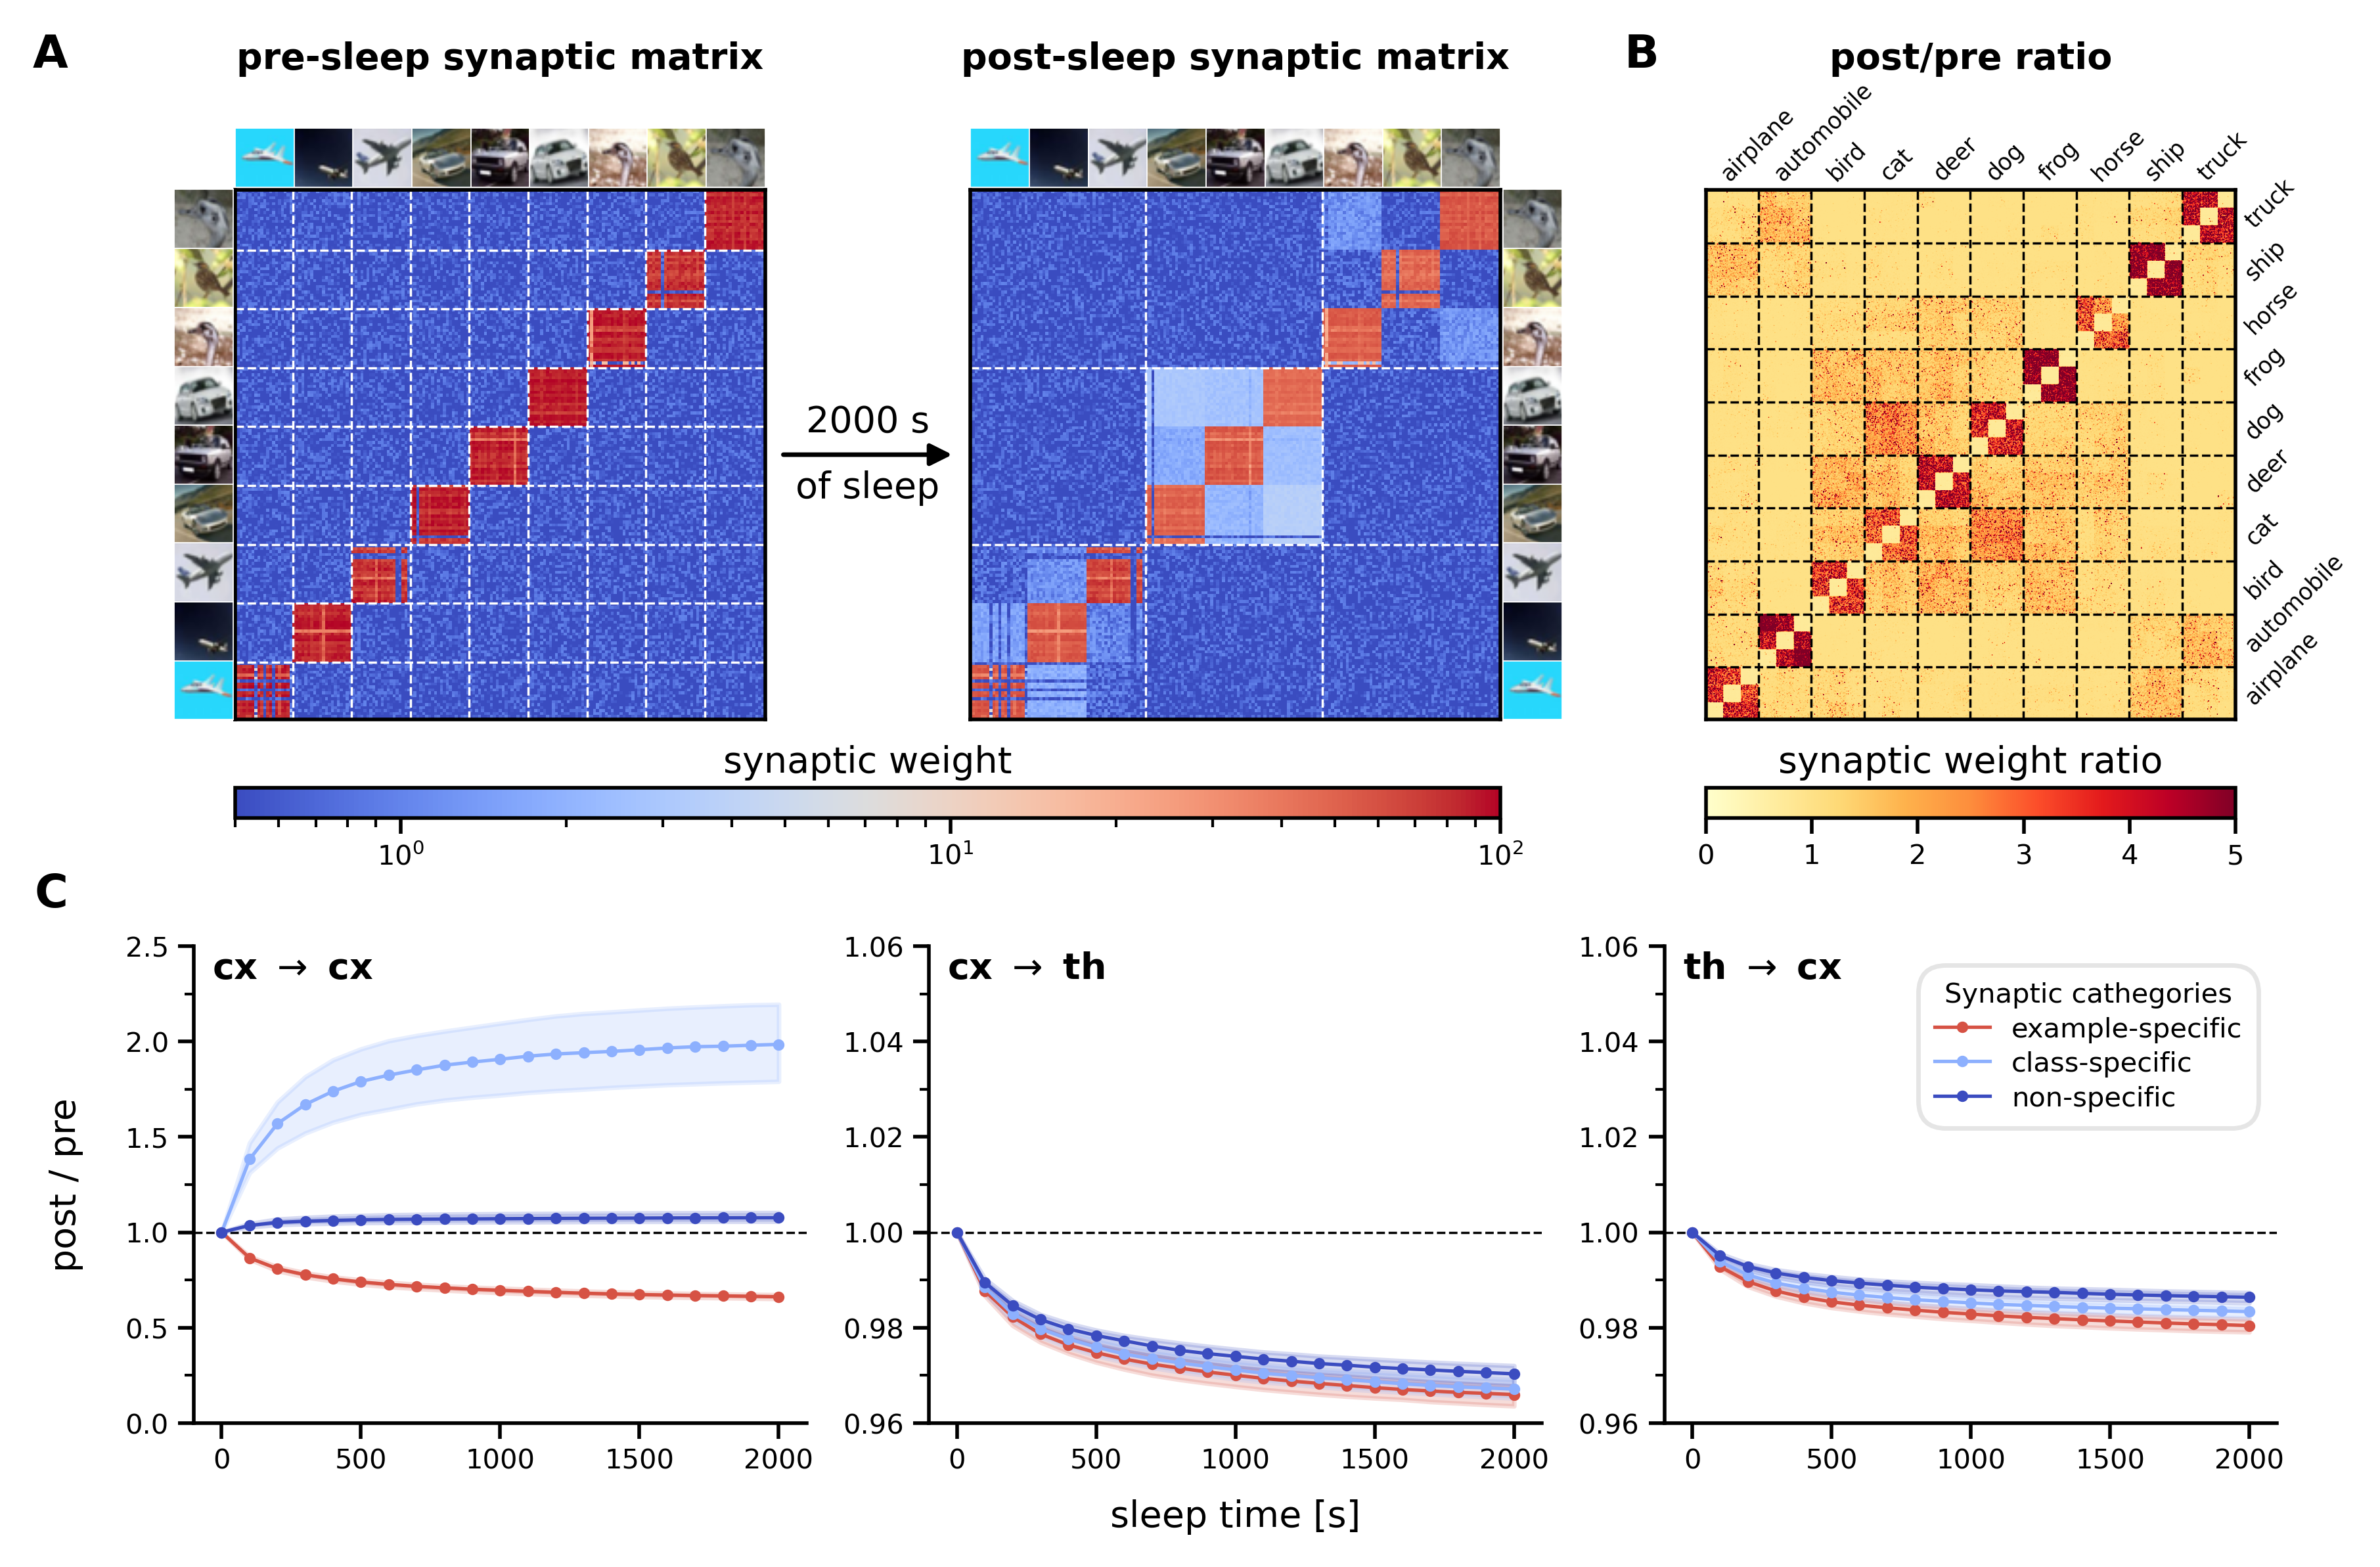

In [235]:
# Figure 4

dataset = 'CIFAR'
if dataset=='MNIST':
    conf = 'MNIST_full'
    # winner trial [8/10]: 6
    # good trials [7/10]: [2, 8, 17]
    # medium trials [6/10]: [10, 14, 15, 18]
    tr = 6
elif dataset=='CIFAR':
    conf = 'CIFAR_full'
    tr = 2
    # Good: 1
error_bar = 'iqr' # can be ['sem', 'std', 'iqr']

fig_w = mm_to_inch(full_page_fig_width) 
fig_h = mm_to_inch(0.65*full_page_fig_width)
fig_path = os.path.join(save_path, f'fig4_{dataset}_{error_bar}.png')

fig = plt.figure(figsize=(fig_w, fig_h), dpi=dpi)

# Main plot split into first row (synaptic matrices) and second row (synaptic cathegories)
gs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig, left=0.070, right=0.965, bottom=0.075, top=0.890,
                       height_ratios=[1, 0.9], hspace=0.45)

# First row (synaptic matrices) split into 2 columns (pre, post, and ratio)
subgs_0 = gs[0].subgridspec(nrows=1, ncols=3, wspace=0.20)

# Second row (synaptic cathegories) split into 3 columns (for the 3 kinds of connections)
subgs_1 = gs[1].subgridspec(nrows=1, ncols=3, wspace=0.20)

# Assigning subplots to axes

# Synaptic matrices (pre, post, and ratio)
ax_00 = fig.add_subplot(subgs_0[0])
ax_01 = fig.add_subplot(subgs_0[1])
ax_02 = fig.add_subplot(subgs_0[2])

# Synaptic changes (cx-cx, cx-th, and th-cx)
ax_10 = fig.add_subplot(subgs_1[0])
ax_11 = fig.add_subplot(subgs_1[1])
ax_12 = fig.add_subplot(subgs_1[2])

axes = [ax_00, ax_01, ax_02,
        ax_10, ax_11, ax_12]

x = np.arange(0, n_stages, dtype=int)
xticks = x[::5] # Sampling every 5 nrem stages
xlabels = xticks * t_nrem_s # Moving from stage id to time in s

val = 1
curve_lw = 0.75
ms = 3

# Panel A - Synaptic matrices

n_neur_cx_subset = 180
digit_interpolation = 'hamming' # ['none', 'hamming']

use_trial_averages_A = False

if use_trial_averages_A:
    m_pre = average_w_matrix_pre[conf]
    m_post = average_w_matrix_post[conf]
    clim_pre = np.min(m_pre), np.max(m_pre)
    clim_pre = 5e-1, 8e1
    cmap_pre = plt.get_cmap('gnuplot_r')
    norm_pre = mcolors.LogNorm(clim_pre[0], clim_pre[1])
else:
    # m_pre = np.log(singletrials_w_matrix_pre[conf][tr])
    # m_post = np.log(singletrials_w_matrix_post[conf][tr])
    # clim_pre = -0.5, 4.5
    # norm_pre = mcolors.Normalize(clim_pre[0], clim_pre[1])
    m_pre = singletrials_w_matrix_pre[conf][tr]
    m_post = singletrials_w_matrix_post[conf][tr]
    clim_pre = 0.5, 100
    norm_pre = mcolors.LogNorm(clim_pre[0], clim_pre[1])
    cmap_pre = plt.get_cmap('coolwarm')

for ax in [ax_00, ax_01, ax_02]:
    ax.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)

# Pre-sleep synaptic matrix
ax = ax_00
ax.set_xlim([0,n_neur_cx_subset])
ax.set_ylim([0,n_neur_cx_subset])
im_00 = ax.imshow(m_pre[0:n_neur_cx_subset,0:n_neur_cx_subset], cmap=cmap_pre, norm=norm_pre, origin='lower')
#im_00 = ax.imshow(m_pre[0:n_neur_cx_subset,0:n_neur_cx_subset], cmap=cmap_pre, vmin=-1, vmax=3, origin='lower')
im_00.set_clim(clim_pre)

for i in range(9):
    ax.axhline(i*20-0.5, linewidth=0.5, ls='--', color='white')
    ax.axvline(i*20-0.5, linewidth=0.5, ls='--', color='white')

examples = []
for i in range(9):
    indexes = w_cx_cx_matrix[conf]['data']['indices'][tr]['training']['index mnist']
    if isinstance(indexes,np.ndarray):
        digit_id = indexes[i]
    elif isinstance(indexes,dict):
        digit_id = indexes[int(i/3)][i%3]
    if dataset=='MNIST':
        examples.append(mnist_train_digits[digit_id])
    elif dataset=='CIFAR':
        examples.append(cifar_train_images[digit_id])

digit_side = 0.180
digits_top = []
digits_left = []
for i in range(9):
    x_anchor = i/9
    y_anchor = 1.005
    digits_top.append(inset_axes(ax, width=digit_side, height=digit_side, loc='lower left', bbox_to_anchor=(x_anchor, y_anchor), bbox_transform=ax.transAxes, borderpad=0))
    digits_top[-1].imshow(examples[i], origin="upper", cmap='Greys', interpolation=digit_interpolation)
    digits_top[-1].tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    x_anchor = -0.005-1/9
    y_anchor = i/9
    digits_left.append(inset_axes(ax, width=digit_side, height=digit_side, loc='lower left', bbox_to_anchor=(x_anchor, y_anchor), bbox_transform=ax.transAxes, borderpad=0))
    digits_left[-1].imshow(examples[i], origin="upper", cmap='Greys', interpolation=digit_interpolation)
    digits_left[-1].tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    for _ in ['top','bottom','left','right']:
        if dataset=='MNIST':
            digits_top[-1].spines[_].set_visible(False)
            digits_left[-1].spines[_].set_visible(False)
        elif dataset=='CIFAR':
            digits_top[-1].spines[_].set_visible(True)
            digits_top[-1].spines[_].set_edgecolor('white')
            digits_top[-1].spines[_].set_linewidth(0.25)
            digits_left[-1].spines[_].set_visible(True)
            digits_left[-1].spines[_].set_edgecolor('white')
            digits_left[-1].spines[_].set_linewidth(0.25)
        

# Post-sleep synaptic matrix

ax = ax_01
ax.set_xlim([0,n_neur_cx_subset])
ax.set_ylim([0,n_neur_cx_subset])
im_01 = ax.imshow(m_post[0:n_neur_cx_subset,0:n_neur_cx_subset], cmap=cmap_pre, norm=norm_pre, origin='lower')
im_01.set_clim(clim_pre)

for i in range(3):
    ax.axhline(i*60-0.5, linewidth=0.5, ls='--', color='white')
    ax.axvline(i*60-0.5, linewidth=0.5, ls='--', color='white')

"""
digit_side = 0.180*3/2
digits_top = []
digits_right = []
for i in range(3):
    x_anchor = (3*i+1)/9 - 1/36
    y_anchor = 1.005
    digits_top.append(inset_axes(ax, width=digit_side, height=digit_side, loc='lower left', bbox_to_anchor=(x_anchor, y_anchor), bbox_transform=ax.transAxes, borderpad=0))
    digits_top[-1].imshow(mnist_digits[i][4], origin="upper", cmap='Greys', interpolation=digit_interpolation)
    digits_top[-1].tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    for _ in ['top','bottom','left','right']:
        digits_top[-1].spines[_].set_visible(False)
    x_anchor = 1.005
    y_anchor = (3*i+1)/9 - 1/36
    digits_right.append(inset_axes(ax, width=digit_side, height=digit_side, loc='lower left', bbox_to_anchor=(x_anchor, y_anchor), bbox_transform=ax.transAxes, borderpad=0))
    digits_right[-1].imshow(mnist_digits[i][4], origin="upper", cmap='Greys', interpolation=digit_interpolation)
    digits_right[-1].tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    for _ in ['top','bottom','left','right']:
        digits_right[-1].spines[_].set_visible(False)
"""
digit_side = 0.180
digits_top = []
digits_right = []
for i in range(9):
    x_anchor = i/9
    y_anchor = 1.005
    digits_top.append(inset_axes(ax, width=digit_side, height=digit_side, loc='lower left', bbox_to_anchor=(x_anchor, y_anchor), bbox_transform=ax.transAxes, borderpad=0))
    digits_top[-1].imshow(examples[i], origin="upper", cmap='Greys', interpolation=digit_interpolation)
    digits_top[-1].tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    x_anchor = 1.005
    y_anchor = i/9
    digits_right.append(inset_axes(ax, width=digit_side, height=digit_side, loc='lower left', bbox_to_anchor=(x_anchor, y_anchor), bbox_transform=ax.transAxes, borderpad=0))
    digits_right[-1].imshow(examples[i], origin="upper", cmap='Greys', interpolation=digit_interpolation)
    digits_right[-1].tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    for _ in ['top','bottom','left','right']:
        if dataset=='MNIST':
            digits_top[-1].spines[_].set_visible(False)
            digits_right[-1].spines[_].set_visible(False)
        elif dataset=='CIFAR':
            digits_top[-1].spines[_].set_visible(True)
            digits_top[-1].spines[_].set_edgecolor('white')
            digits_top[-1].spines[_].set_linewidth(0.25)
            digits_right[-1].spines[_].set_visible(True)
            digits_right[-1].spines[_].set_edgecolor('white')
            digits_right[-1].spines[_].set_linewidth(0.25)


# Ratio of post/pre synaptic matrices

m_ratio = average_w_matrix_ratio[conf]

clim_ratio = np.min(m_ratio), np.max(m_ratio)
norm_ratio = mcolors.Normalize(clim_ratio[0], clim_ratio[1])
cmap_ratio = plt.get_cmap('YlOrRd')

ax = ax_02
ax.set_xlim([0,n_neur_cx])
ax.set_ylim([0,n_neur_cx])
#im_02 = ax.imshow(m_ratio, cmap=cmap_ratio, norm=norm_ratio, origin='lower')
im_02 = ax.imshow(m_ratio, cmap=cmap_ratio, origin='lower')
im_02.set_clim(0, 5)

digit_side = 0.165
digits_top = []
digits_right = []
for i in range(10):
    ax.axhline(i*60-0.5, linewidth=0.5, ls='--', color='black')
    ax.axvline(i*60-0.5, linewidth=0.5, ls='--', color='black')
    x_anchor = i/10
    y_anchor = 1.005
    digits_top.append(inset_axes(ax, width=digit_side, height=digit_side, loc='lower left', bbox_to_anchor=(x_anchor, y_anchor), bbox_transform=ax.transAxes, borderpad=0))
    digits_top[-1].tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    digits_top[-1].patch.set_alpha(0)
    for _ in ['top','bottom','left','right']:
        digits_top[-1].spines[_].set_visible(False)
    x_anchor = 1.005
    y_anchor = i/10
    digits_right.append(inset_axes(ax, width=digit_side, height=digit_side, loc='lower left', bbox_to_anchor=(x_anchor, y_anchor), bbox_transform=ax.transAxes, borderpad=0))
    digits_right[-1].tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    digits_right[-1].patch.set_alpha(0)
    for _ in ['top','bottom','left','right']:
        digits_right[-1].spines[_].set_visible(False)
    if dataset=='MNIST':
        digits_top[-1].text(0.5, 0.5, str(i), ha='center', va='center', fontsize=fontsize_labels)
        digits_right[-1].text(0.5, 0.5, str(i), ha='center', va='center', fontsize=fontsize_labels)
    elif dataset=='CIFAR':
        digits_top[-1].text(0.5, 0.05, cifar_labels[i], rotation=45, rotation_mode='anchor',
                            ha='left', va='bottom', fontsize=fontsize_ticks-1, transform=digits_top[-1].transAxes)
        digits_right[-1].text(0.05, 0.5, cifar_labels[i], rotation=45, rotation_mode='anchor',
                              ha='left', va='top', fontsize=fontsize_ticks-1, transform=digits_right[-1].transAxes)
        



# Color bars & other decorations

cb_height = 0.02

x_anchor = ax_00.get_position().x0
y_anchor = ax_00.get_position().y0 - 0.045 - cb_height
cb_width = ax_01.get_position().x1 - ax_00.get_position().x0
ax_cb_1 = fig.add_axes([x_anchor, y_anchor, cb_width, cb_height])
cb_1 = plt.colorbar(im_00, cax=ax_cb_1, orientation='horizontal')
#cb.ax.tick_params(axis='y', which='minor', length=0)
cb_1.ax.tick_params(labelsize=fontsize_ticks, pad=2)
#cb_1.ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#cb_1.ax.xaxis.set_major_locator(MultipleLocator(1.0))
fig.text(x_anchor + 0.5*cb_width, y_anchor + 0.025, "synaptic weight", ha="center", va="bottom", fontsize=fontsize_labels)

x_anchor = ax_02.get_position().x0
y_anchor = ax_02.get_position().y0 - 0.045 - cb_height
cb_width = ax_02.get_position().x1 - ax_02.get_position().x0
ax_cb_2 = fig.add_axes([x_anchor, y_anchor, cb_width, cb_height])
cb_2 = plt.colorbar(im_02, cax=ax_cb_2, orientation='horizontal')
#cb.ax.tick_params(axis='y', which='minor', length=0)
cb_2.ax.tick_params(labelsize=fontsize_ticks, pad=2)
fig.text(x_anchor + 0.5*cb_width, y_anchor + 0.025, "synaptic weight ratio", ha="center", va="bottom", fontsize=fontsize_labels)

if dataset=='MNIST':
    y_label_offset = 0.065
elif dataset=='CIFAR':
    y_label_offset = 0.075
fig.text(0.5 * (ax_00.get_position().x0 + ax_00.get_position().x1), ax_00.get_position().y1 + y_label_offset,
         "pre-sleep synaptic matrix", ha='center', va='bottom', fontsize=fontsize_title, fontweight='bold')
fig.text(0.5 * (ax_01.get_position().x0 + ax_01.get_position().x1), ax_01.get_position().y1 + y_label_offset,
         "post-sleep synaptic matrix", ha='center', va='bottom', fontsize=fontsize_title, fontweight='bold')
fig.text(0.5 * (ax_02.get_position().x0 + ax_02.get_position().x1), ax_02.get_position().y1 + y_label_offset,
         "post/pre ratio", ha='center', va='bottom', fontsize=fontsize_title, fontweight='bold')

x_0 = 1.0
y_0 = 0.5
x_1 = x_0 + (ax_01.get_position().x0-ax_00.get_position().x1)/(ax_00.get_position().x1-ax_00.get_position().x0)
y_1 = y_0
ax_00.annotate('', xycoords='axes fraction', xytext=(x_0, y_0), xy=(x_1, y_1), annotation_clip=False, zorder=5,
               arrowprops=dict(arrowstyle='-|>', facecolor='black', shrinkA=4, shrinkB=4))
fig.text(0.5 * (ax_00.get_position().x1 + ax_01.get_position().x0), 0.5 * (ax_00.get_position().y1 + ax_00.get_position().y0) + 0.01,
         "2000 s", ha='center', va='bottom', fontsize=fontsize_labels)
fig.text(0.5 * (ax_00.get_position().x1 + ax_01.get_position().x0), 0.5 * (ax_00.get_position().y1 + ax_00.get_position().y0) - 0.01,
         "of sleep", ha='center', va='top', fontsize=fontsize_labels)



# Synaptic cathegories

syn_cats = ['group', 'class', 'nonspecific']
syn_cats_labels = ['example-specific', 'class-specific', 'non-specific']

norm_colors = mcolors.Normalize(clim_pre[0], clim_pre[1])
colors_cats = {'group': cmap_pre(norm_colors(np.mean(m_post[0:20,0:20]))),
               'class': cmap_pre(norm_colors(np.mean(m_post[20:40,40:60]))),
               'nonspecific': cmap_pre(norm_colors(np.mean(m_post[20:40,0:20])))
              }
colors_cats = {'group': cmap_pre(0.90),
               'class': cmap_pre(0.25),
               'nonspecific': cmap_pre(0.00)
              }

for ax in [ax_10, ax_11, ax_12]:
    ax.tick_params(labelsize=fontsize_ticks, pad=2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(1, ls='--', linewidth=0.5, color='black', zorder=-1)

# cx-cx
ax = ax_10
layer = 'cx_cx'
for cath in syn_cats:
    if error_bar in ['std', 'sem']:
        y = trials_changes[conf]['synapses'][cath][layer+'_mean']
        y_d = y - trials_changes[conf]['synapses'][cath][layer+'_'+error_bar]
        y_u = y + trials_changes[conf]['synapses'][cath][layer+'_'+error_bar]
    elif error_bar in ['iqr']:
        y = trials_changes[conf]['synapses'][cath][layer+'_median']
        y_d = trials_changes[conf]['synapses'][cath][layer+'_q1']
        y_u = trials_changes[conf]['synapses'][cath][layer+'_q3']
    ax.plot(x, val*y, ls=all_configurations[conf]['linestyle'], color=colors_cats[cath], linewidth=curve_lw, marker='.', markersize=ms)
    ax.fill_between(x, val*y_d, val*y_u, color=colors_cats[cath], alpha=0.2)
ax.set_xticks(xticks, xlabels)
ax.set_ylim(0.0,2.5)
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.50))
ax.text(0.03, 0.99, r'cx $ \to $ cx', ha="left", va="top",
        fontsize=fontsize_labels, fontweight='bold', transform=ax.transAxes, color='black')



# cx-th
ax = ax_11
layer = 'cx_th'
for cath in syn_cats:
    if error_bar in ['std', 'sem']:
        y = trials_changes[conf]['synapses'][cath][layer+'_mean']
        y_d = y - trials_changes[conf]['synapses'][cath][layer+'_'+error_bar]
        y_u = y + trials_changes[conf]['synapses'][cath][layer+'_'+error_bar]
    elif error_bar in ['iqr']:
        y = trials_changes[conf]['synapses'][cath][layer+'_median']
        y_d = trials_changes[conf]['synapses'][cath][layer+'_q1']
        y_u = trials_changes[conf]['synapses'][cath][layer+'_q3']
    ax.plot(x, val*y, ls=all_configurations[conf]['linestyle'], color=colors_cats[cath], linewidth=curve_lw, marker='.', markersize=ms)
    ax.fill_between(x, val*y_d, val*y_u, color=colors_cats[cath], alpha=0.2)
ax.set_xticks(xticks, xlabels)
ax.set_ylim(0.96,1.06)
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.text(0.03, 0.99, r'cx $ \to $ th', ha="left", va="top",
        fontsize=fontsize_labels, fontweight='bold', transform=ax.transAxes, color='black')

# th-cx
ax = ax_12
layer = 'th_cx'
for c,cath in enumerate(syn_cats):
    if error_bar in ['std', 'sem']:
        y = trials_changes[conf]['synapses'][cath][layer+'_mean']
        y_d = y - trials_changes[conf]['synapses'][cath][layer+'_'+error_bar]
        y_u = y + trials_changes[conf]['synapses'][cath][layer+'_'+error_bar]
    elif error_bar in ['iqr']:
        y = trials_changes[conf]['synapses'][cath][layer+'_median']
        y_d = trials_changes[conf]['synapses'][cath][layer+'_q1']
        y_u = trials_changes[conf]['synapses'][cath][layer+'_q3']
    ax.plot(x, val*y, ls=all_configurations[conf]['linestyle'], color=colors_cats[cath], linewidth=curve_lw, marker='.', markersize=ms, label=syn_cats_labels[c])
    ax.fill_between(x, val*y_d, val*y_u, color=colors_cats[cath], alpha=0.2, label=None)
ax.set_xticks(xticks, xlabels)
ax.set_ylim(0.96,1.06)
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.text(0.03, 0.99, r'th $ \to $ cx', ha="left", va="top",
        fontsize=fontsize_labels, fontweight='bold', transform=ax.transAxes, color='black')
hh, ll = ax.get_legend_handles_labels()
leg = ax.legend(
    handles=hh,
    labels=ll,
    title="Synaptic cathegories",
    facecolor="None",
    edgecolor="black",
    framealpha=0.1,
    fontsize=fontsize_legend,
    title_fontsize=fontsize_legend,
    loc="upper right",
    bbox_to_anchor=(0.97, 0.96),
    borderpad=0.1,
    labelspacing=0.3,
    handlelength=2.0
)
leg.get_frame().set_boxstyle('Round', pad=0.5, rounding_size=1)

fig.text(0.5 * (ax_10.get_position().x0 + ax_12.get_position().x1), ax_10.get_position().y0 - 0.05,
         "sleep time [s]", ha="center", va="top", fontsize=fontsize_labels)
fig.text(ax_10.get_position().x0 - 0.055, 0.5 * (ax_10.get_position().y0 + ax_10.get_position().y1),
         'post / pre', rotation=90, ha="center", va="center", fontsize=fontsize_labels)



# Panel letters
fig.text(0.016, ax_00.get_position().y1 + 0.075, 'A',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(ax_02.get_position().x0 - 0.020, ax_02.get_position().y1 + 0.075, 'B',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(0.016, ax_10.get_position().y1 + 0.020, 'C',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')



# fig.tight_layout() # pad=0.05, w_pad=0.5, h_pad=2.0
# fig.subplots_adjust(top=0.95, bottom=0.08, left=0.07, right=0.98)
fig.savefig(fig_path, facecolor='white', dpi=dpi) # bbox_inches='tight', pad_inches=0
plt.show()

### Figure 5

In [298]:
# Data processing for Figure 5

similarity = {}

for conf in ['MNIST_full', 'CIFAR_full']:
    similarity[conf] = {}
    similarity[conf]['matrices'] = np.load(os.path.join(load_paths[conf], 'dataset_similarity_matrix.npy'), allow_pickle=True).item()['sim_matrix']
    similarity[conf]['histograms_intraclass'] = np.load(os.path.join(load_paths[conf], 'dataset_intra_class_similarity.npy'), allow_pickle=True).item()
    similarity[conf]['histograms_interclass'] = np.load(os.path.join(load_paths[conf], 'dataset_inter_class_similarity.npy'), allow_pickle=True).item()
    similarity[conf]['umap_scatters'] = np.load(os.path.join(load_paths[conf], 'dataset_umap_2d.npy'), allow_pickle=True).item()

/tmp/ipykernel_178531/3865022329.py:219: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:
/tmp/ipykernel_178531/3865022329.py:259: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


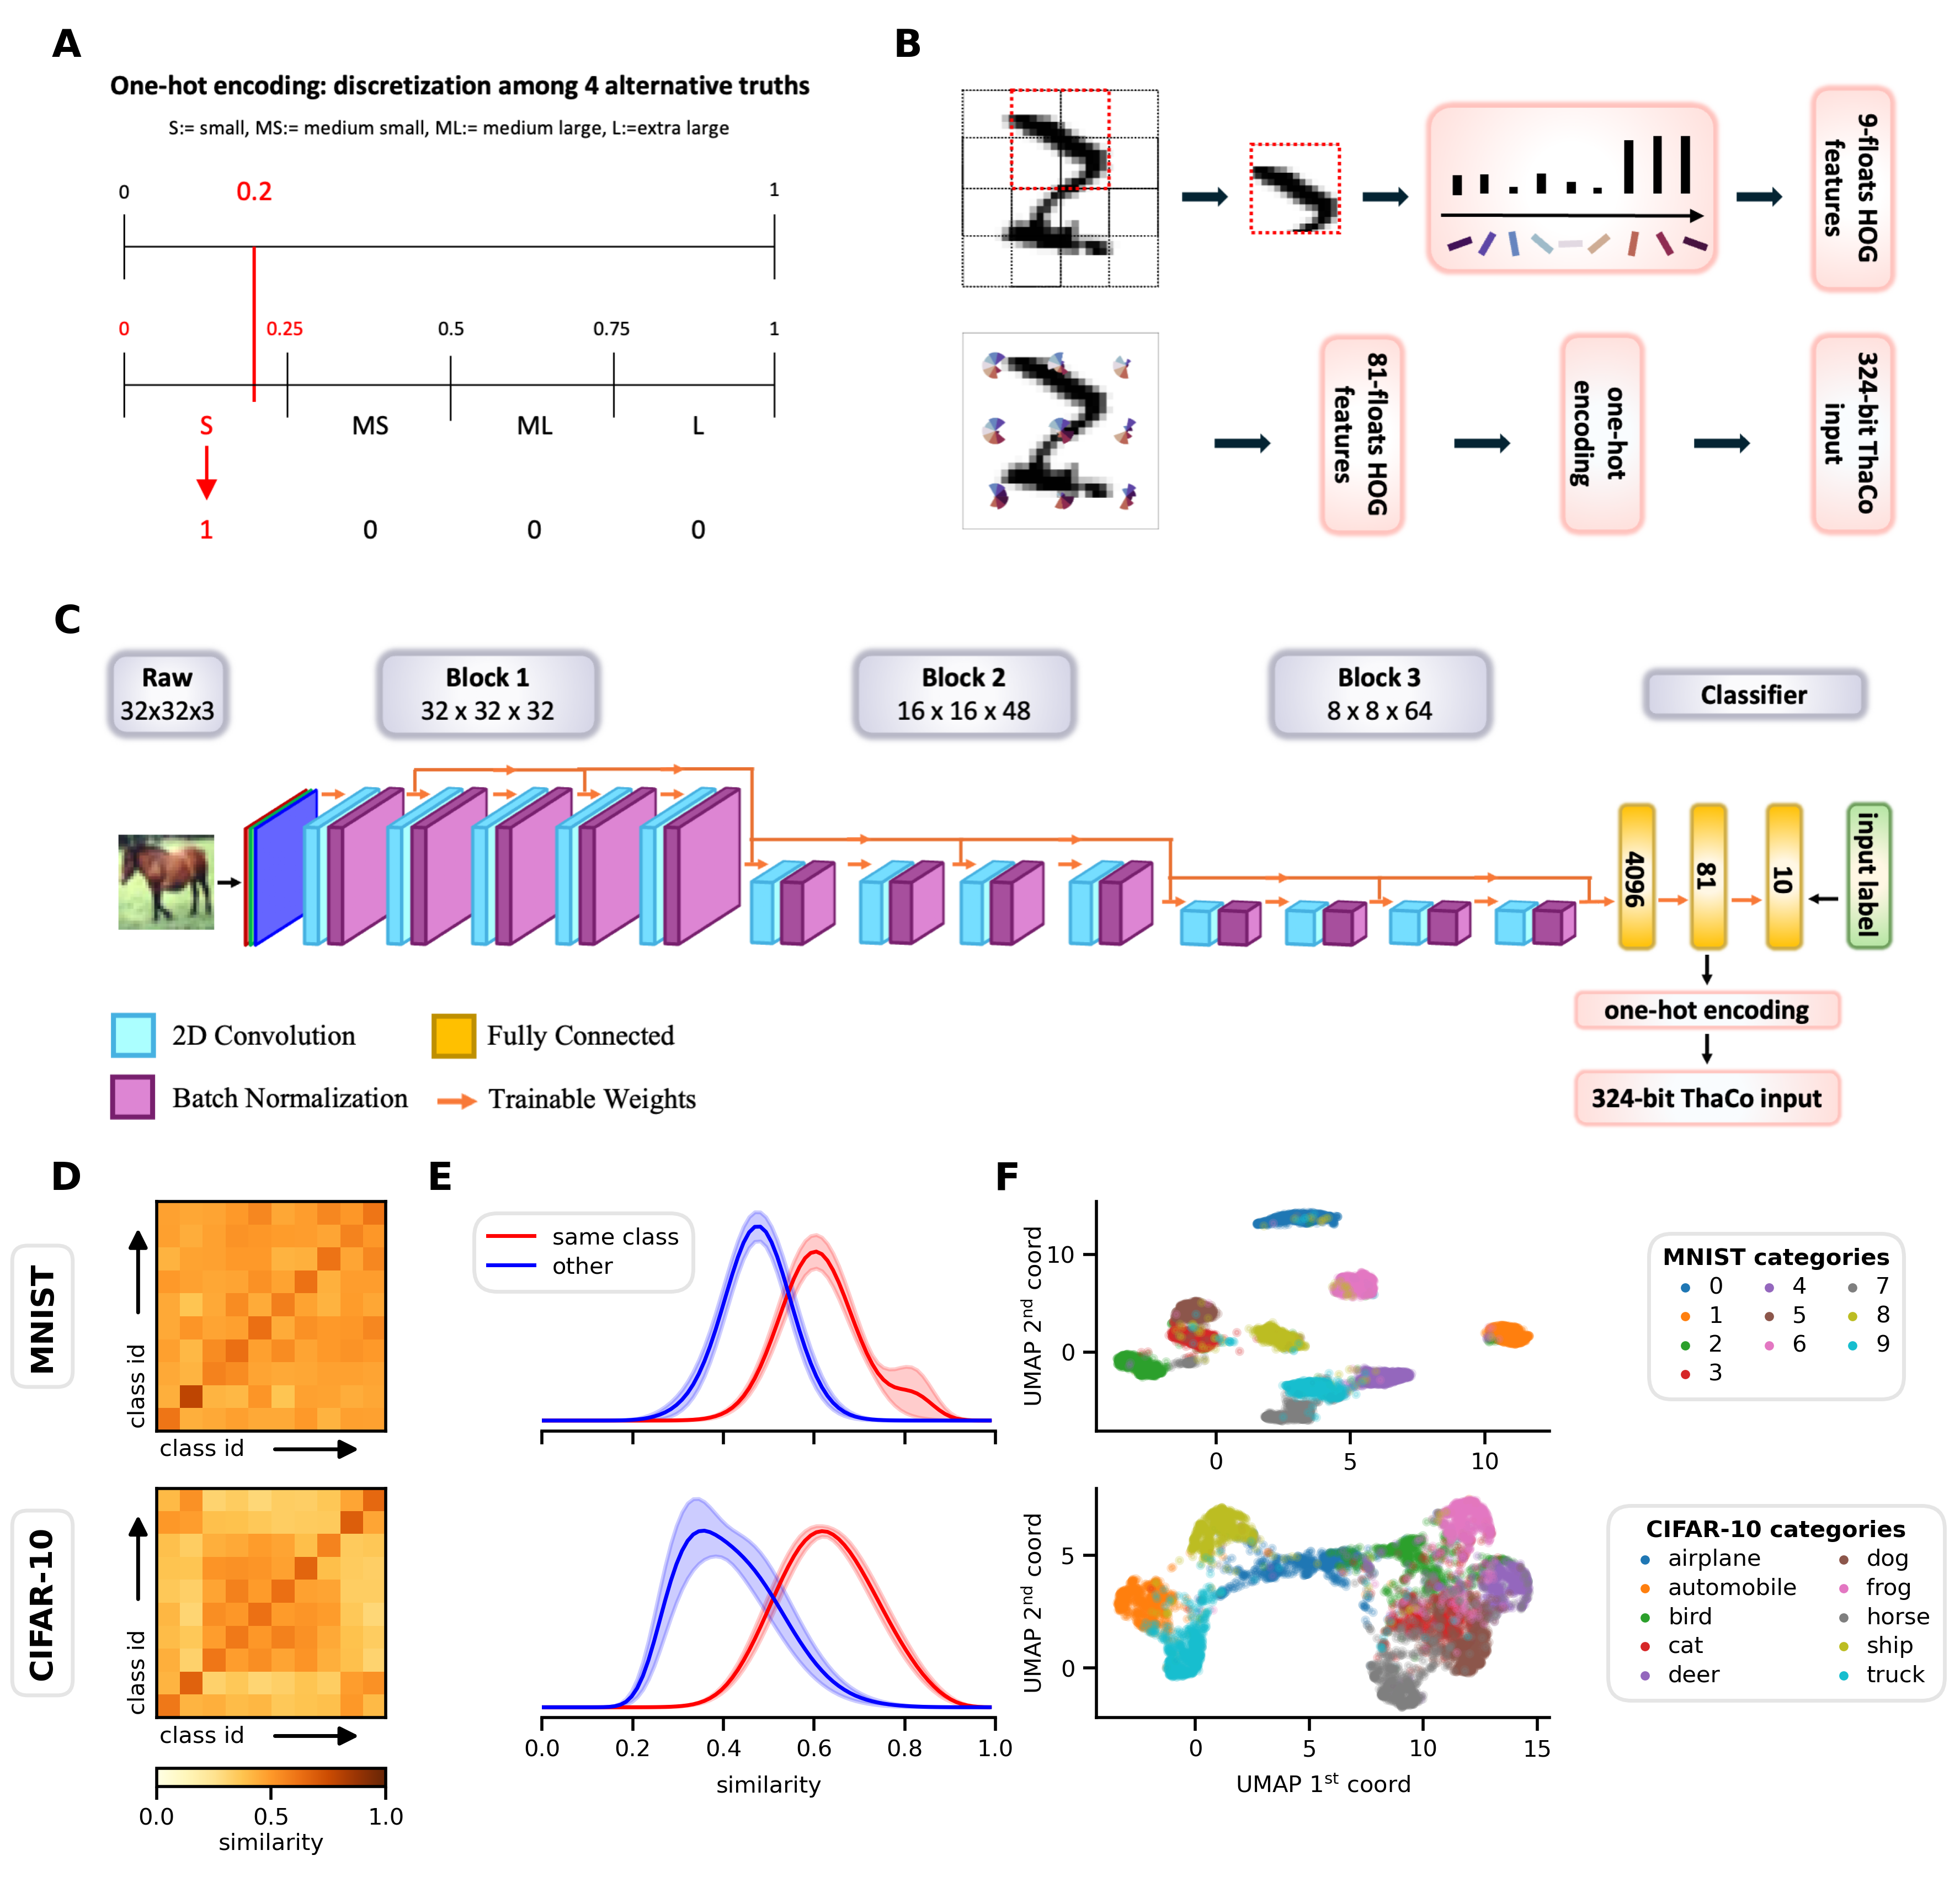

In [423]:
# Figure 5

fig_w = mm_to_inch(full_page_fig_width) 
fig_h = mm_to_inch(0.95*full_page_fig_width)
fig_path = os.path.join(save_path, 'fig5.png')

fig = plt.figure(figsize=(fig_w, fig_h), dpi=dpi)

# Main plot split into 3 rows (one-hot encoding + HOG, ResNet, categories structure)
gs = gridspec.GridSpec(nrows=3, ncols=1, figure=fig, left=0.050, right=0.970, bottom=0.080, top=0.980,
                       height_ratios=[1, 1, 1], hspace=0.12)

# Second row (categories structure) split into 4 columns (similarity matrices, similarity histograms, and UMAP plots)
subgs_2 = gs[2].subgridspec(nrows=1, ncols=4, width_ratios=[0.75, 1, 1, 0.55], wspace=0.27)

# First column (similarity matrices) split into 2 rows (MNIST, CIFAR-10)
subgs_20 = subgs_2[0].subgridspec(nrows=2, ncols=1, hspace=0.25)

# Second column (similarity histograms) split into 2 rows (MNIST, CIFAR-10)
subgs_21 = subgs_2[1].subgridspec(nrows=2, ncols=1, hspace=0.25)

# Third column (UMAP plots) split into 2 rows (MNIST, CIFAR-10)
subgs_22 = subgs_2[2].subgridspec(nrows=2, ncols=1, hspace=0.25)

# Assigning subplots to axes

# Preprocessing sketches
ax_00 = fig.add_subplot(gs[0])
ax_10 = fig.add_subplot(gs[1])

# Similarity matrices (MNIST, CIFAR-10)
ax_20 = fig.add_subplot(subgs_20[0])
ax_30 = fig.add_subplot(subgs_20[1])

# Similarity histograms (MNIST, CIFAR-10)
ax_21 = fig.add_subplot(subgs_21[0])
ax_31 = fig.add_subplot(subgs_21[1])

# UMAP plots (MNIST, CIFAR-10)
ax_22 = fig.add_subplot(subgs_22[0])
ax_32 = fig.add_subplot(subgs_22[1])

axes = [ax_00, ax_10, ax_20, ax_30, ax_21, ax_31, ax_22, ax_32]

for ax in axes:
    ax.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False,
                   labelsize=fontsize_ticks, pad=2)



# Panels A-C - Imported preprocessing sketch

for ax in [ax_00, ax_10]:
    for _ in ['top','bottom','left','right']:
        ax.spines[_].set_visible(False)

ax = ax_00
cnn = plt.imread(os.path.join(save_path, 'onehot.png'))
ax.imshow(cnn)

ax = ax_10
onehot = plt.imread(os.path.join(save_path, 'cnn.png'))
ax.imshow(onehot)



# Panel D - Similarity matrices

ax = ax_20
fig.text(ax.get_position().x0 - 0.03, 0.5*(ax.get_position().y0+ax.get_position().y1), 'MNIST',
         fontsize=fontsize_labels, fontweight='bold', ha='center', va='center', rotation=90, rotation_mode='anchor',
         bbox=dict(boxstyle='round', facecolor='None', edgecolor='black', alpha=0.1, pad=0.5))
ax = ax_30
fig.text(ax.get_position().x0 - 0.03, 0.5*(ax.get_position().y0+ax.get_position().y1), 'CIFAR-10',
         fontsize=fontsize_labels, fontweight='bold', ha='center', va='center', rotation=90, rotation_mode='anchor',
         bbox=dict(boxstyle='round', facecolor='None', edgecolor='black', alpha=0.1, pad=0.5))

norm = mcolors.Normalize(0, 1)
cmap = 'YlOrBr'

ax = ax_20
ax.imshow(similarity['MNIST_full']['matrices'], origin="lower", cmap=cmap, norm=norm)

ax = ax_30
m = ax.imshow(similarity['CIFAR_full']['matrices'], origin="lower", cmap=cmap, norm=norm)

cb_width = 1.00 * (ax_30.get_position().x1 - ax_30.get_position().x0)
cb_height = 0.08 * (ax_30.get_position().y1 - ax_30.get_position().y0)
x_anchor = ax_30.get_position().x0
y_anchor = ax_30.get_position().y0 - 0.30 * (ax_30.get_position().y1 - ax_30.get_position().y0)
ax_cb = fig.add_axes([x_anchor, y_anchor, cb_width, cb_height])
cb = plt.colorbar(m, cax=ax_cb, orientation='horizontal')
cb.ax.tick_params(labelsize=fontsize_ticks, pad=2)
cb.ax.tick_params(axis='x', which='minor', length=0)
cb.ax.text(0.50, -2.50, 'similarity', ha="center", va="top", transform=ax_cb.transAxes, fontsize=fontsize_ticks)

for ax in [ax_20, ax_30]:
    offset = -0.08
    ax.set_xlim([-0.5,9.5])
    ax.set_ylim([-0.5,9.5])
    x_0 = offset
    y_0 = 0.45
    x_1 = offset
    y_1 = 0.95
    ax.annotate('', xycoords='axes fraction', xytext=(x_0, y_0), xy=(x_1, y_1), annotation_clip=False, zorder=5,
                arrowprops=dict(arrowstyle='-|>', facecolor='black', shrinkA=4, shrinkB=4))
    ax.text(x_0, 0.20, "class id", rotation=90, rotation_mode='anchor', ha='center', va='center', transform=ax.transAxes, fontsize=fontsize_ticks)
    x_0 = 0.45
    y_0 = offset
    x_1 = 0.95
    y_1 = offset
    ax.annotate('', xycoords='axes fraction', xytext=(x_0, y_0), xy=(x_1, y_1), annotation_clip=False, zorder=5,
                arrowprops=dict(arrowstyle='-|>', facecolor='black', shrinkA=4, shrinkB=4))
    ax.text(0.20, y_0, "class id", rotation=0, rotation_mode='anchor', ha='center', va='center', transform=ax.transAxes, fontsize=fontsize_ticks)



# Panel E - Similarity histograms

for ax in [ax_21, ax_31]:
    ax.set_xlim(0,1)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax = ax_21
conf = 'MNIST_full'
ax.tick_params(axis='x', which='both', bottom=True, labelbottom=False)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
colors = ['red','blue']
for i, label in enumerate(['intra', 'inter']):
    x = similarity[conf][f'histograms_{label}class']['bins']
    y = similarity[conf][f'histograms_{label}class']['density_mean']
    s = similarity[conf][f'histograms_{label}class']['density_sem']
    ax.plot(x, y, linewidth=1, color=colors[i], label=label)
    ax.fill_between(x, y-s, y+s, color=colors[i], alpha=0.2, label=None)

hh, ll = ax.get_legend_handles_labels()
ll = ['same class', 'other']
leg = ax.legend(
    handles=hh,
    labels=ll,
    #title="",
    facecolor="None",
    edgecolor="black",
    #edgecolor="None",
    framealpha=0.1,
    fontsize=fontsize_ticks,
    loc="upper left",
    bbox_to_anchor=(-0.15, 0.95),
    borderpad=0.1,
    labelspacing=0.3,
    handlelength=2.0,
    ncols=1,
    columnspacing=2,  # default value: 2
    #title_fontproperties = {'weight':'bold', 'size': fontsize_labels}
)
leg.get_frame().set_boxstyle('Round', pad=0.5, rounding_size=1)



ax = ax_31
conf = 'CIFAR_full'
ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
colors = ['red','blue']
for i, label in enumerate(['intra', 'inter']):
    x = similarity[conf][f'histograms_{label}class']['bins']
    y = similarity[conf][f'histograms_{label}class']['density_mean']
    s = similarity[conf][f'histograms_{label}class']['density_sem']
    ax.plot(x, y, linewidth=1, color=colors[i])
    ax.fill_between(x, y-s, y+s, color=colors[i], alpha=0.2)

ax.text(0.50, -0.25, "similarity", ha='center', va='top', transform=ax.transAxes, fontsize=fontsize_ticks)



# Panel F - UMAP plots

for ax in [ax_22, ax_32]:
    #ax.set_xlim(0,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
ax = ax_22
ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
ax.tick_params(axis='y', which='both', left=True, labelleft=True)
#ax.xaxis.set_major_locator(MultipleLocator(0.2))
conf = 'MNIST_full'
X_umap = similarity[conf]['umap_scatters']['X_umap']
classes = similarity[conf]['umap_scatters']['classes']
y_plot = similarity[conf]['umap_scatters']['y_plot']
cmap = plt.get_cmap("tab10")
for i, c in enumerate(classes):
    mask = (y_plot == c)
    ax.scatter(X_umap[mask, 0], X_umap[mask, 1], s=2, alpha=0.2, color=cmap(i % 10), label=str(i))
ax.text(-0.11, 0.50, r'UMAP $\mathregular{2^{nd}}$ coord', ha='center', va='bottom', rotation=90, rotation_mode='anchor', transform=ax.transAxes, fontsize=fontsize_ticks)

hh, ll = ax.get_legend_handles_labels()
leg = ax.legend(
    handles=hh,
    labels=ll,
    title="MNIST categories",
    facecolor="None",
    edgecolor="black",
    framealpha=0.1,
    fontsize=fontsize_ticks,
    loc="center",
    bbox_to_anchor=(1.50, 0.50),
    borderpad=0.1,
    labelspacing=0.3,
    handlelength=2.0,
    ncols=3,
    handletextpad=0,  # default value: 0.8
    columnspacing=1.0,  # default value: 2
    title_fontproperties = {'weight':'bold', 'size': fontsize_ticks}
)
leg.get_frame().set_boxstyle('Round', pad=0.5, rounding_size=1)
for lh in leg.legendHandles:
    lh.set_facecolor(lh.get_facecolor())
    lh.set_edgecolor(lh.get_edgecolor())
    lh.set_alpha(1.0)

ax = ax_32
ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
ax.tick_params(axis='y', which='both', left=True, labelleft=True)
#ax.xaxis.set_major_locator(MultipleLocator(0.2))
conf = 'CIFAR_full'
X_umap = similarity[conf]['umap_scatters']['X_umap']
classes = similarity[conf]['umap_scatters']['classes']
y_plot = similarity[conf]['umap_scatters']['y_plot']
cmap = plt.get_cmap("tab10")
for i, c in enumerate(classes):
    mask = (y_plot == c)
    ax.scatter(X_umap[mask, 0], X_umap[mask, 1], s=2, alpha=0.2, color=cmap(i % 10), label=cifar_labels[i])
ax.text(0.50, -0.25, r'UMAP $\mathregular{1^{st}}$ coord', ha='center', va='top', transform=ax.transAxes, fontsize=fontsize_ticks)
ax.text(-0.11, 0.50, r'UMAP $\mathregular{2^{nd}}$ coord', ha='center', va='bottom', rotation=90, rotation_mode='anchor', transform=ax.transAxes, fontsize=fontsize_ticks)

hh, ll = ax.get_legend_handles_labels()
leg = ax.legend(
    handles=hh,
    labels=ll,
    title="CIFAR-10 categories",
    facecolor="None",
    edgecolor="black",
    framealpha=0.1,
    fontsize=fontsize_ticks,
    loc="center",
    bbox_to_anchor=(1.50, 0.50),
    borderpad=0.1,
    labelspacing=0.3,
    handlelength=2.0,
    ncols=2,
    handletextpad=0,  # default value: 0.8
    columnspacing=1.0,  # default value: 2
    title_fontproperties = {'weight':'bold', 'size': fontsize_ticks}
)
leg.get_frame().set_boxstyle('Round', pad=0.5, rounding_size=1)
for lh in leg.legendHandles:
    lh.set_facecolor(lh.get_facecolor())
    lh.set_edgecolor(lh.get_edgecolor())
    lh.set_alpha(1.0)


# Panel letters
fig.text(0.040, 0.970, 'A',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(0.470, 0.970, 'B',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(0.040, 0.660, 'C',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(0.040, 0.360, 'D',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(0.230, 0.360, 'E',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')
fig.text(0.520, 0.360, 'F',
         fontsize=fontsize_panel_letters, fontweight='bold', ha='right', va='bottom')


# fig.tight_layout() # pad=0.05, w_pad=0.5, h_pad=2.0
# fig.subplots_adjust(top=0.95, bottom=0.08, left=0.07, right=0.98)
fig.savefig(fig_path, facecolor='white', dpi=dpi) # bbox_inches='tight', pad_inches=0
plt.show()

### Numerical values for main text and tables

In [260]:
# Table 1: firing rates during sleep - 'MNIST_full'

conf = 'MNIST_full'
aver = 'mean'
error = 'sem'

for layer in ['cx', 'th']:
    print(f'* Firing rate ({layer})')
    
    # Classification pre-sleep
    data = spikes_count_dict[conf]['data'][layer]['00_awake_training']['classification']
    data = [np.mean(_) for _ in data]
    print('Test pre-sleep: %.2f pm %.2f' % (np.mean(data), np.std(data)/np.sqrt(len(data)-1)))
    
    # early NREM
    data = spikes_count_dict[conf]['data'][layer]['01_nrem']['sleep']
    data = [np.mean(_) for _ in data]
    print('Early NREM (0-100s): %.2f pm %.2f' % (np.mean(data), np.std(data)/np.sqrt(len(data)-1)))

    # mid NREM
    data = spikes_count_dict[conf]['data'][layer]['04_nrem']['sleep']
    data = [np.mean(_) for _ in data]
    print('Mid NREM (300-400s): %.2f pm %.2f' % (np.mean(data), np.std(data)/np.sqrt(len(data)-1)))

    # late NREM
    data = spikes_count_dict[conf]['data'][layer]['20_nrem']['sleep']
    data = [np.mean(_) for _ in data]
    print('Late NREM (1900-2000s): %.3f pm %.3f' % (np.mean(data), np.std(data)/np.sqrt(len(data)-1)))

    # Classification post-sleep
    data = spikes_count_dict[conf]['data'][layer]['20_nrem']['classification']
    data = [np.mean(_) for _ in data]
    print('Test post-sleep: %.2f pm %.2f' % (np.mean(data), np.std(data)/np.sqrt(len(data)-1)))
    
    print()

print(f'* SO rate')

oscillations_freq = np.load(os.path.join(load_paths[conf], 'cx_groups_oscillations.npy'), allow_pickle=True).item()

# data_downstates_interval = np.array([[1 / arr for arr in oscillations_freq['data'][stage]['sleep']] for stage in stages_id[1:]], dtype=object)
# osc_freq_trials = np.array([[np.mean(data_trial) for data_trial in data_stage] for data_stage in data_downstates_interval])
# mu_osc_freq, std_osc_freq = (np.array([np.mean(data_stage) for data_stage in osc_freq_trials]),
#                              np.array([np.std(data_stage)/np.sqrt(100) for data_stage in osc_freq_trials])
#                             )
# mu_osc_freq, std_osc_freq

data_downstates_interval = np.array([[1 / arr for arr in oscillations_freq['data'][stage]['sleep']] for stage in stages_id[1:]], dtype=object)
osc_freq_trials = np.array([[np.mean(data_trial) for data_trial in data_stage] for data_stage in data_downstates_interval])

# early NREM
data = [1 / arr for arr in oscillations_freq['data']['01_nrem']['sleep']]
data = np.array([np.mean(_) for _ in data])
print('Early NREM (0-100s): %.2f pm %.2f' % (np.mean(data), np.std(data)/np.sqrt(len(data)-1)))


# mid NREM
data = [1 / arr for arr in oscillations_freq['data']['04_nrem']['sleep']]
data = np.array([np.mean(_) for _ in data])
print('Mid NREM (300-400s): %.2f pm %.2f' % (np.mean(data), np.std(data)/np.sqrt(len(data)-1)))

# late NREM
data = [1 / arr for arr in oscillations_freq['data']['20_nrem']['sleep']]
data = np.array([np.mean(_) for _ in data])
print('Late NREM (1900-2000s): %.2f pm %.2f' % (np.mean(data), np.std(data)/np.sqrt(len(data)-1)))

* Firing rate (cx)
Test pre-sleep: 6.86 pm 0.06
Early NREM (0-100s): 5.07 pm 0.06
Mid NREM (300-400s): 1.24 pm 0.01
Late NREM (1900-2000s): 0.191 pm 0.003
Test post-sleep: 5.34 pm 0.04

* Firing rate (th)
Test pre-sleep: 48.58 pm 0.07
Early NREM (0-100s): 18.70 pm 0.17
Mid NREM (300-400s): 4.87 pm 0.03
Late NREM (1900-2000s): 0.750 pm 0.013
Test post-sleep: 45.96 pm 0.05

* SO rate
Early NREM (0-100s): 4.45 pm 0.05
Mid NREM (300-400s): 2.36 pm 0.04
Late NREM (1900-2000s): 0.93 pm 0.04


In [243]:
# Table 2: accuracy during sleep

aver = 'mean'
error = 'sem'

for conf in ['MNIST_full', 'MNIST_cxcx', 'CIFAR_full', 'CIFAR_cxcx']:
    print(f'* Conf: {conf}')
    y = trials_data[conf]['accuracy_'+aver]['cx']
    s = trials_data[conf]['accuracy_'+error]['cx']
    for n in [0, 1, 4, 20]:
        print('n=%d: %.1f pm %.1f' % (n, y[n], s[n]))
    print()

* Conf: MNIST_full
n=0: 59.7 pm 0.5
n=1: 64.4 pm 0.5
n=4: 67.9 pm 0.4
n=20: 69.6 pm 0.4

* Conf: MNIST_cxcx
n=0: 59.7 pm 0.5
n=1: 62.0 pm 0.5
n=4: 64.5 pm 0.5
n=20: 66.2 pm 0.4

* Conf: CIFAR_full
n=0: 60.4 pm 0.4
n=1: 63.4 pm 0.4
n=4: 65.0 pm 0.4
n=20: 65.9 pm 0.4

* Conf: CIFAR_cxcx
n=0: 60.4 pm 0.4
n=1: 62.2 pm 0.4
n=4: 63.9 pm 0.4
n=20: 64.6 pm 0.4



In [431]:
# Table 3: b coefficients for power estimator

# p comes from biology, per neuron, estimated at fr = 4 Hz
p = 1.896e-10
ref_fr = 4

b = np.zeros(4)
for conf in ['MNIST_full', 'MNIST_cxcx']:
    z0_cx = trials_data[conf]['incoming_synapses_from_cx']['cx'][:,0] * 1e-9 # nS -> S
    z0_th = trials_data[conf]['incoming_synapses_from_th']['cx'][:,0] * 1e-9 # nS -> S
    fr_cx = trials_data[conf]['firing_rate']['cx'][:,0]
    fr_th = trials_data[conf]['firing_rate']['th'][:,0]
    sa_cx = trials_data[conf]['synaptic_activity_from_cx']['cx'][:,0] * 1e-9 # nS -> S
    sa_th = trials_data[conf]['synaptic_activity_from_th']['cx'][:,0] * 1e-9 # nS -> S
    b[0] += 0.04*p
    b[1] += 0.36*p / np.mean(z0_cx+z0_th)
    b[2] += 0.16*p / ref_fr
    b[3] += 0.44*p / (np.mean(z0_cx+z0_th)*ref_fr)
b /= 2

print('* ATP-W:')
for n in range(len(b)):
    print('b_%d: %.2e' % (n, b[n]))
print()

print('* ATP:')
f = 9.78e-20
for n in range(len(b)):
    print('b_%d: %.2e' % (n, b[n]/f))
print()

* ATP-W:
b_0: 7.58e-12
b_1: 3.33e-05
b_2: 7.58e-12
b_3: 1.02e-05

* ATP:
b_0: 7.75e+07
b_1: 3.40e+14
b_2: 7.75e+07
b_3: 1.04e+14

